# PROJECT (Rose) - TIME SERIES FORECASTING - MRK

### Problem Statement

For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

## Q1. Read the data as an appropriate Time Series data and plot the data.

In [261]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [262]:
from termcolor import colored

In [263]:
df=pd.read_csv('Rose.csv')
df.head(10)

YearMonth   Rose
0   1980-01  112.0
1   1980-02  118.0
2   1980-03  129.0
3   1980-04   99.0
4   1980-05  116.0
5   1980-06  168.0
6   1980-07  118.0
7   1980-08  129.0
8   1980-09  205.0
9   1980-10  147.0

In [264]:
df.tail()

YearMonth  Rose
182   1995-03  45.0
183   1995-04  52.0
184   1995-05  28.0
185   1995-06  40.0
186   1995-07  62.0

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YearMonth  187 non-null    object 
 1   Rose       185 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.0+ KB


In [266]:
df.shape

(187, 2)

In [267]:
pd.DataFrame(df.dtypes,columns=['Data Type'])

Data Type
YearMonth    object
Rose        float64

In [268]:
df=pd.read_csv('Rose.csv',parse_dates=['YearMonth'])
df.head()

YearMonth   Rose
0 1980-01-01  112.0
1 1980-02-01  118.0
2 1980-03-01  129.0
3 1980-04-01   99.0
4 1980-05-01  116.0

In [269]:
pd.DataFrame(df.dtypes,columns=['Data Type'])

Data Type
YearMonth  datetime64[ns]
Rose              float64

In [270]:
df.set_index('YearMonth',inplace=True)

In [271]:
df.head(10)

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0
1980-06-01  168.0
1980-07-01  118.0
1980-08-01  129.0
1980-09-01  205.0
1980-10-01  147.0

### Checking for Null Values

In [272]:
df.isnull().sum()

Rose    2
dtype: int64

In [273]:
df[df.isnull().any(axis=1)]

Rose
YearMonth       
1994-07-01   NaN
1994-08-01   NaN

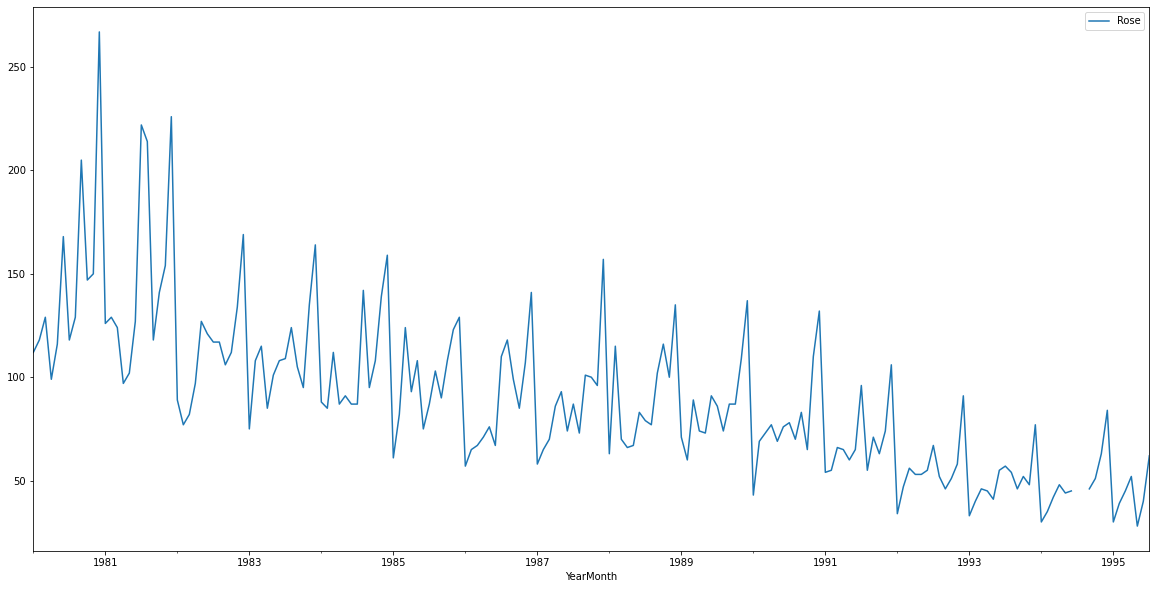

In [274]:
df.plot(figsize=(20,10));

In [275]:
df.loc['1994-07-01']=df[df.index.month==7].loc['1992':'1993'].mean()

In [276]:
df.loc['1994-08-01']=df[df.index.month==8].loc['1992':'1993'].mean()

In [277]:
df.loc['1994-06-01':'1994-09-01']

Rose
YearMonth       
1994-06-01  45.0
1994-07-01  62.0
1994-08-01  53.0
1994-09-01  46.0

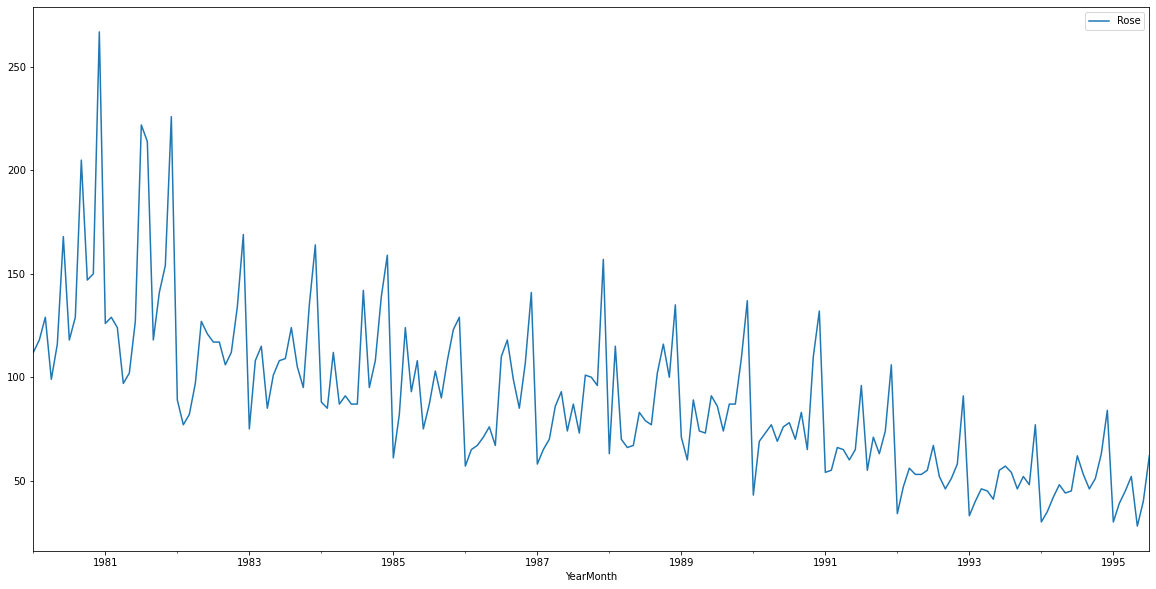

In [278]:
df.plot(figsize=(20,10));

### Check the basic measures of descriptive statistics of the Time Series

In [279]:
df.describe().T

count       mean        std   min   25%   50%    75%    max
Rose  187.0  90.042781  39.114366  28.0  62.5  85.0  111.0  267.0

## Plot the Time Series to understand the behaviour of the data.

In [280]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,10

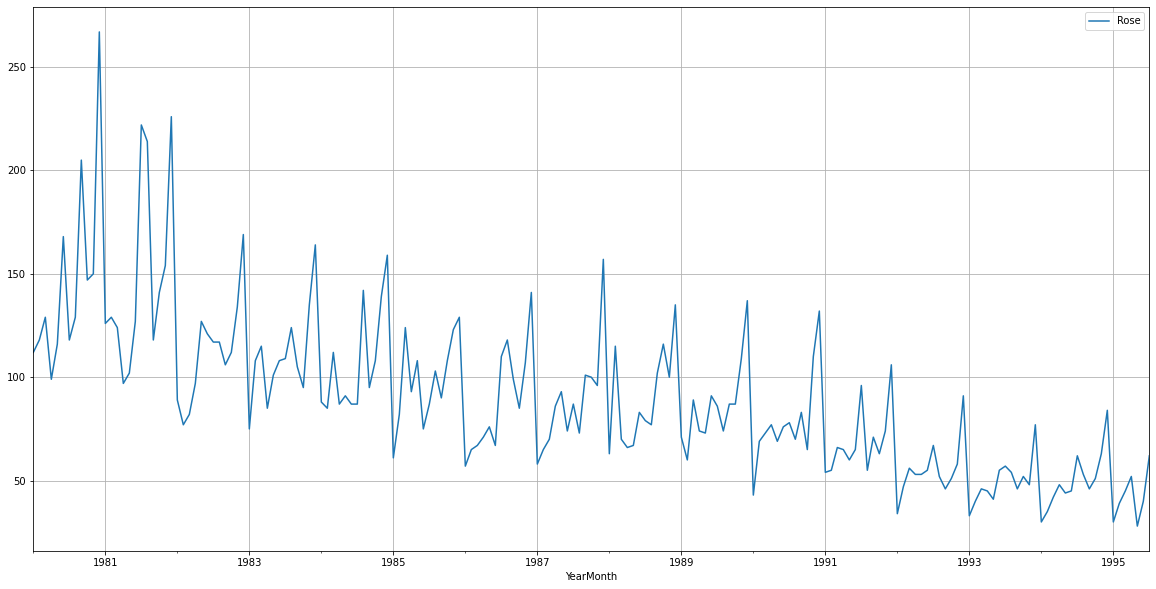

In [281]:
df.plot()
plt.grid()

## Q2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

## Exploratory Data Analysis

### Box Plot of Yearly Wine Sales

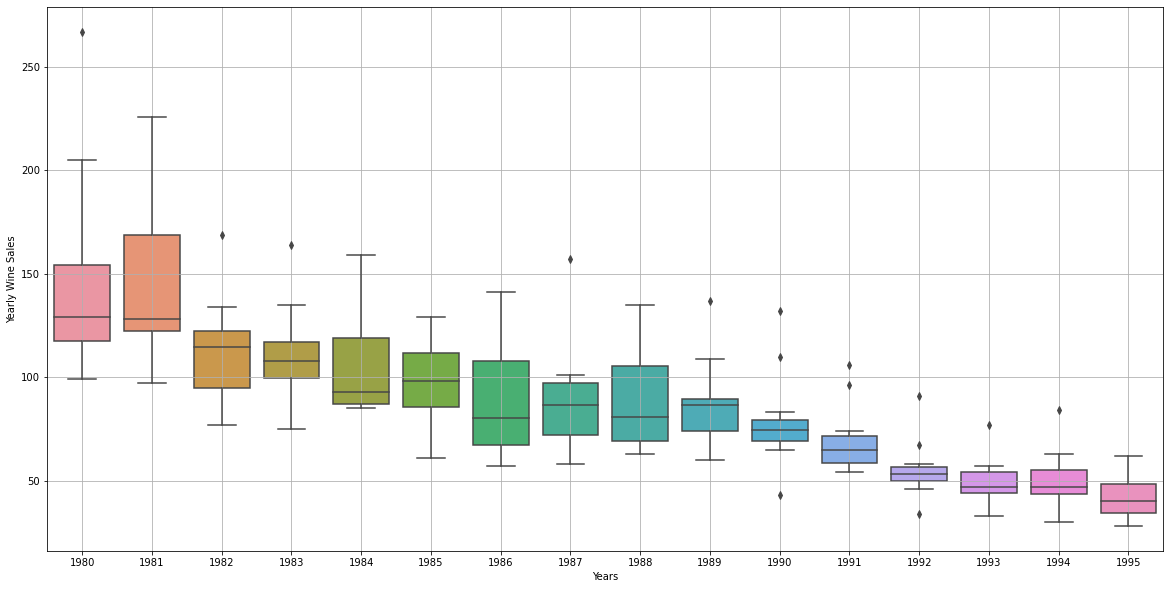

In [282]:
sns.boxplot(df.index.year, df.Rose);
plt.grid();
plt.xlabel('Years');
plt.ylabel('Yearly Wine Sales');

As we got to know from the Time Series plot, the boxplots over here also indicates a measure of trend being present. Also, we see that the sales of wine has some outliers for certain years.

### Yearly Mean Wine Sales

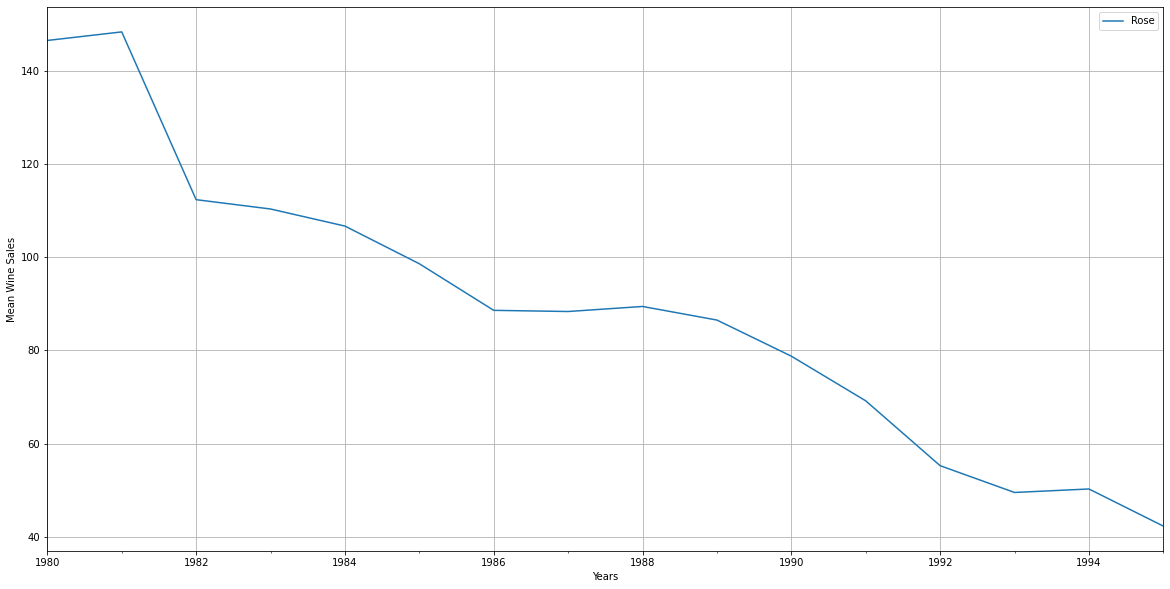

In [283]:
df.resample('A').mean().plot();
plt.grid();
plt.xlabel('Years');
plt.ylabel('Mean Wine Sales');

### Yearly Total Wine Sales

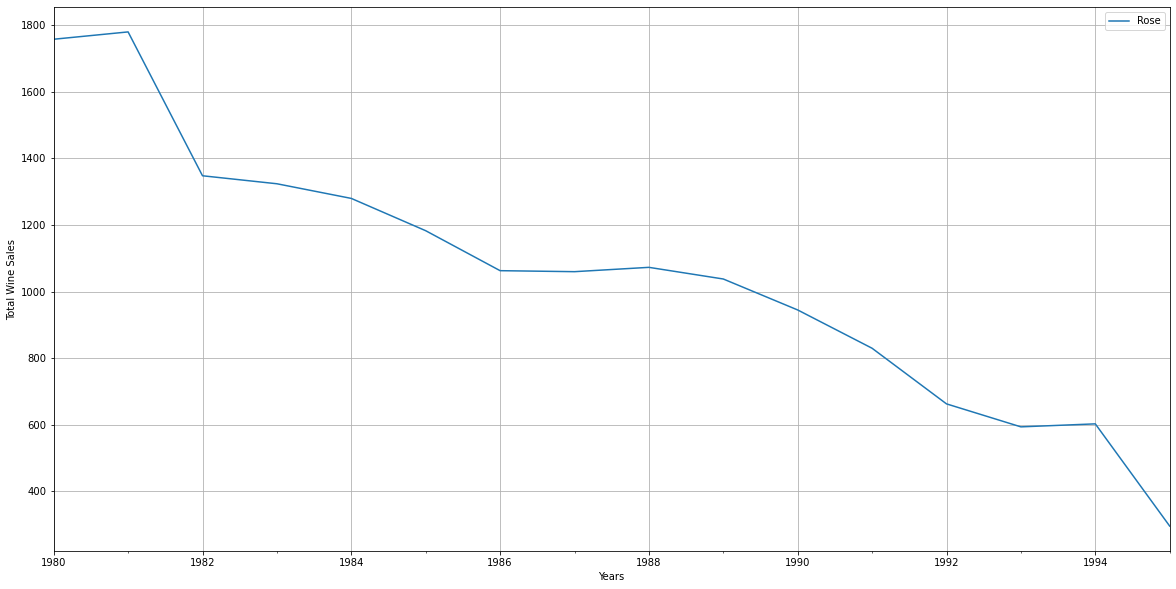

In [284]:
df.resample('A').sum().plot();
plt.grid();
plt.xlabel('Years');
plt.ylabel('Total Wine Sales');

In [285]:
pd.DataFrame({'Mean Sales':df.groupby(df.index.year).mean().Rose,'Total Sales': df.groupby(df.index.year).sum().Rose},
             index=df.groupby(df.index.year).mean().index).rename_axis('Year').round(1)

Mean Sales  Total Sales
Year                         
1980       146.5       1758.0
1981       148.3       1780.0
1982       112.3       1348.0
1983       110.3       1324.0
1984       106.7       1280.0
1985        98.6       1183.0
1986        88.6       1063.0
1987        88.3       1060.0
1988        89.4       1073.0
1989        86.5       1038.0
1990        78.8        945.0
1991        69.2        830.0
1992        55.2        663.0
1993        49.5        594.0
1994        50.2        603.0
1995        42.3        296.0

### Quarterly Sales Analysis

In [286]:
dfQ=df.resample('Q').sum()
dfQ.head()

Rose
YearMonth        
1980-03-31  359.0
1980-06-30  383.0
1980-09-30  452.0
1980-12-31  564.0
1981-03-31  379.0

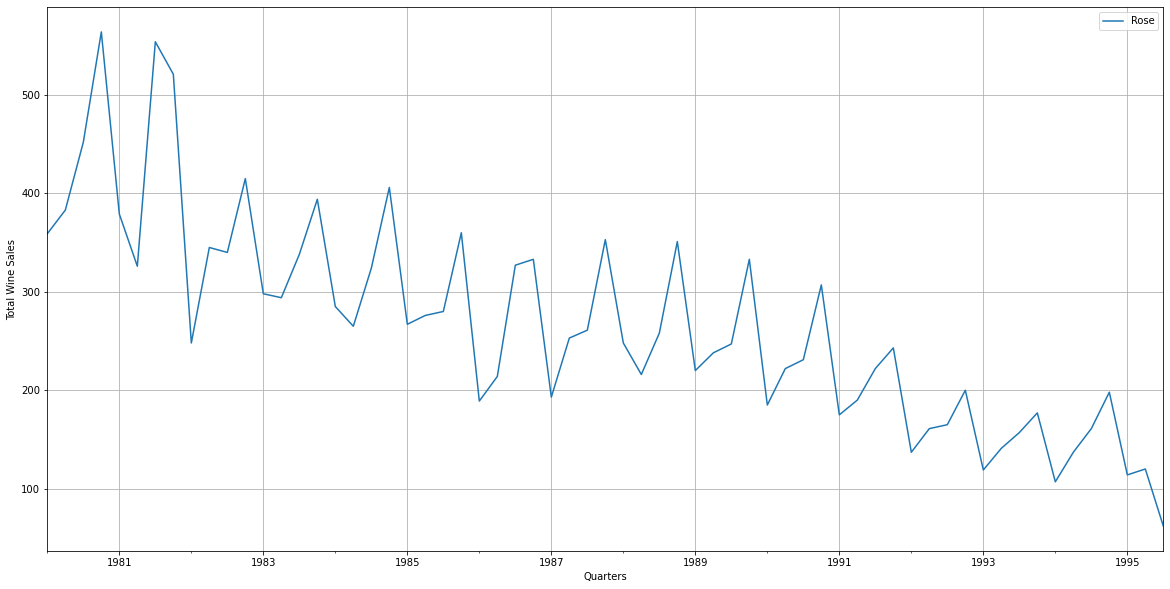

In [287]:
df.resample('Q').sum().plot();
plt.grid();
plt.xlabel('Quarters');
plt.ylabel('Total Wine Sales');

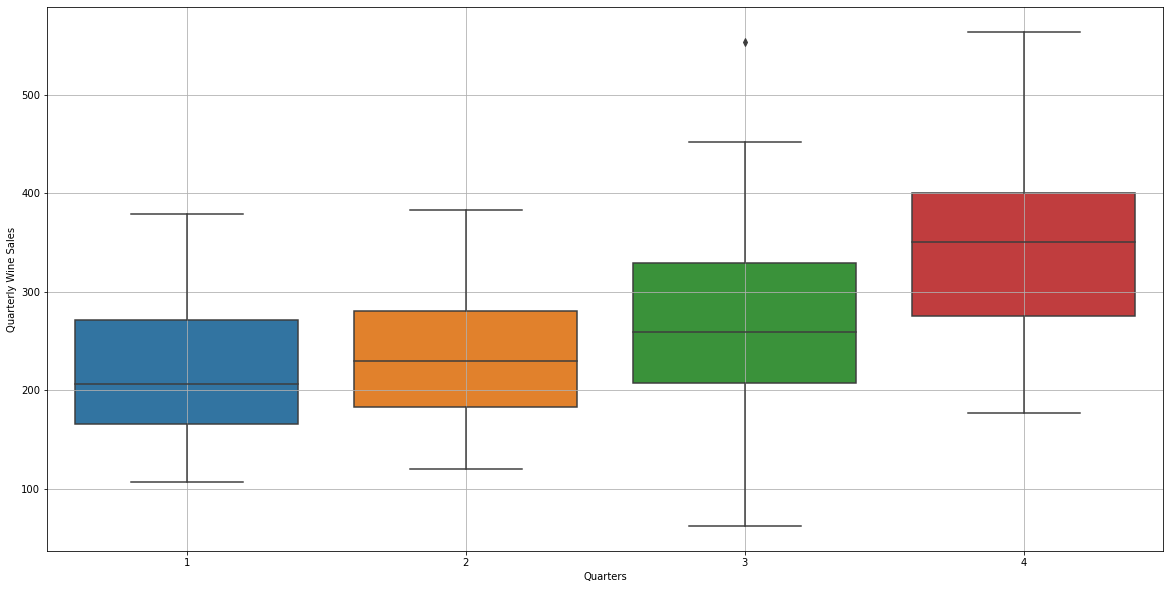

In [288]:
sns.boxplot(dfQ.index.quarter,dfQ.Rose);
plt.grid()
plt.xlabel('Quarters');
plt.ylabel('Quarterly Wine Sales');

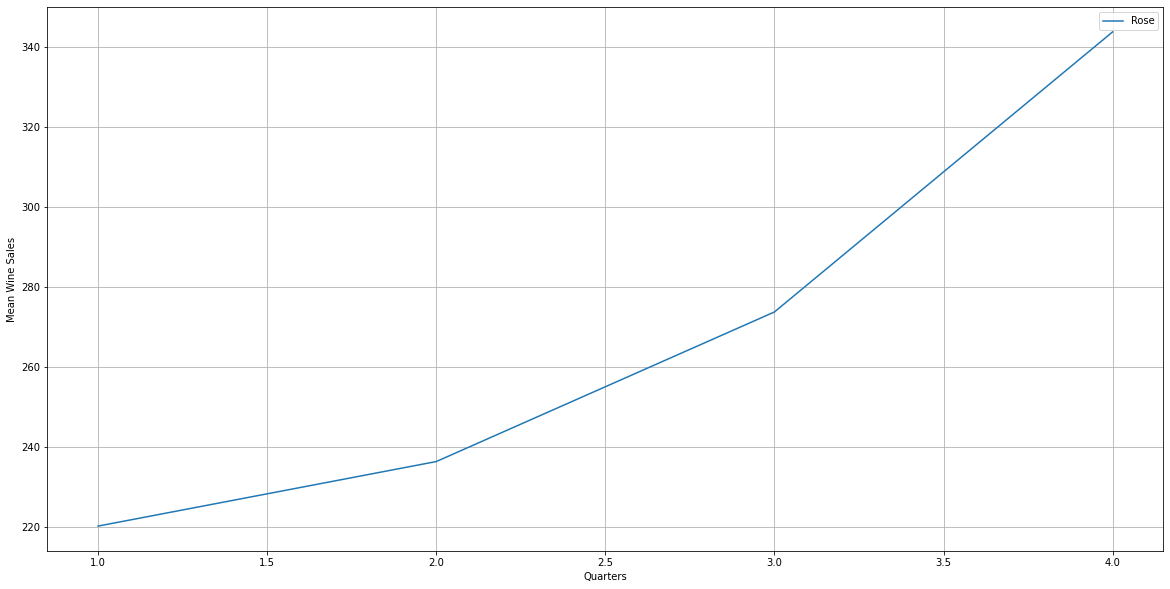

In [289]:
dfQ.groupby(dfQ.index.quarter).mean().plot();
plt.grid();
plt.xlabel('Quarters');
plt.ylabel('Mean Wine Sales');

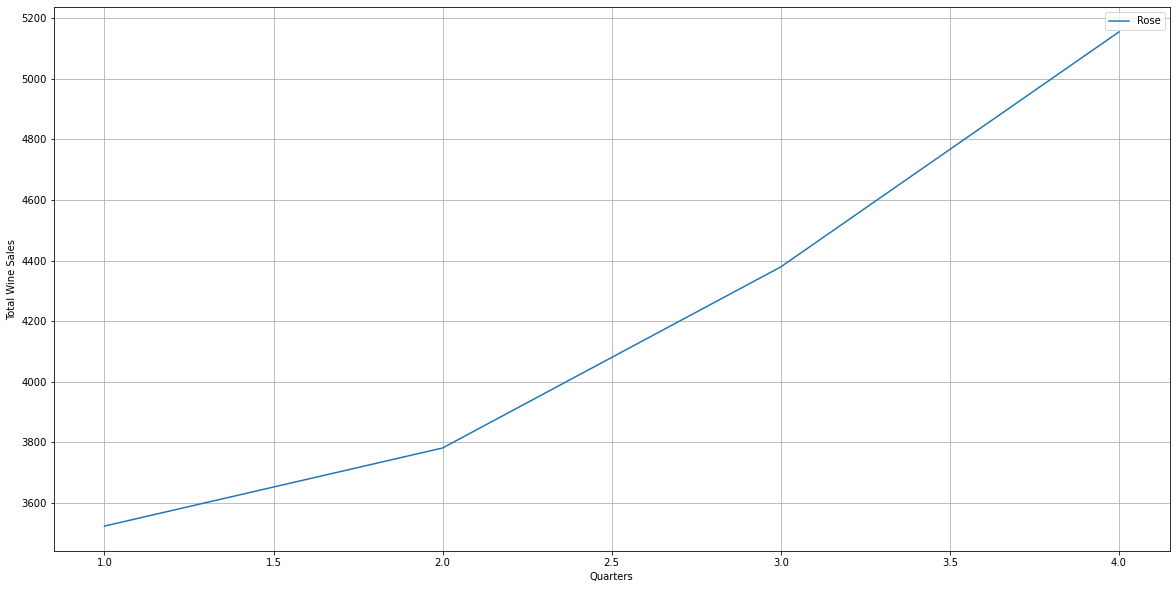

In [290]:
dfQ.groupby(dfQ.index.quarter).sum().plot();
plt.grid();
plt.xlabel('Quarters');
plt.ylabel('Total Wine Sales');

In [291]:
pd.DataFrame({'Mean Sales':dfQ.groupby(dfQ.index.quarter).mean().Rose,
              'Total Sales': dfQ.groupby(dfQ.index.quarter).sum().Rose},
             index=dfQ.groupby(dfQ.index.quarter).mean().index).rename_axis('Quarter').round(1)

Mean Sales  Total Sales
Quarter                         
1             220.2       3523.0
2             236.3       3781.0
3             273.7       4379.0
4             343.7       5155.0

### Box Plot of Monthly Wine Sales

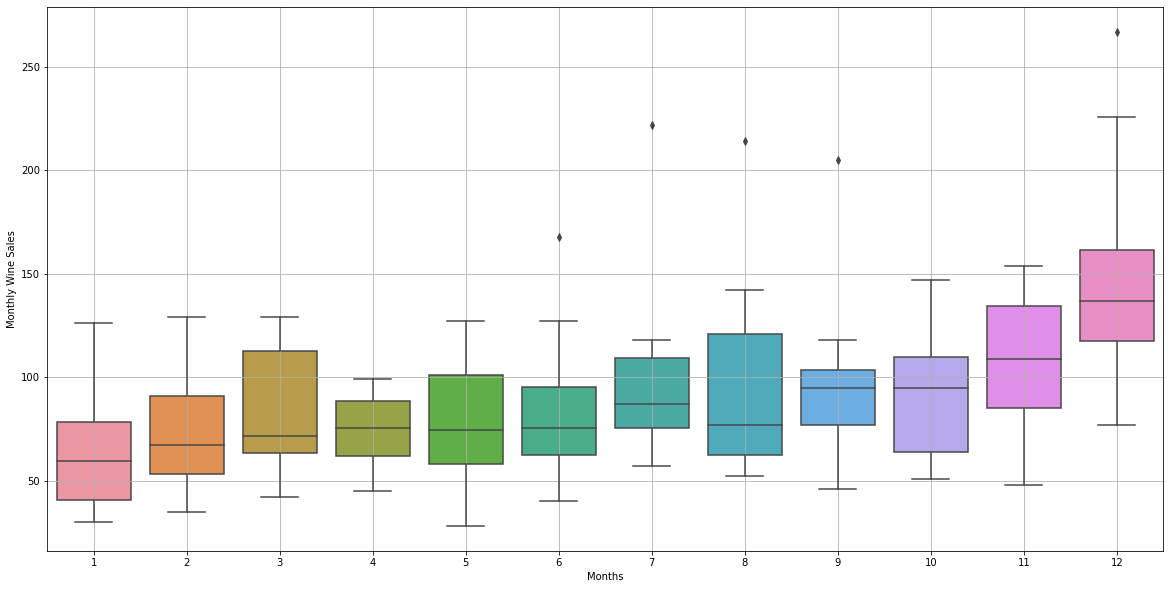

In [292]:
sns.boxplot(df.index.month, df.Rose);
plt.grid();
plt.xlabel('Months');
plt.ylabel('Monthly Wine Sales');

we see that the sales of wine has some outliers for certain months.

### Monthly Mean Wine Sales

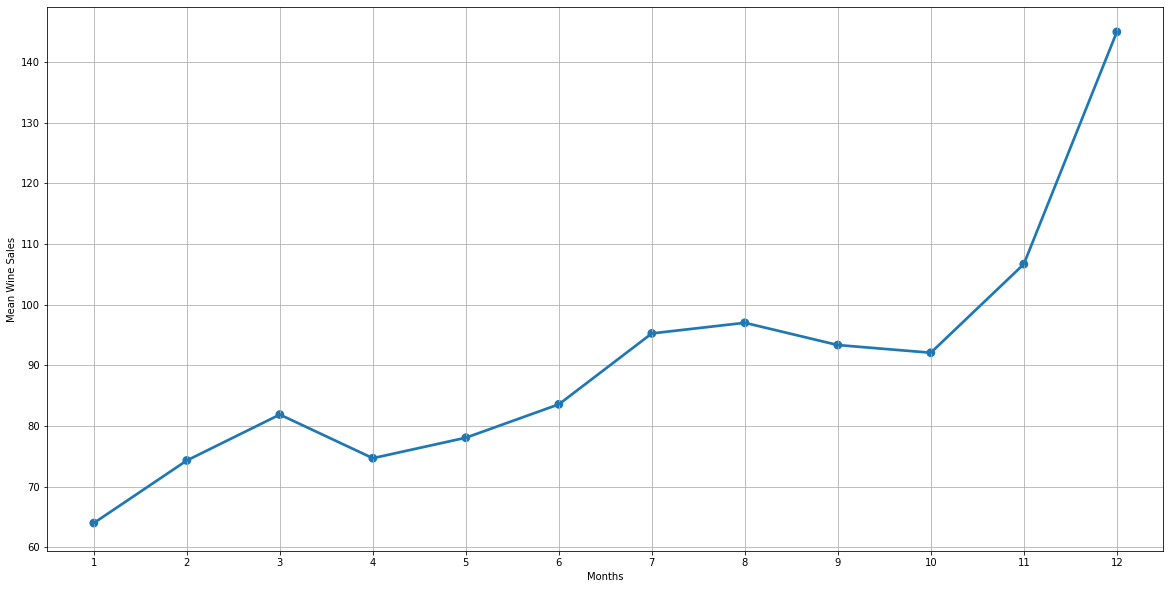

In [293]:
sns.pointplot(df.index.month,df.Rose,ci=False,estimator=np.mean);
plt.grid();
plt.xlabel('Months');
plt.ylabel('Mean Wine Sales');

### Monthly Total Wine Sales

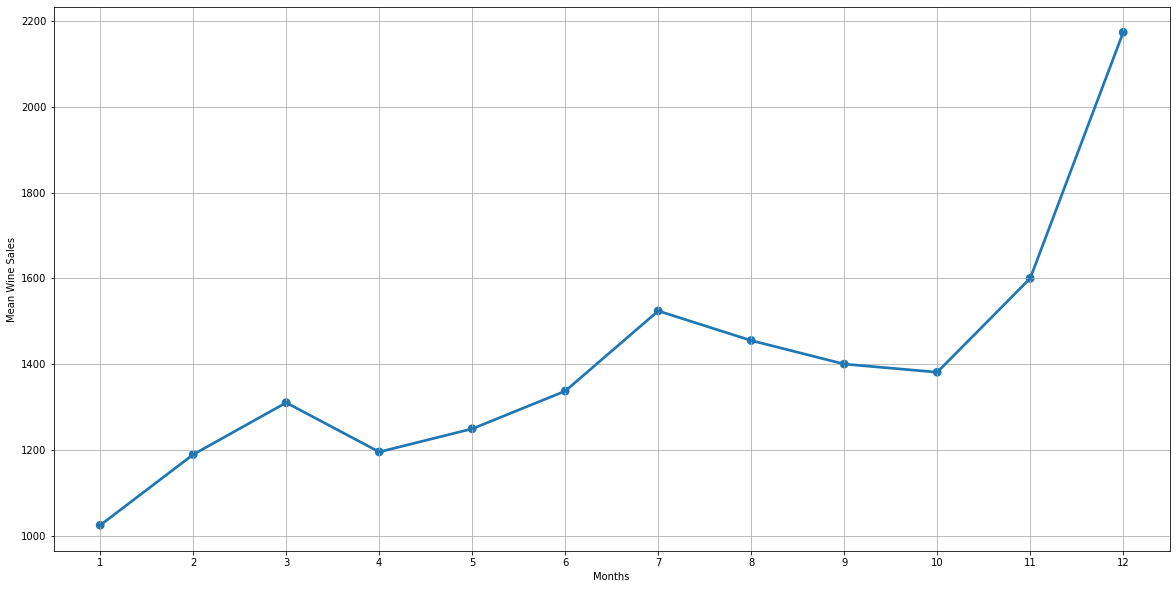

In [294]:
sns.pointplot(df.index.month,df.Rose,ci=False,estimator=np.sum);
plt.grid();
plt.xlabel('Months');
plt.ylabel('Mean Wine Sales');

In [295]:
pd.DataFrame({'Mean Sales':df.groupby(df.index.month).mean().Rose,'Total Sales': df.groupby(df.index.month).sum().Rose},
             index=df.groupby(df.index.month).mean().index).rename_axis('Month').round(1)

Mean Sales  Total Sales
Month                         
1            64.0       1024.0
2            74.3       1189.0
3            81.9       1310.0
4            74.7       1195.0
5            78.1       1249.0
6            83.6       1337.0
7            95.2       1524.0
8            97.0       1455.0
9            93.3       1400.0
10           92.1       1381.0
11          106.7       1600.0
12          144.9       2174.0

### Monthly Time Series

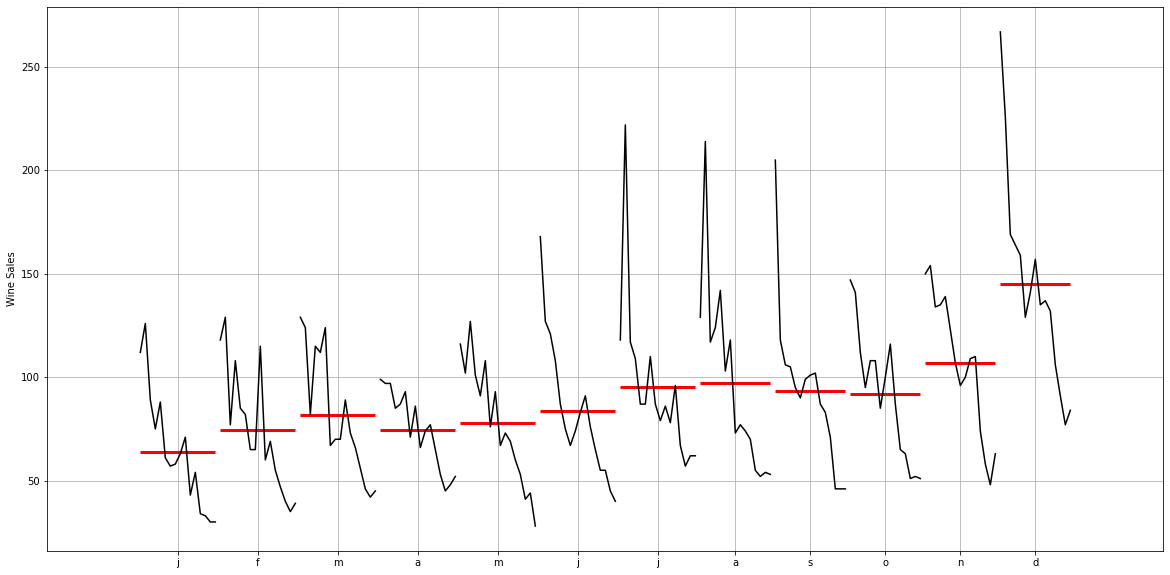

In [296]:
from statsmodels.graphics.tsaplots import month_plot

month_plot(df,ylabel='Wine Sales')
plt.grid();

### Yearly Wine Sales across Months

In [297]:
pd.pivot_table(data=df,values ='Rose',columns = df.index.month,index = df.index.year)

YearMonth     1      2      3     4      5      6      7      8      9   \
YearMonth                                                                 
1980       112.0  118.0  129.0  99.0  116.0  168.0  118.0  129.0  205.0   
1981       126.0  129.0  124.0  97.0  102.0  127.0  222.0  214.0  118.0   
1982        89.0   77.0   82.0  97.0  127.0  121.0  117.0  117.0  106.0   
1983        75.0  108.0  115.0  85.0  101.0  108.0  109.0  124.0  105.0   
1984        88.0   85.0  112.0  87.0   91.0   87.0   87.0  142.0   95.0   
1985        61.0   82.0  124.0  93.0  108.0   75.0   87.0  103.0   90.0   
1986        57.0   65.0   67.0  71.0   76.0   67.0  110.0  118.0   99.0   
1987        58.0   65.0   70.0  86.0   93.0   74.0   87.0   73.0  101.0   
1988        63.0  115.0   70.0  66.0   67.0   83.0   79.0   77.0  102.0   
1989        71.0   60.0   89.0  74.0   73.0   91.0   86.0   74.0   87.0   
1990        43.0   69.0   73.0  77.0   69.0   76.0   78.0   70.0   83.0   
1991        54.0   55.0   66.0  65.0   60.0   65.0   96.0   55.0   71.0   
1992        34.0   47.0   56.0  53.0   53.0   55.0   67.0   52.0   46.0   
1993        33.0   40.0   46.0  45.0   41.0   55.0   57.0   54.0   46.0   
1994        30.0   35.0   42.0  48.0   44.0   45.0   62.0   53.0   46.0   
1995        30.0   39.0   45.0  52.0   28.0   40.0   62.0    NaN    NaN   

YearMonth     10     11     12  
YearMonth                       
1980       147.0  150.0  267.0  
1981       141.0  154.0  226.0  
1982       112.0  134.0  169.0  
1983        95.0  135.0  164.0  
1984       108.0  139.0  159.0  
1985       108.0  123.0  129.0  
1986        85.0  107.0  141.0  
1987       100.0   96.0  157.0  
1988       116.0  100.0  135.0  
1989        87.0  109.0  137.0  
1990        65.0  110.0  132.0  
1991        63.0   74.0  106.0  
1992        51.0   58.0   91.0  
1993        52.0   48.0   77.0  
1994        51.0   63.0   84.0  
1995         NaN    NaN    NaN

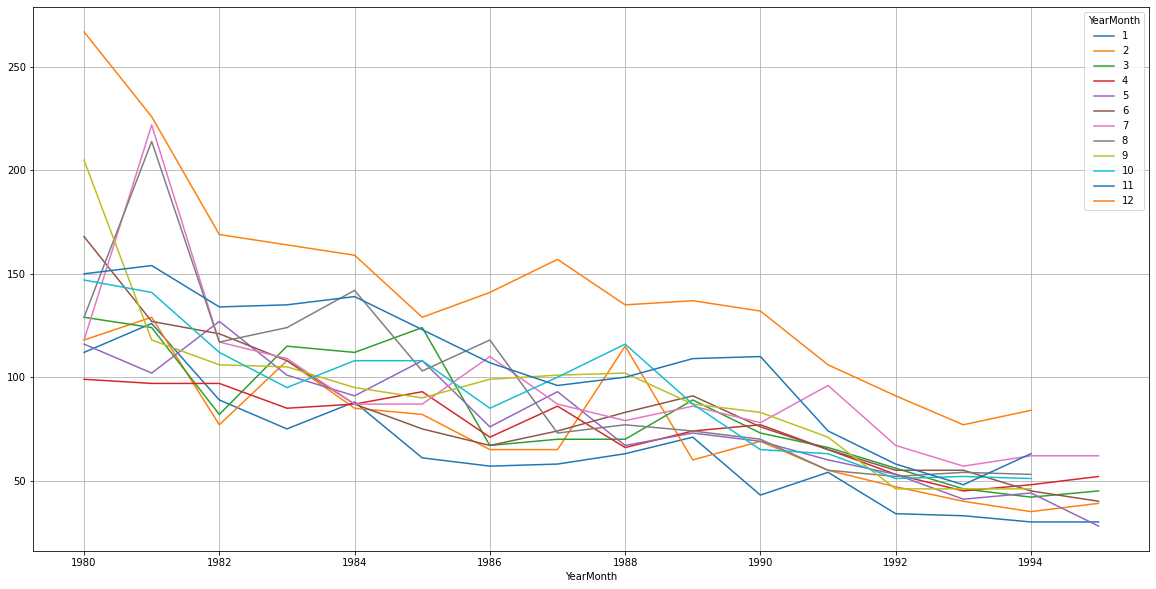

In [298]:
pd.pivot_table(data=df,values ='Rose',columns = df.index.month,index = df.index.year).plot();
plt.grid();

## Plot the Empirical Cumulative Distribution.

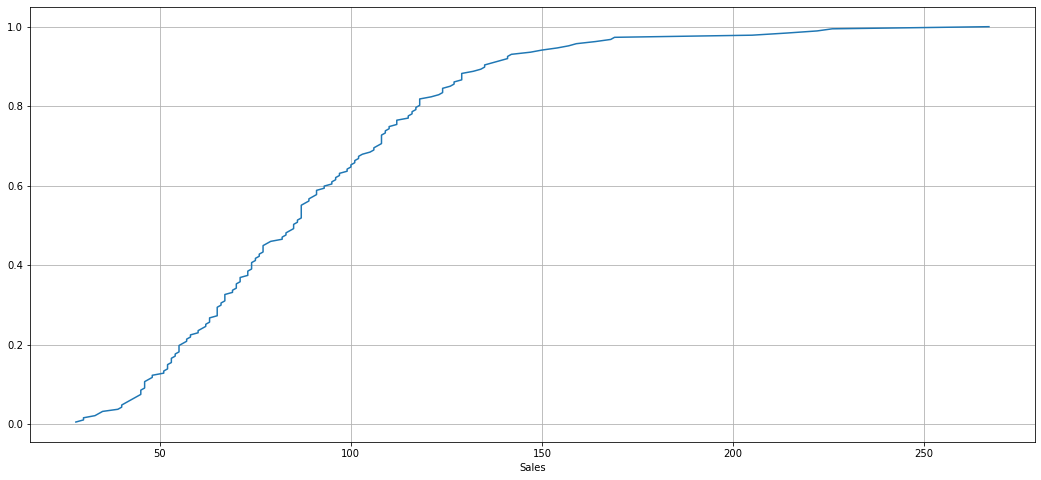

In [299]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df['Rose'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sales');

# Decomposition

### Additive Decomposition

In [300]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [301]:
df_add_decomp=seasonal_decompose(df,model='additive')

In [302]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,22

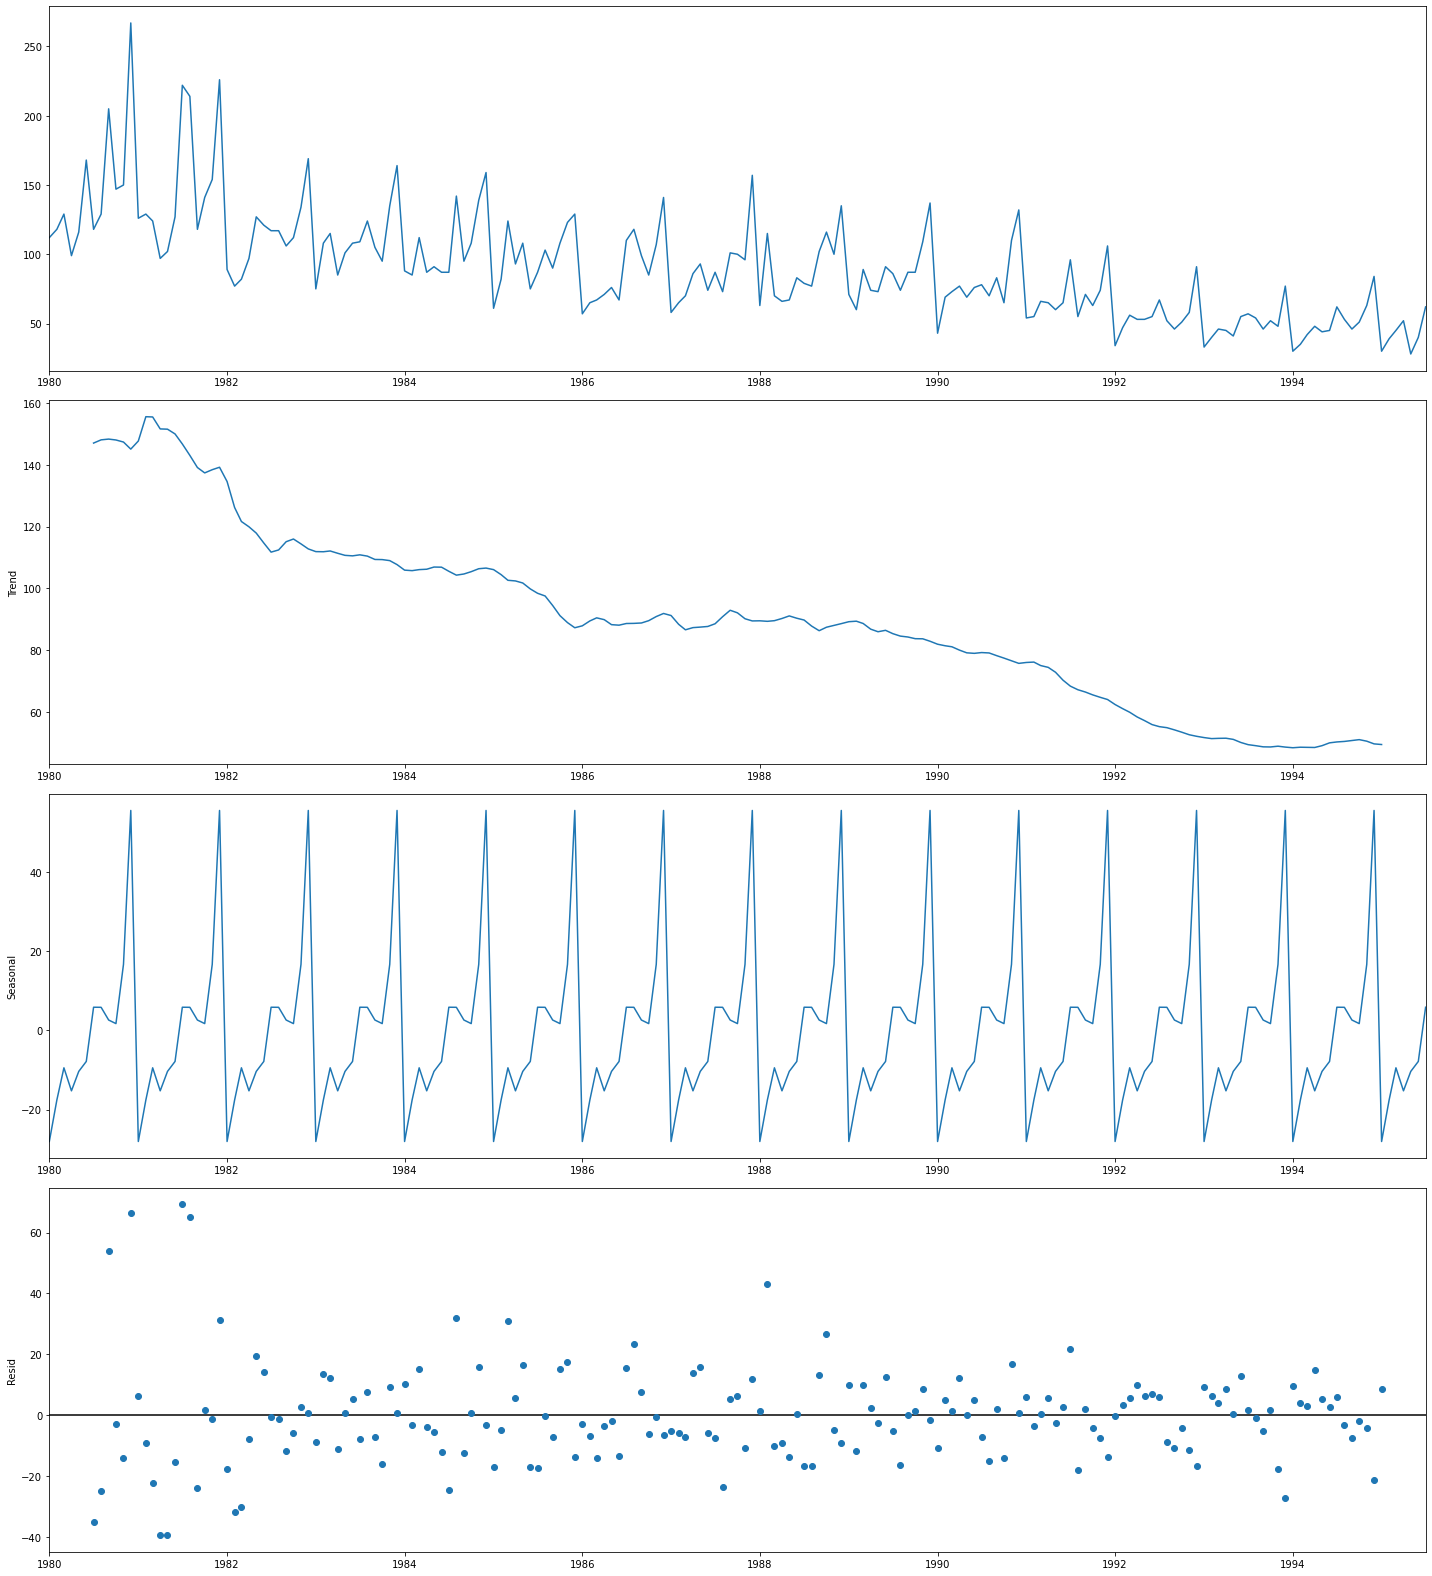

In [303]:
df_add_decomp.plot();

In [304]:
df_add_decomp_compenents=pd.concat([df_add_decomp.trend,df_add_decomp.seasonal,df_add_decomp.resid],axis=1)
df_add_decomp_compenents[0:23].round(1)

trend  seasonal  resid
YearMonth                         
1980-01-01    NaN     -28.0    NaN
1980-02-01    NaN     -17.6    NaN
1980-03-01    NaN      -9.4    NaN
1980-04-01    NaN     -15.2    NaN
1980-05-01    NaN     -10.3    NaN
1980-06-01    NaN      -7.8    NaN
1980-07-01  147.1       5.9  -35.0
1980-08-01  148.1       5.9  -25.0
1980-09-01  148.4       2.6   54.0
1980-10-01  148.1       1.7   -2.8
1980-11-01  147.4      16.7  -14.1
1980-12-01  145.1      55.6   66.3
1981-01-01  147.8     -28.0    6.3
1981-02-01  155.6     -17.6   -9.1
1981-03-01  155.5      -9.4  -22.1
1981-04-01  151.7     -15.2  -39.4
1981-05-01  151.6     -10.3  -39.2
1981-06-01  150.0      -7.8  -15.2
1981-07-01  146.8       5.9   69.3
1981-08-01  143.1       5.9   65.1
1981-09-01  139.2       2.6  -23.8
1981-10-01  137.4       1.7    1.8
1981-11-01  138.5      16.7   -1.2

### Multiplicative Decomposition

In [305]:
df_mult_decomp=seasonal_decompose(df,model='multiplicative',period=12)

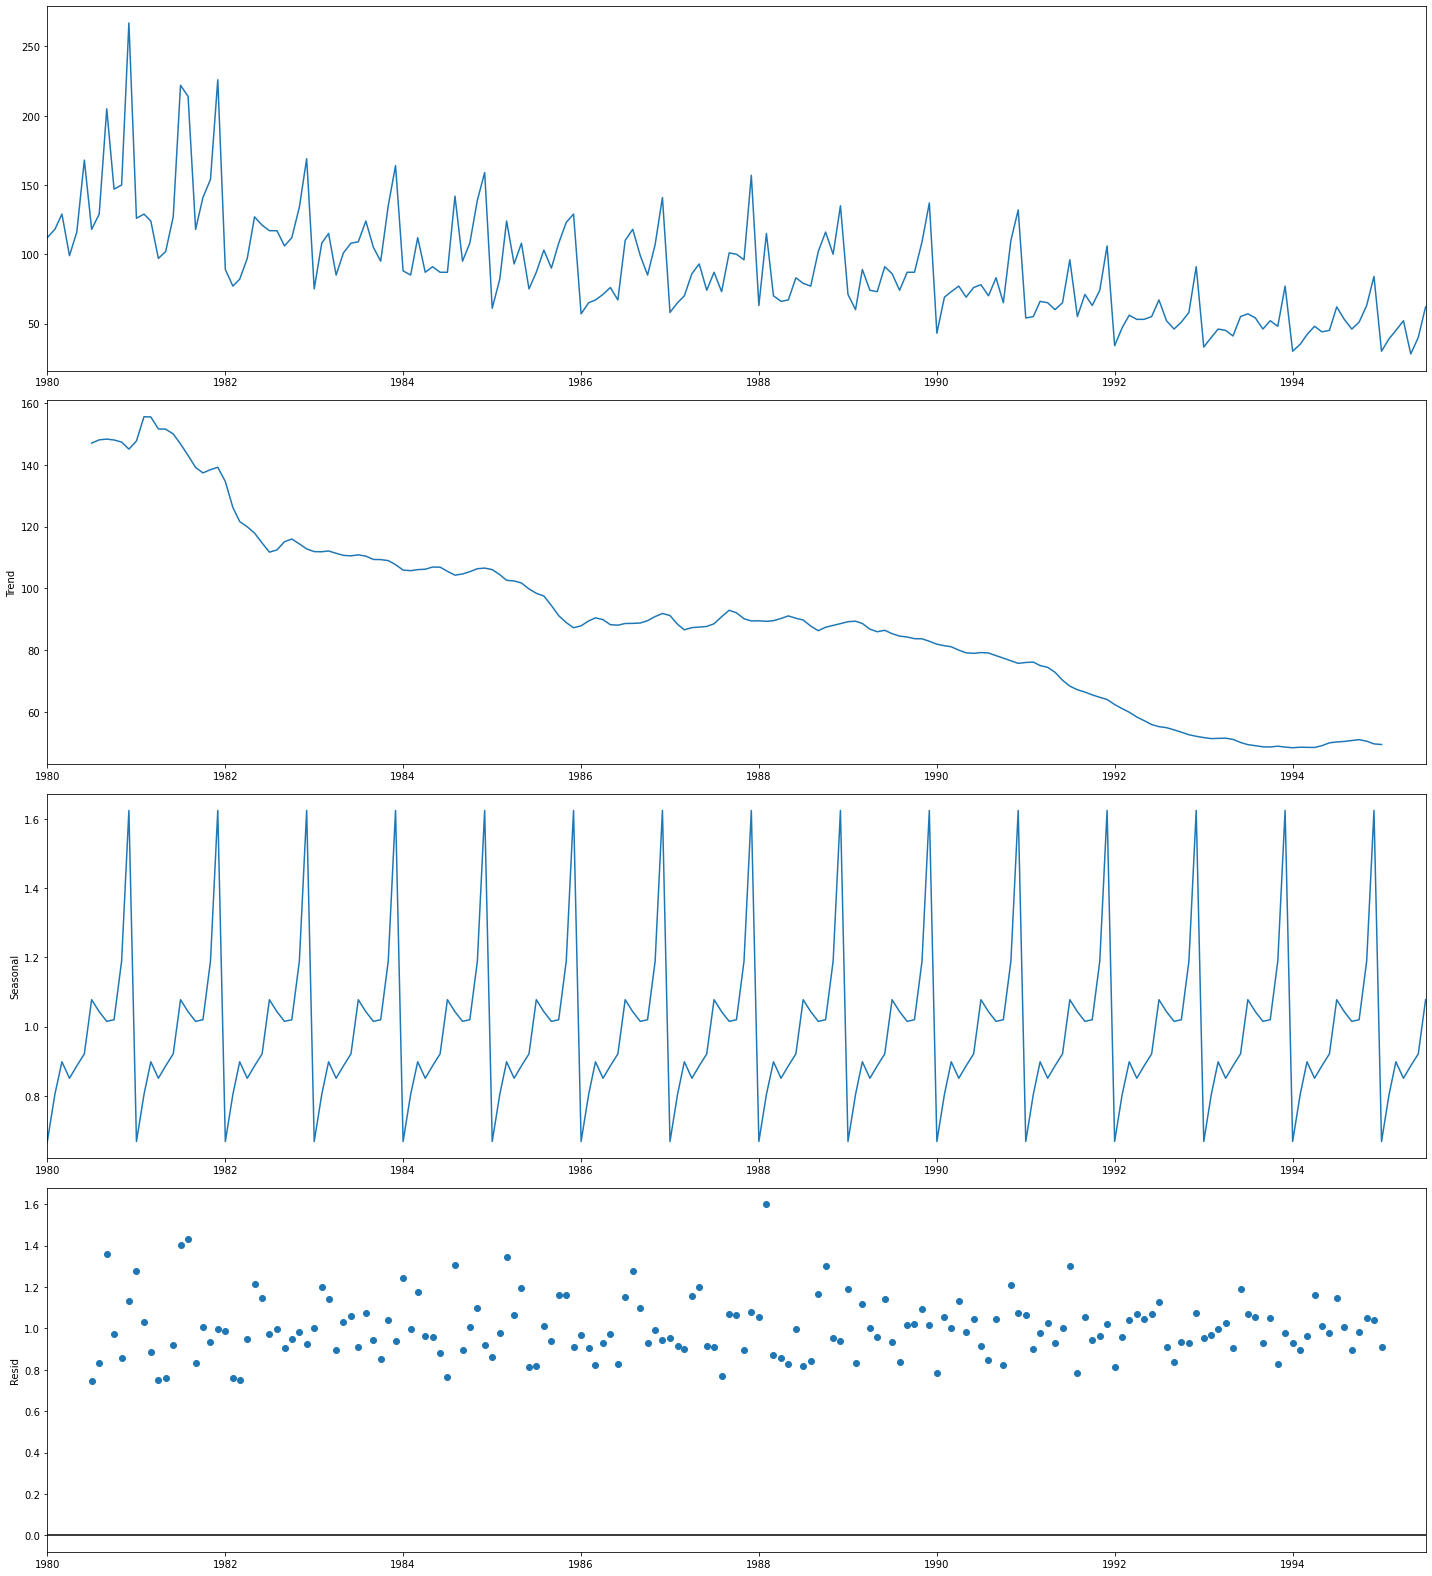

In [306]:
df_mult_decomp.plot();

In [307]:
df_mult_decomp_compenents=pd.concat([df_mult_decomp.trend,df_mult_decomp.seasonal,df_mult_decomp.resid],axis=1)
df_mult_decomp_compenents[0:23].round(1)

trend  seasonal  resid
YearMonth                         
1980-01-01    NaN       0.7    NaN
1980-02-01    NaN       0.8    NaN
1980-03-01    NaN       0.9    NaN
1980-04-01    NaN       0.9    NaN
1980-05-01    NaN       0.9    NaN
1980-06-01    NaN       0.9    NaN
1980-07-01  147.1       1.1    0.7
1980-08-01  148.1       1.0    0.8
1980-09-01  148.4       1.0    1.4
1980-10-01  148.1       1.0    1.0
1980-11-01  147.4       1.2    0.9
1980-12-01  145.1       1.6    1.1
1981-01-01  147.8       0.7    1.3
1981-02-01  155.6       0.8    1.0
1981-03-01  155.5       0.9    0.9
1981-04-01  151.7       0.9    0.8
1981-05-01  151.6       0.9    0.8
1981-06-01  150.0       0.9    0.9
1981-07-01  146.8       1.1    1.4
1981-08-01  143.1       1.0    1.4
1981-09-01  139.2       1.0    0.8
1981-10-01  137.4       1.0    1.0
1981-11-01  138.5       1.2    0.9

## Q3. Split the data into training and test. The test data should start in 1991.

### Splitting the Dataset

In [308]:
df_train=df[df.index<'1991']
df_test=df[df.index>='1991']

In [309]:
print(df_train.shape)
print(df_test.shape)

(132, 1)
(55, 1)


In [310]:
display(df_train.head())
print(colored('First Few Rows of Train Data',color='blue',attrs=['bold']))

display(df_train.tail())
print(colored('Last Few Rows of Train Data',color='blue',attrs=['bold']))

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

First Few Rows of Train Data


Rose
YearMonth        
1990-08-01   70.0
1990-09-01   83.0
1990-10-01   65.0
1990-11-01  110.0
1990-12-01  132.0

Last Few Rows of Train Data


In [311]:
display(df_test.head())
print(colored('First Few Rows of Test Data',color='blue',attrs=['bold']))

display(df_test.tail())
print(colored('Last Few Rows of Test Data',color='blue',attrs=['bold']))

Rose
YearMonth       
1991-01-01  54.0
1991-02-01  55.0
1991-03-01  66.0
1991-04-01  65.0
1991-05-01  60.0

First Few Rows of Test Data


Rose
YearMonth       
1995-03-01  45.0
1995-04-01  52.0
1995-05-01  28.0
1995-06-01  40.0
1995-07-01  62.0

Last Few Rows of Test Data


In [312]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,10

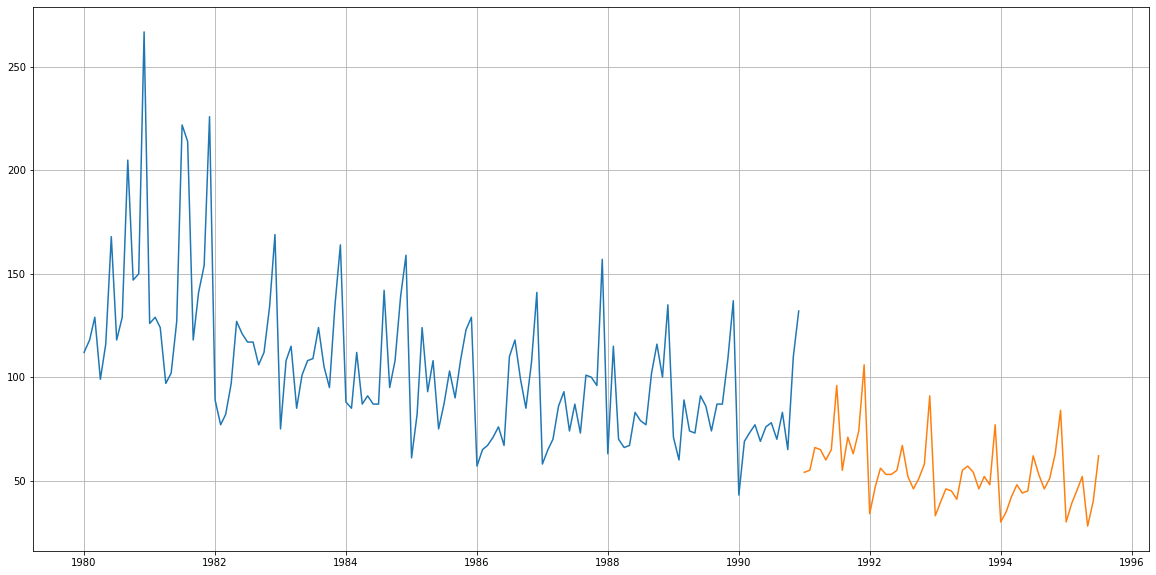

In [313]:
plt.plot(df_train.Rose)
plt.plot(df_test.Rose)
plt.grid()

## Q4. Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models should also be built on the training data and check the performance on the test data using RMSE.

## Model 1: Linear Regression

In [314]:
time_train = [i+1 for i in range(len(df_train))]
time_test = [i+133 for i in range(len(df_test))]
print('Training Time','\n',time_train)
print('Test Time','\n',time_test)

Training Time 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [315]:
df_train['time'] = time_train
df_test['time'] = time_test

In [316]:
display(df_train.head())
print(colored('First Few Rows of Train Data',color='blue',attrs=['bold']))

display(df_train.tail())
print(colored('Last Few Rows of Train Data',color='blue',attrs=['bold']))

Rose  time
YearMonth              
1980-01-01  112.0     1
1980-02-01  118.0     2
1980-03-01  129.0     3
1980-04-01   99.0     4
1980-05-01  116.0     5

First Few Rows of Train Data


Rose  time
YearMonth              
1990-08-01   70.0   128
1990-09-01   83.0   129
1990-10-01   65.0   130
1990-11-01  110.0   131
1990-12-01  132.0   132

Last Few Rows of Train Data


In [317]:
display(df_test.head())
print(colored('First Few Rows of Test Data',color='blue',attrs=['bold']))

display(df_test.tail())
print(colored('Last Few Rows of Test Data',color='blue',attrs=['bold']))

Rose  time
YearMonth             
1991-01-01  54.0   133
1991-02-01  55.0   134
1991-03-01  66.0   135
1991-04-01  65.0   136
1991-05-01  60.0   137

First Few Rows of Test Data


Rose  time
YearMonth             
1995-03-01  45.0   183
1995-04-01  52.0   184
1995-05-01  28.0   185
1995-06-01  40.0   186
1995-07-01  62.0   187

Last Few Rows of Test Data


In [318]:
from sklearn.linear_model import LinearRegression

In [319]:
lr = LinearRegression()

In [320]:
lr.fit(df_train[['time']],df_train.Rose)

LinearRegression()

In [321]:
df_test['forecast_lr'] = lr.predict(df_test[['time']])

In [322]:
df_test[['Rose','forecast_lr']].head(10).round(1)

Rose  forecast_lr
YearMonth                    
1991-01-01  54.0         72.1
1991-02-01  55.0         71.6
1991-03-01  66.0         71.1
1991-04-01  65.0         70.6
1991-05-01  60.0         70.1
1991-06-01  65.0         69.6
1991-07-01  96.0         69.1
1991-08-01  55.0         68.6
1991-09-01  71.0         68.1
1991-10-01  63.0         67.6

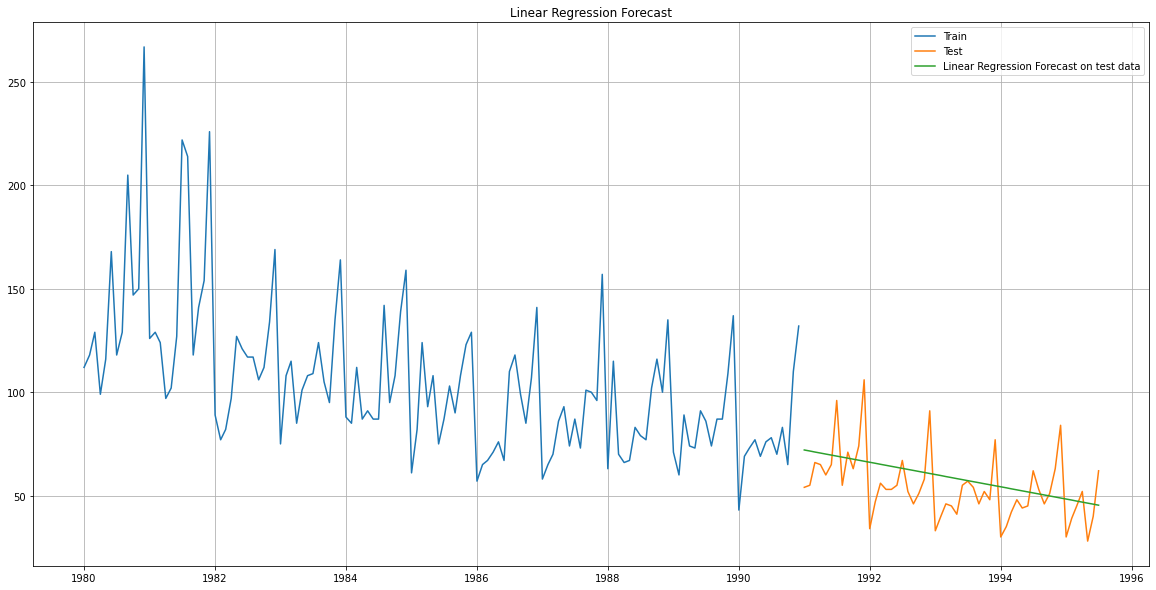

In [323]:
plt.plot( df_train.Rose, label='Train')
plt.plot(df_test.Rose, label='Test')
plt.plot(df_test.forecast_lr, label='Linear Regression Forecast on test data')
plt.legend(loc='best')
plt.grid();
plt.title('Linear Regression Forecast');

### Model Evaluation

In [324]:
from sklearn.metrics import mean_squared_error

In [325]:
rmse_lr = mean_squared_error(df_test.Rose,df_test.forecast_lr,squared=False)
rmse_lr

15.303047177325064

## Model 2: Naive Approach: $\hat{y}_{t+1} = y_t$

#### For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

In [326]:
df_test['forecast_naive'] = df_train['Rose'][-1]

In [327]:
df_test[['Rose','forecast_naive']].head(10).round(1)

Rose  forecast_naive
YearMonth                       
1991-01-01  54.0           132.0
1991-02-01  55.0           132.0
1991-03-01  66.0           132.0
1991-04-01  65.0           132.0
1991-05-01  60.0           132.0
1991-06-01  65.0           132.0
1991-07-01  96.0           132.0
1991-08-01  55.0           132.0
1991-09-01  71.0           132.0
1991-10-01  63.0           132.0

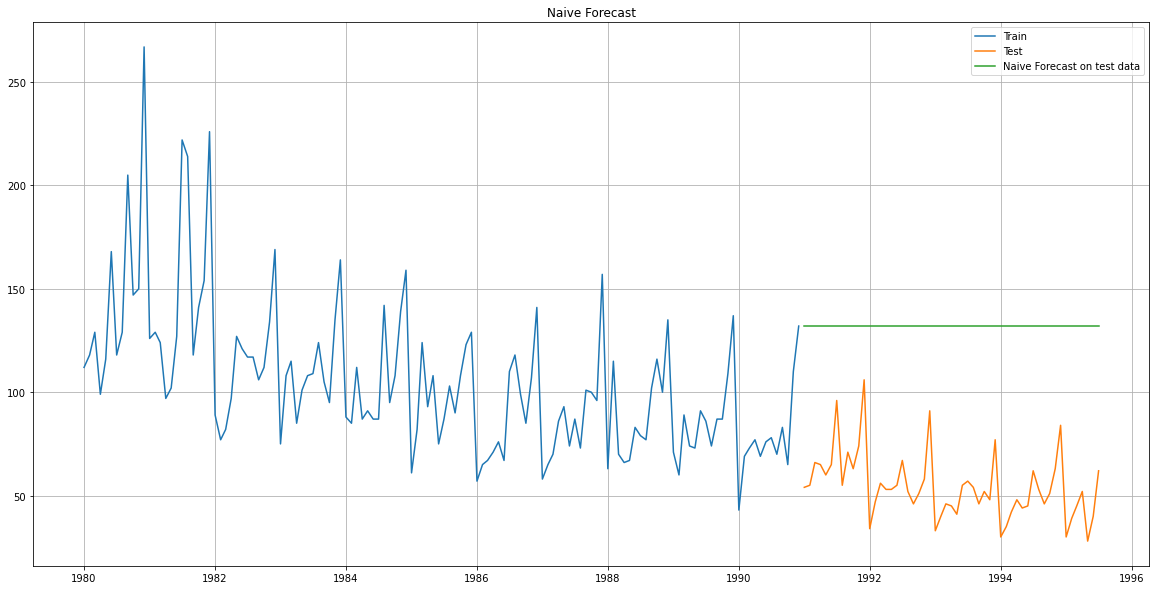

In [328]:
plt.plot( df_train.Rose, label='Train')
plt.plot(df_test.Rose, label='Test')
plt.plot(df_test.forecast_naive, label='Naive Forecast on test data')
plt.legend(loc='best')
plt.grid();
plt.title('Naive Forecast');

### Model Evaluation

In [329]:
rmse_naive = mean_squared_error(df_test.Rose,df_test.forecast_naive,squared=False)
rmse_naive

79.28154663201038

## Model 3: Simple Average

#### For this particular simple average method, we will forecast by using the average of the training values.

In [330]:
df_test['forecast_sa'] = df_train.Rose.mean()

In [331]:
df_test[['Rose','forecast_sa']].head(10).round(1)

Rose  forecast_sa
YearMonth                    
1991-01-01  54.0        104.9
1991-02-01  55.0        104.9
1991-03-01  66.0        104.9
1991-04-01  65.0        104.9
1991-05-01  60.0        104.9
1991-06-01  65.0        104.9
1991-07-01  96.0        104.9
1991-08-01  55.0        104.9
1991-09-01  71.0        104.9
1991-10-01  63.0        104.9

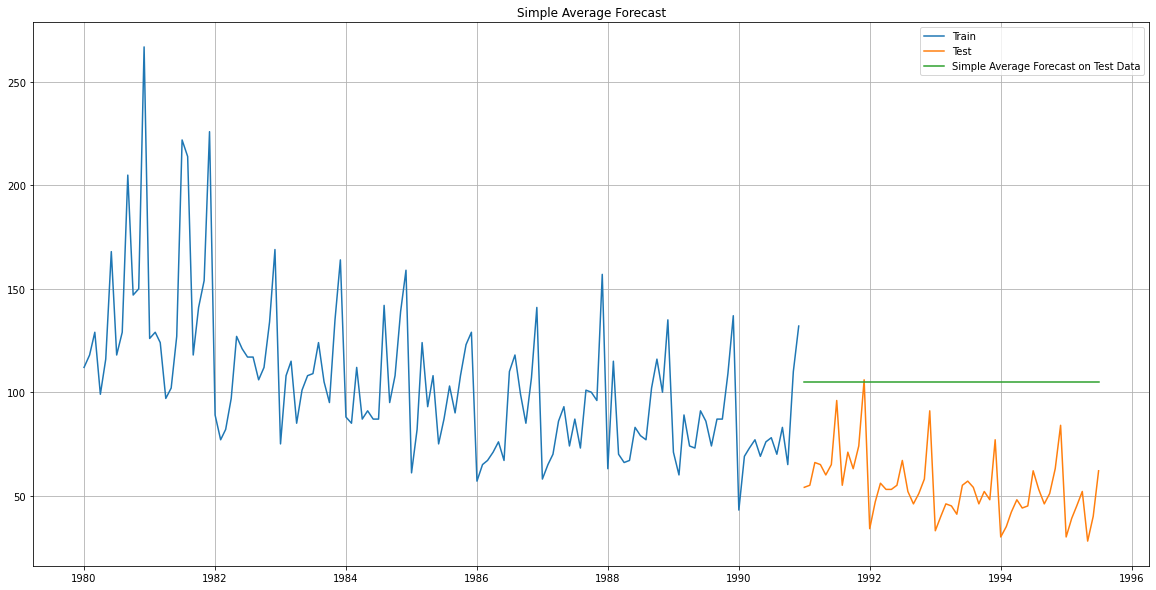

In [332]:
plt.plot(df_train.Rose, label='Train')
plt.plot(df_test.Rose, label='Test')
plt.plot(df_test.forecast_sa, label='Simple Average Forecast on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

### Model Evaluation

In [333]:
rmse_sa = mean_squared_error(df_test.Rose,df_test.forecast_sa,squared=False)
rmse_sa

53.02951860891705

### Before building the various Exponential Smoothing models, let us plot all the models and compare the Time Series plots

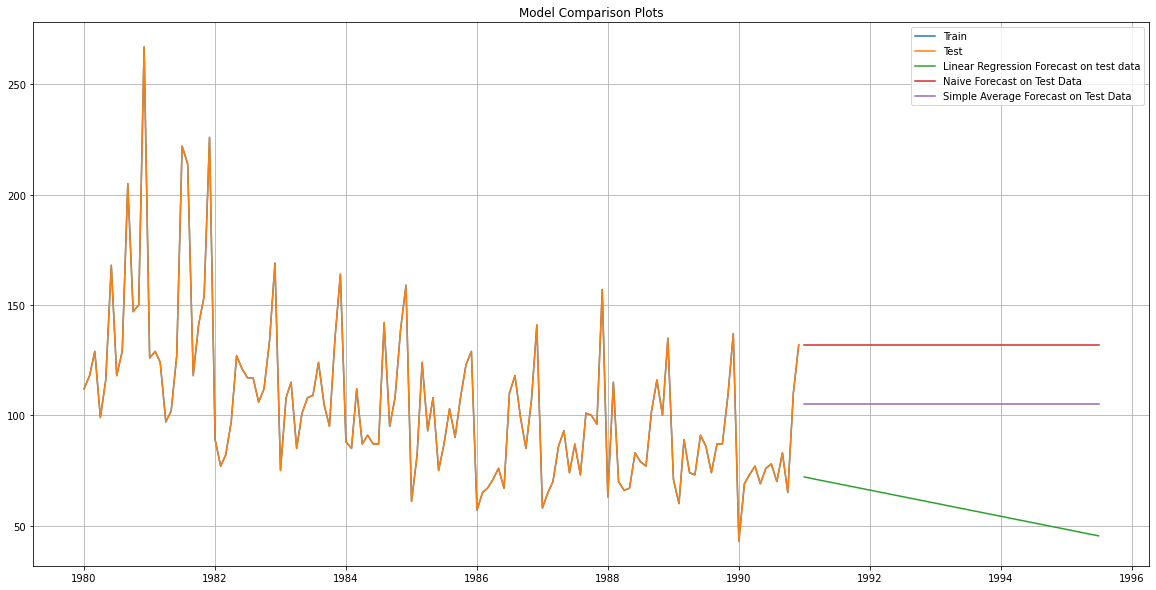

In [334]:
plt.figure(figsize=(20,10))
plt.plot(df_train.Rose, label='Train')
plt.plot(df_train.Rose, label='Test')
plt.plot(df_test.forecast_lr, label='Linear Regression Forecast on test data')
plt.plot(df_test.forecast_naive, label='Naive Forecast on Test Data')
plt.plot(df_test.forecast_sa, label='Simple Average Forecast on Test Data')
plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

## Model 4: Simple Exponential Smoothing

In [335]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [336]:
ses_optimized=SimpleExpSmoothing(df_train.Rose,initialization_method='estimated').fit(optimized=True)

In [449]:
ses_optimized.params_formatted

name       param  optimized
smoothing_level  alpha    0.098750       True
initial_level      l.0  134.387025       True

In [338]:
df_test['forecast_ses_optimized'] = ses_optimized.forecast(steps=len(df_test))

In [339]:
df_test[['Rose','forecast_ses_optimized']].head(10).round(1)

Rose  forecast_ses_optimized
YearMonth                               
1991-01-01  54.0                    87.1
1991-02-01  55.0                    87.1
1991-03-01  66.0                    87.1
1991-04-01  65.0                    87.1
1991-05-01  60.0                    87.1
1991-06-01  65.0                    87.1
1991-07-01  96.0                    87.1
1991-08-01  55.0                    87.1
1991-09-01  71.0                    87.1
1991-10-01  63.0                    87.1

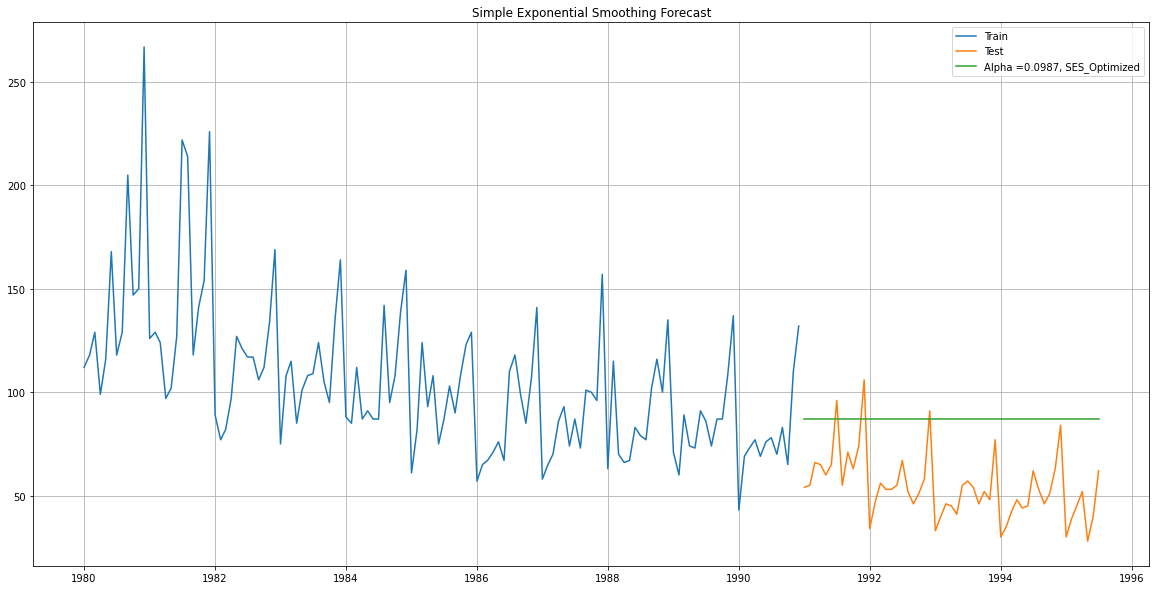

In [340]:
plt.plot(df_train.Rose, label='Train')
plt.plot(df_test.Rose, label='Test')
plt.plot(df_test.forecast_ses_optimized, label='Alpha =0.0987, SES_Optimized')
plt.legend(loc='best')
plt.grid()
plt.title('Simple Exponential Smoothing Forecast');

In [341]:
rmse_ses_optimized = mean_squared_error(df_test.Rose,df_test.forecast_ses_optimized,squared=False)
rmse_ses_optimized

36.381660485485945

### Optimizing Alpha based on Test RMSE

* Setting different alpha values.
* Remember, the higher the alpha value more weightage is given to the more recent observation. That means, what happened recently will happen again.
* We will run a loop with different alpha values to understand which particular value works best for alpha on the test set.

In [342]:
## First we will define an empty dataframe to store our values from the loop

results_ses = pd.DataFrame({'Alpha_Values':[],'RMSE_Train':[],'RMSE_Test': []})
results_ses 

Empty DataFrame
Columns: [Alpha_Values, RMSE_Train, RMSE_Test]
Index: []

In [343]:
for i in np.arange(0.1,1.1,0.1):
    ses_iteration=SimpleExpSmoothing(df_train.Rose,initialization_method='estimated').fit(smoothing_level=i,optimized=False,use_brute=True)
    rmse_train = mean_squared_error(df_train.Rose,ses_iteration.fittedvalues,squared=False)
    rmse_test = mean_squared_error(df_test.Rose,ses_iteration.forecast(steps=len(df_test)),squared=False)
    results_ses=results_ses.append({'Alpha_Values':i,'RMSE_Train':rmse_train 
                                      ,'RMSE_Test':rmse_test}, ignore_index=True)
results_ses

Alpha_Values  RMSE_Train  RMSE_Test
0           0.1   32.253385  36.413383
1           0.2   32.155991  40.940330
2           0.3   32.559312  47.077358
3           0.4   33.089422  53.336208
4           0.5   33.721164  59.208294
5           0.6   34.470951  64.536345
6           0.7   35.347613  69.262271
7           0.8   36.354969  73.337467
8           0.9   37.500023  76.702326
9           1.0   38.798636  79.281547

In [450]:
results_ses.sort_values(by='RMSE_Test').head().round(1)

Alpha_Values  RMSE_Train  RMSE_Test
0           0.1        32.3       36.4
1           0.2        32.2       40.9
2           0.3        32.6       47.1
3           0.4        33.1       53.3
4           0.5        33.7       59.2

### Final SES Model

In [345]:
ses= SimpleExpSmoothing(df_train.Rose,initialization_method='estimated').fit(smoothing_level=0.1,optimized=False,use_brute=True)

In [346]:
ses.params_formatted

name      param  optimized
smoothing_level  alpha   0.100000      False
initial_level      l.0  99.666667      False

In [347]:
df_test['forecast_ses'] = ses.forecast(steps=len(df_test))

In [348]:
df_test[['Rose','forecast_ses_optimized','forecast_ses']].head(10).round(1)

Rose  forecast_ses_optimized  forecast_ses
YearMonth                                             
1991-01-01  54.0                    87.1          87.1
1991-02-01  55.0                    87.1          87.1
1991-03-01  66.0                    87.1          87.1
1991-04-01  65.0                    87.1          87.1
1991-05-01  60.0                    87.1          87.1
1991-06-01  65.0                    87.1          87.1
1991-07-01  96.0                    87.1          87.1
1991-08-01  55.0                    87.1          87.1
1991-09-01  71.0                    87.1          87.1
1991-10-01  63.0                    87.1          87.1

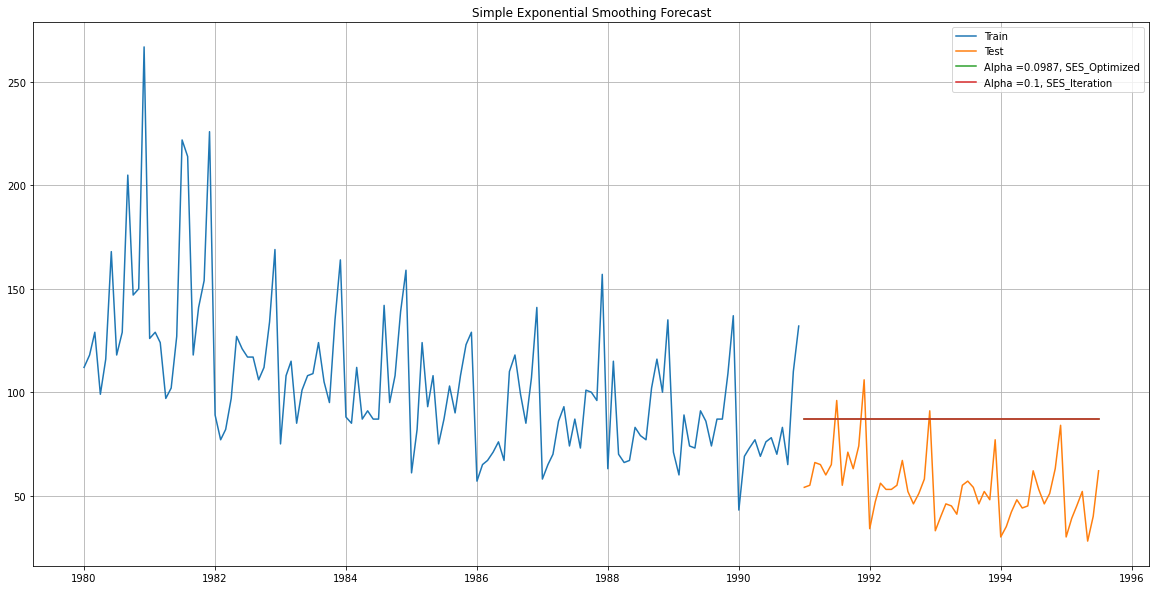

In [349]:
plt.plot(df_train.Rose, label='Train')
plt.plot(df_test.Rose, label='Test')
plt.plot(df_test.forecast_ses_optimized, label='Alpha =0.0987, SES_Optimized')
plt.plot(df_test.forecast_ses, label='Alpha =0.1, SES_Iteration')
plt.legend(loc='best')
plt.grid();
plt.title('Simple Exponential Smoothing Forecast');

In [350]:
rmse_ses = mean_squared_error(df_test.Rose,df_test.forecast_ses,squared=False)
rmse_ses

36.4133830948213

## Model 5: Double Exponential Smoothing

#### Two parameters $\alpha$ and $\beta$ are estimated in this model. Level and Trend are accounted for in this model.

In [351]:
des_optimized = Holt(df_train.Rose,initialization_method='estimated').fit(optimized=True)

In [352]:
des_optimized.params_formatted

name         param  optimized
smoothing_level  alpha  1.490116e-08       True
smoothing_trend   beta  1.661039e-10       True
initial_level      l.0  1.378155e+02       True
initial_trend      b.0 -4.943782e-01       True

In [353]:
df_test['forecast_des_optimized'] = des_optimized.forecast(steps=len(df_test))

In [354]:
df_test[['Rose','forecast_des_optimized']].head(10).round(1)

Rose  forecast_des_optimized
YearMonth                               
1991-01-01  54.0                    72.1
1991-02-01  55.0                    71.6
1991-03-01  66.0                    71.1
1991-04-01  65.0                    70.6
1991-05-01  60.0                    70.1
1991-06-01  65.0                    69.6
1991-07-01  96.0                    69.1
1991-08-01  55.0                    68.6
1991-09-01  71.0                    68.1
1991-10-01  63.0                    67.6

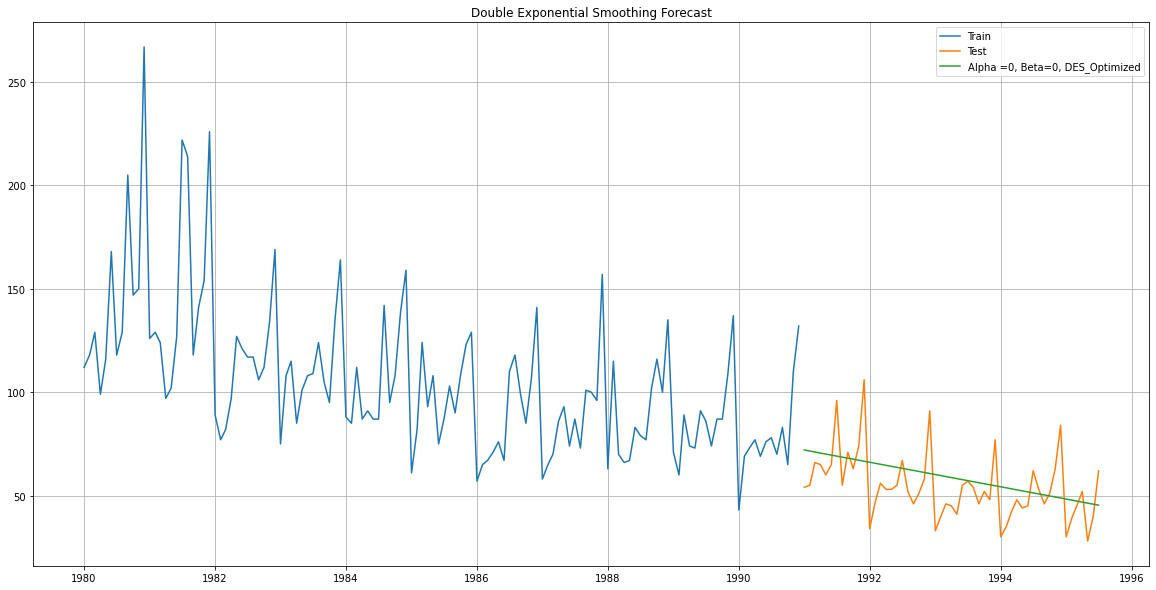

In [355]:
plt.plot(df_train.Rose, label='Train')
plt.plot(df_test.Rose, label='Test')
plt.plot(df_test.forecast_des_optimized, label='Alpha =0, Beta=0, DES_Optimized')
plt.legend(loc='best')
plt.grid()
plt.title('Double Exponential Smoothing Forecast');

In [356]:
rmse_des_optimized = mean_squared_error(df_test.Rose,df_test.forecast_des_optimized,squared=False)
rmse_des_optimized

15.303036982581704

### Optimizing Alpha and Beta based on Test RMSE

In [357]:
## First we will define an empty dataframe to store our values from the loop

results_des = pd.DataFrame({'Alpha_Values':[],'Beta Values':[],'RMSE_Train':[],'RMSE_Test': []})
results_des

Empty DataFrame
Columns: [Alpha_Values, Beta Values, RMSE_Train, RMSE_Test]
Index: []

In [358]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        des_iteration=Holt(df_train.Rose,initialization_method='estimated').fit(smoothing_level=i,smoothing_trend=j,
                                                                                  optimized=False,use_brute=True)
        rmse_train = mean_squared_error(df_train.Rose,des_iteration.fittedvalues,squared=False)
        rmse_test = mean_squared_error(df_test.Rose,des_iteration.forecast(steps=len(df_test)),squared=False)
        results_des=results_des.append({'Alpha_Values':i, 'Beta Values':j,'RMSE_Train':rmse_train 
                                      ,'RMSE_Test':rmse_test}, ignore_index=True)
results_des

Alpha_Values  Beta Values  RMSE_Train   RMSE_Test
0            0.1          0.1   35.120545   36.449278
1            0.1          0.2   33.990798   48.144702
2            0.1          0.3   33.518388   77.591204
3            0.1          0.4   33.495355   99.108207
4            0.1          0.5   33.819101  123.623200
..           ...          ...         ...         ...
95           1.0          0.6   51.833717  801.102238
96           1.0          0.7   54.498417  841.314130
97           1.0          0.8   57.366477  853.386964
98           1.0          0.9   60.474397  834.132572
99           1.0          1.0   63.873750  779.501869

[100 rows x 4 columns]

In [451]:
results_des.sort_values(by='RMSE_Test').head().round(1)

Alpha_Values  Beta Values  RMSE_Train  RMSE_Test
0            0.1          0.1        35.1       36.4
1            0.1          0.2        34.0       48.1
10           0.2          0.1        33.3       65.2
2            0.1          0.3        33.5       77.6
20           0.3          0.1        33.7       98.1

### Final DES Model

In [360]:
des= Holt(df_train.Rose,initialization_method='estimated').fit(smoothing_level=0.1,smoothing_trend=0.1,
                                                                 optimized=False,use_brute=True)

In [361]:
des.params_formatted

name      param  optimized
smoothing_level  alpha   0.100000      False
smoothing_trend   beta   0.100000      False
initial_level      l.0  99.666667      False
initial_trend      b.0   6.260606      False

In [362]:
df_test['forecast_des'] = des.forecast(steps=len(df_test))

In [363]:
df_test[['Rose','forecast_des_optimized','forecast_des']].head(10).round(1)

Rose  forecast_des_optimized  forecast_des
YearMonth                                             
1991-01-01  54.0                    72.1          83.9
1991-02-01  55.0                    71.6          84.0
1991-03-01  66.0                    71.1          84.1
1991-04-01  65.0                    70.6          84.2
1991-05-01  60.0                    70.1          84.3
1991-06-01  65.0                    69.6          84.4
1991-07-01  96.0                    69.1          84.5
1991-08-01  55.0                    68.6          84.6
1991-09-01  71.0                    68.1          84.7
1991-10-01  63.0                    67.6          84.8

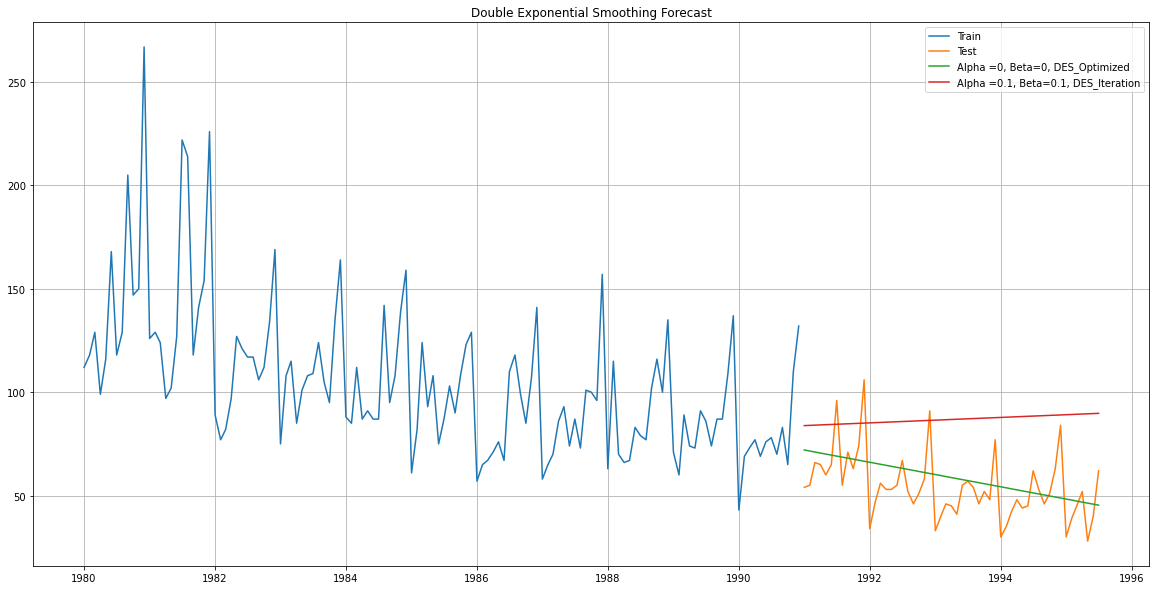

In [364]:
plt.plot(df_train.Rose, label='Train')
plt.plot(df_test.Rose, label='Test')
plt.plot(df_test.forecast_des_optimized, label='Alpha =0, Beta=0, DES_Optimized')
plt.plot(df_test.forecast_des, label='Alpha =0.1, Beta=0.1, DES_Iteration')
plt.legend(loc='best')
plt.grid();
plt.title('Double Exponential Smoothing Forecast');

In [365]:
rmse_des = mean_squared_error(df_test.Rose,df_test.forecast_des,squared=False)
rmse_des

36.44927848144102

## Model 6: Triple Exponential Smoothing with Additive trend & Additive seasonality

#### Three parameters $\alpha$, $\beta$ and $\gamma$ are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [366]:
tes_add_add_optimized = ExponentialSmoothing(df_train.Rose,initialization_method='estimated',trend='additive',seasonal='additive').fit(optimized=True)

In [367]:
tes_add_add_optimized.params_formatted

name       param  optimized
smoothing_level     alpha    0.089541       True
smoothing_trend      beta    0.000240       True
smoothing_seasonal  gamma    0.003467       True
initial_level         l.0  146.557016       True
initial_trend         b.0   -0.547197       True
initial_seasons.0     s.0  -31.174785       True
initial_seasons.1     s.1  -18.748399       True
initial_seasons.2     s.2  -10.769618       True
initial_seasons.3     s.3  -21.367410       True
initial_seasons.4     s.4  -12.637755       True
initial_seasons.5     s.5   -7.274303       True
initial_seasons.6     s.6    2.612798       True
initial_seasons.7     s.7    8.696036       True
initial_seasons.8     s.8    4.793811       True
initial_seasons.9     s.9    2.961101       True
initial_seasons.10   s.10   21.057388       True
initial_seasons.11   s.11   63.182799       True

In [368]:
df_test['forecast_tes_add_add_optimized'] = tes_add_add_optimized.forecast(steps=len(df_test))

In [369]:
df_test[['Rose','forecast_tes_add_add_optimized']].head(10).round(1)

Rose  forecast_tes_add_add_optimized
YearMonth                                       
1991-01-01  54.0                            42.7
1991-02-01  55.0                            54.6
1991-03-01  66.0                            62.0
1991-04-01  65.0                            50.9
1991-05-01  60.0                            59.0
1991-06-01  65.0                            63.9
1991-07-01  96.0                            73.2
1991-08-01  55.0                            78.7
1991-09-01  71.0                            74.3
1991-10-01  63.0                            71.9

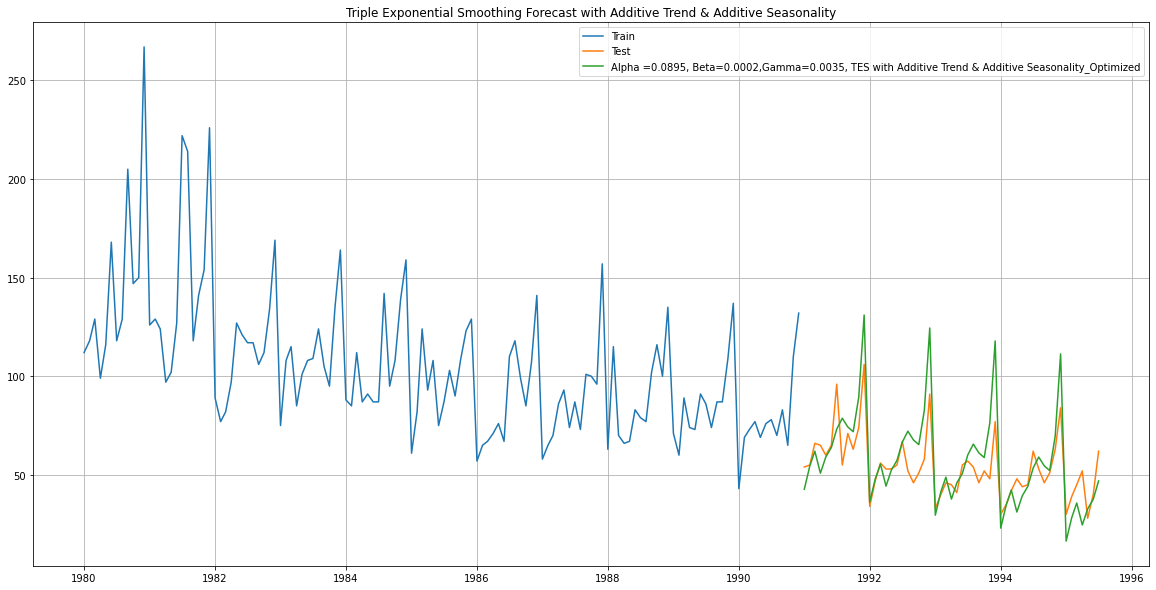

In [370]:
plt.plot(df_train.Rose, label='Train')
plt.plot(df_test.Rose, label='Test')
plt.plot(df_test.forecast_tes_add_add_optimized, 
         label='Alpha =0.0895, Beta=0.0002,Gamma=0.0035, TES with Additive Trend & Additive Seasonality_Optimized')
plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing Forecast with Additive Trend & Additive Seasonality');

In [371]:
rmse_tes_add_add_optimized = mean_squared_error(df_test.Rose,df_test.forecast_tes_add_add_optimized,squared=False)
rmse_tes_add_add_optimized

14.16235940393844

### Optimizing Alpha, Beta and Gamma based on Test RMSE

In [372]:
results_tes_add_add = pd.DataFrame({'Alpha_Values':[],'Beta Values':[],'Gamma Values':[],'RMSE_Train':[],'RMSE_Test': []})
results_tes_add_add

Empty DataFrame
Columns: [Alpha_Values, Beta Values, Gamma Values, RMSE_Train, RMSE_Test]
Index: []

In [373]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            tes_add_add_iteration=ExponentialSmoothing(df_train.Rose,initialization_method='estimated',trend='additive',
            seasonal='additive').fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            rmse_train = mean_squared_error(df_train.Rose,tes_add_add_iteration.fittedvalues,squared=False)
            rmse_test = mean_squared_error(df_test.Rose,tes_add_add_iteration.forecast(steps=len(df_test)),squared=False)
            results_tes_add_add=results_tes_add_add.append({'Alpha_Values':i, 'Beta Values':j,'Gamma Values':k,'RMSE_Train':rmse_train 
                                      ,'RMSE_Test':rmse_test}, ignore_index=True)
results_tes_add_add

Alpha_Values  Beta Values  Gamma Values     RMSE_Train     RMSE_Test
0             0.1          0.1           0.1      21.332001  1.463238e+01
1             0.1          0.1           0.2      21.376545  1.329599e+01
2             0.1          0.1           0.3      21.711811  1.331995e+01
3             0.1          0.1           0.4      22.223992  1.365281e+01
4             0.1          0.1           0.5      22.868747  1.405060e+01
..            ...          ...           ...            ...           ...
995           1.0          1.0           0.6    2005.858333  3.397491e+04
996           1.0          1.0           0.7    7447.070502  8.766223e+04
997           1.0          1.0           0.8   25743.870344  8.166530e+05
998           1.0          1.0           0.9   80677.424683  3.575054e+06
999           1.0          1.0           1.0  228894.798212  1.205732e+07

[1000 rows x 5 columns]

In [452]:
results_tes_add_add.sort_values(by='RMSE_Test').head().round(1)

Alpha_Values  Beta Values  Gamma Values  RMSE_Train  RMSE_Test
32           0.1          0.4           0.3        22.7       12.3
22           0.1          0.3           0.3        22.3       12.3
13           0.1          0.2           0.4        22.5       12.3
12           0.1          0.2           0.3        22.0       12.4
23           0.1          0.3           0.4        22.9       12.4

### Final TES Model with Additive trend & Additive seasonality

In [375]:
tes_add_add= ExponentialSmoothing(df_train.Rose,initialization_method='estimated',trend='additive',seasonal='additive').fit(
    smoothing_level=0.1,smoothing_trend=0.4,smoothing_seasonal=0.3, optimized=False,use_brute=True)

In [376]:
tes_add_add.params_formatted

name       param  optimized
smoothing_level     alpha    0.100000      False
smoothing_trend      beta    0.400000      False
smoothing_seasonal  gamma    0.300000      False
initial_level         l.0  145.275000      False
initial_trend         b.0    0.764394      False
initial_seasons.0     s.0  -30.484375      False
initial_seasons.1     s.1  -25.046875      False
initial_seasons.2     s.2  -15.536458      False
initial_seasons.3     s.3  -30.734375      False
initial_seasons.4     s.4  -16.463542      False
initial_seasons.5     s.5   -9.723958      False
initial_seasons.6     s.6   12.442708      False
initial_seasons.7     s.7   17.536458      False
initial_seasons.8     s.8    5.557292      False
initial_seasons.9     s.9   -3.890625      False
initial_seasons.10   s.10   15.994792      False
initial_seasons.11   s.11   80.348958      False

In [377]:
df_test['forecast_tes_add_add'] = tes_add_add.forecast(steps=len(df_test))

In [378]:
df_test[['Rose','forecast_tes_add_add_optimized','forecast_tes_add_add']].head(10).round(1)

Rose  forecast_tes_add_add_optimized  forecast_tes_add_add
YearMonth                                                             
1991-01-01  54.0                            42.7                  44.8
1991-02-01  55.0                            54.6                  61.1
1991-03-01  66.0                            62.0                  65.5
1991-04-01  65.0                            50.9                  60.7
1991-05-01  60.0                            59.0                  60.3
1991-06-01  65.0                            63.9                  64.6
1991-07-01  96.0                            73.2                  68.6
1991-08-01  55.0                            78.7                  65.5
1991-09-01  71.0                            74.3                  74.8
1991-10-01  63.0                            71.9                  71.0

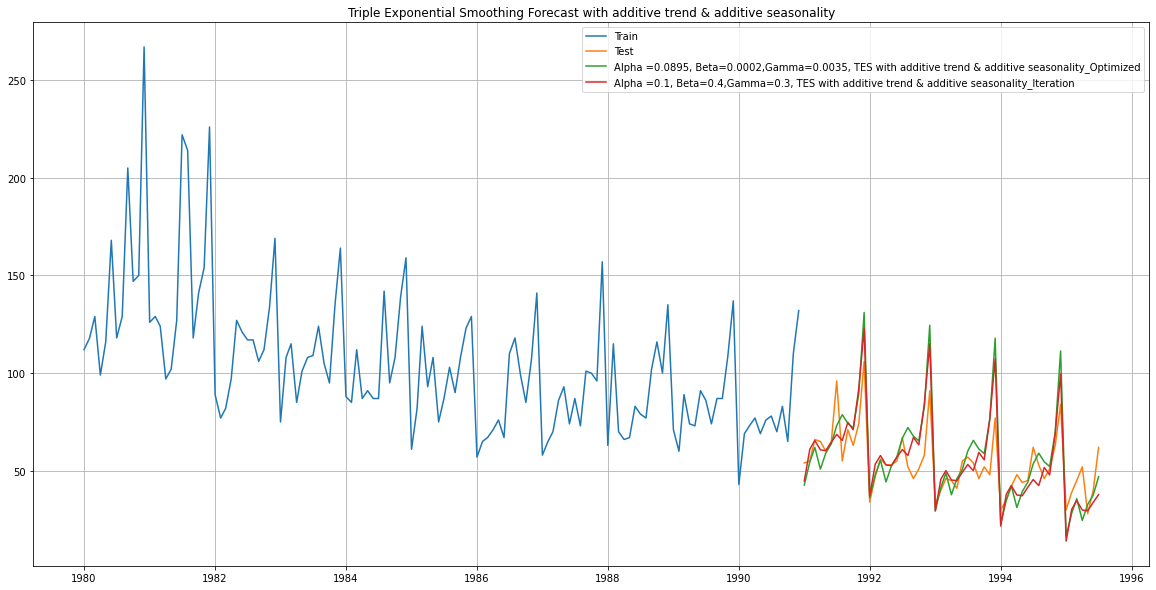

In [379]:
plt.figure(figsize=(20,10))
plt.plot(df_train.Rose, label='Train')
plt.plot(df_test.Rose, label='Test')
plt.plot(df_test.forecast_tes_add_add_optimized, 
         label='Alpha =0.0895, Beta=0.0002,Gamma=0.0035, TES with additive trend & additive seasonality_Optimized')
plt.plot(df_test.forecast_tes_add_add, 
         label='Alpha =0.1, Beta=0.4,Gamma=0.3, TES with additive trend & additive seasonality_Iteration')
plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing Forecast with additive trend & additive seasonality');

In [380]:
rmse_tes_add_add = mean_squared_error(df_test.Rose,df_test.forecast_tes_add_add,squared=False)
rmse_tes_add_add

12.256892975919007

## Model 7: Triple Exponential Smoothing with Additive Trend & Multiplicative Seasonality

In [381]:
tes_add_mult_optimized = ExponentialSmoothing(df_train.Rose,initialization_method='estimated',trend='additive',
                                              seasonal='multiplicative').fit(optimized=True)

In [382]:
tes_add_mult_optimized.params_formatted

name       param  optimized
smoothing_level     alpha    0.071511       True
smoothing_trend      beta    0.045292       True
smoothing_seasonal  gamma    0.000072       True
initial_level         l.0  130.408391       True
initial_trend         b.0   -0.779857       True
initial_seasons.0     s.0    0.862190       True
initial_seasons.1     s.1    0.977675       True
initial_seasons.2     s.2    1.068773       True
initial_seasons.3     s.3    0.934039       True
initial_seasons.4     s.4    1.050625       True
initial_seasons.5     s.5    1.144110       True
initial_seasons.6     s.6    1.258369       True
initial_seasons.7     s.7    1.339378       True
initial_seasons.8     s.8    1.267788       True
initial_seasons.9     s.9    1.241313       True
initial_seasons.10   s.10    1.447246       True
initial_seasons.11   s.11    1.995537       True

In [383]:
df_test['forecast_tes_add_mult_optimized'] = tes_add_mult_optimized.forecast(steps=len(df_test))

In [384]:
df_test[['Rose','forecast_tes_add_mult_optimized']].head(10).round(1)

Rose  forecast_tes_add_mult_optimized
YearMonth                                        
1991-01-01  54.0                             56.3
1991-02-01  55.0                             63.7
1991-03-01  66.0                             69.4
1991-04-01  65.0                             60.4
1991-05-01  60.0                             67.8
1991-06-01  65.0                             73.5
1991-07-01  96.0                             80.6
1991-08-01  55.0                             85.5
1991-09-01  71.0                             80.7
1991-10-01  63.0                             78.8

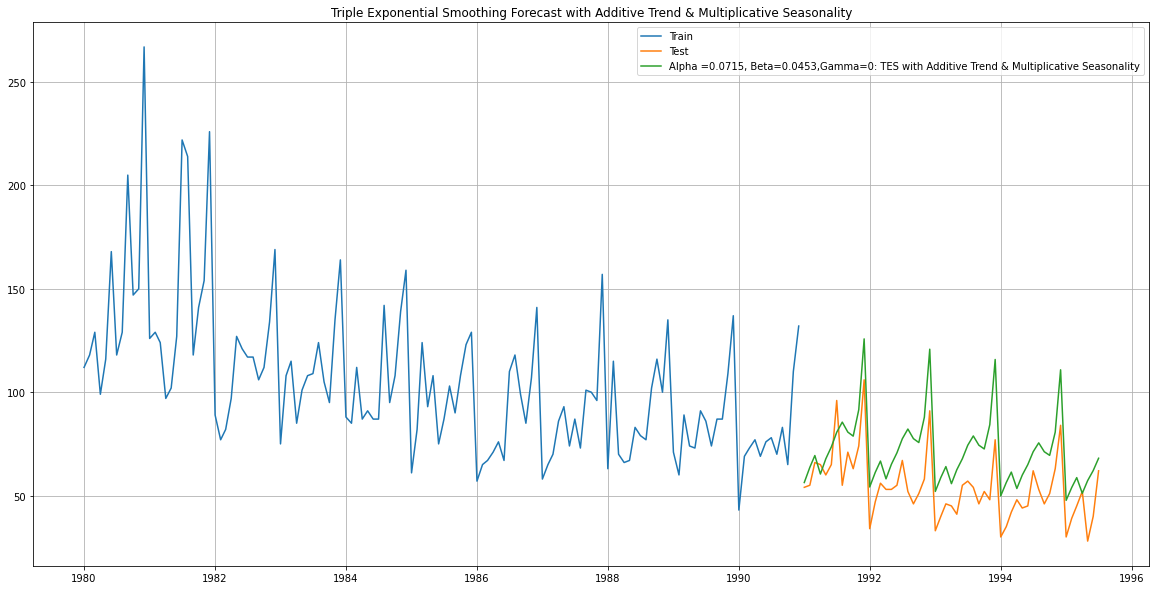

In [385]:
plt.plot(df_train.Rose, label='Train')
plt.plot(df_test.Rose, label='Test')
plt.plot(df_test.forecast_tes_add_mult_optimized, 
         label='Alpha =0.0715, Beta=0.0453,Gamma=0: TES with Additive Trend & Multiplicative Seasonality')
plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing Forecast with Additive Trend & Multiplicative Seasonality');

In [386]:
rmse_tes_add_mult_optimized = mean_squared_error(df_test.Rose,df_test.forecast_tes_add_mult_optimized,squared=False)
rmse_tes_add_mult_optimized

19.715122569058025

### Optimizing Alpha, Beta and Gamma based on Test RMSE

In [387]:
results_tes_add_mult = pd.DataFrame({'Alpha_Values':[],'Beta Values':[],'Gamma Values':[],'RMSE_Train':[],'RMSE_Test': []})
results_tes_add_mult

Empty DataFrame
Columns: [Alpha_Values, Beta Values, Gamma Values, RMSE_Train, RMSE_Test]
Index: []

In [388]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            tes_add_mult_iteration=ExponentialSmoothing(df_train.Rose,initialization_method='estimated',trend='additive',
            seasonal='multiplicative').fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            rmse_train = mean_squared_error(df_train.Rose,tes_add_mult_iteration.fittedvalues,squared=False)
            rmse_test = mean_squared_error(df_test.Rose,tes_add_mult_iteration.forecast(steps=len(df_test)),squared=False)
            results_tes_add_mult=results_tes_add_mult.append({'Alpha_Values':i, 'Beta Values':j,'Gamma Values':k,'RMSE_Train':rmse_train 
                                      ,'RMSE_Test':rmse_test}, ignore_index=True)
results_tes_add_mult

Alpha_Values  Beta Values  Gamma Values    RMSE_Train    RMSE_Test
0             0.1          0.1           0.1     19.535124    11.636057
1             0.1          0.1           0.2     20.068055    11.520208
2             0.1          0.1           0.3     20.714821    11.694004
3             0.1          0.1           0.4     21.459373    12.062741
4             0.1          0.1           0.5     22.307144    12.581798
..            ...          ...           ...           ...          ...
995           1.0          1.0           0.6   2140.632923  6630.567014
996           1.0          1.0           0.7   3091.001599  9720.768645
997           1.0          1.0           0.8   2438.212926  2573.886277
998           1.0          1.0           0.9  28835.801098  3522.904467
999           1.0          1.0           1.0   1577.905281  3104.660510

[1000 rows x 5 columns]

In [389]:
results_tes_add_mult.sort_values(by='RMSE_Test').head()

Alpha_Values  Beta Values  Gamma Values  RMSE_Train  RMSE_Test
10            0.1          0.2           0.1   19.770392   9.266047
11            0.1          0.2           0.2   20.253487   9.585590
151           0.2          0.6           0.2   23.129850   9.982780
12            0.1          0.2           0.3   20.871304   9.989167
142           0.2          0.5           0.3   23.656276  10.336096

### Final TES Model with Additive Trend & Multiplicative Seasonality

In [390]:
tes_add_mult= ExponentialSmoothing(df_train.Rose,initialization_method='estimated',trend='additive',seasonal='multiplicative').fit(
    smoothing_level=0.1,smoothing_trend=0.2,smoothing_seasonal=0.1, optimized=False,use_brute=True)

In [391]:
tes_add_mult.params_formatted

name       param  optimized
smoothing_level     alpha    0.100000      False
smoothing_trend      beta    0.200000      False
smoothing_seasonal  gamma    0.100000      False
initial_level         l.0  145.275000      False
initial_trend         b.0    0.764394      False
initial_seasons.0     s.0    0.755722      False
initial_seasons.1     s.1    0.804174      False
initial_seasons.2     s.2    0.890513      False
initial_seasons.3     s.3    0.759642      False
initial_seasons.4     s.4    0.880678      False
initial_seasons.5     s.5    0.925536      False
initial_seasons.6     s.6    1.089060      False
initial_seasons.7     s.7    1.135386      False
initial_seasons.8     s.8    1.030302      False
initial_seasons.9     s.9    0.965857      False
initial_seasons.10   s.10    1.137884      False
initial_seasons.11   s.11    1.625247      False

In [392]:
df_test['forecast_tes_add_mult'] = tes_add_mult.forecast(steps=len(df_test))

In [393]:
df_test[['Rose','forecast_tes_add_mult_optimized','forecast_tes_add_mult']].head(10).round(1)

Rose  forecast_tes_add_mult_optimized  forecast_tes_add_mult
YearMonth                                                               
1991-01-01  54.0                             56.3                   52.6
1991-02-01  55.0                             63.7                   61.4
1991-03-01  66.0                             69.4                   66.1
1991-04-01  65.0                             60.4                   59.0
1991-05-01  60.0                             67.8                   63.4
1991-06-01  65.0                             73.5                   65.3
1991-07-01  96.0                             80.6                   72.8
1991-08-01  55.0                             85.5                   74.7
1991-09-01  71.0                             80.7                   73.4
1991-10-01  63.0                             78.8                   70.3

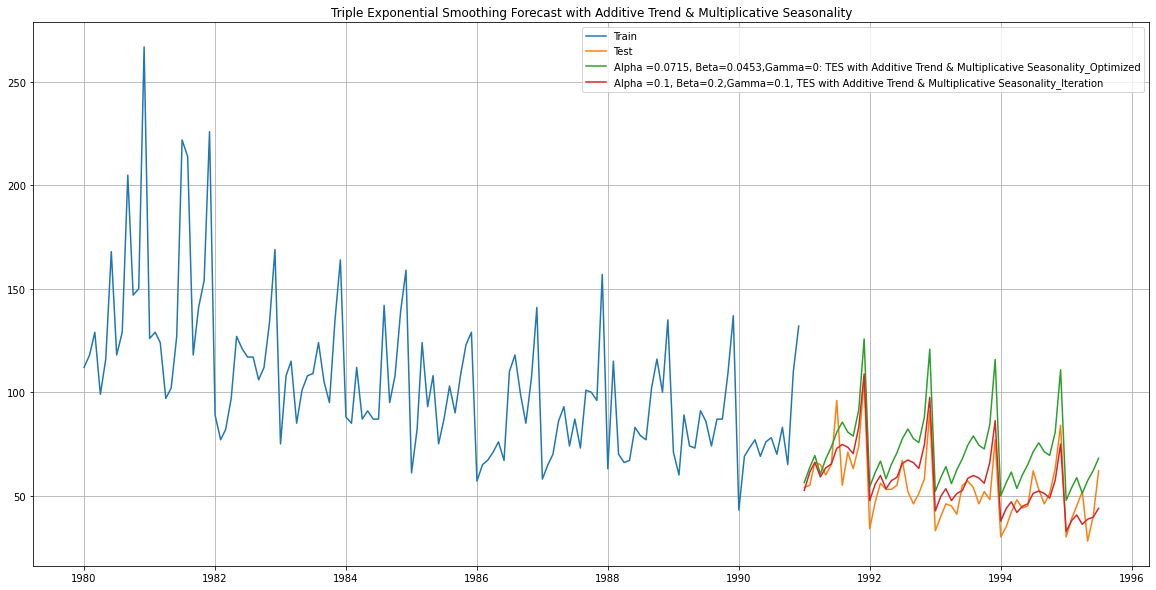

In [394]:
plt.figure(figsize=(20,10))
plt.plot(df_train.Rose, label='Train')
plt.plot(df_test.Rose, label='Test')
plt.plot(df_test.forecast_tes_add_mult_optimized, 
         label='Alpha =0.0715, Beta=0.0453,Gamma=0: TES with Additive Trend & Multiplicative Seasonality_Optimized')
plt.plot(df_test.forecast_tes_add_mult, 
         label='Alpha =0.1, Beta=0.2,Gamma=0.1, TES with Additive Trend & Multiplicative Seasonality_Iteration')
plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing Forecast with Additive Trend & Multiplicative Seasonality');

In [395]:
rmse_tes_add_mult = mean_squared_error(df_test.Rose,df_test.forecast_tes_add_mult,squared=False)
rmse_tes_add_mult

9.26604729065551

## Model 8: Triple Exponential Smoothing with Multiplicative Trend & Multiplicative Seasonality

In [396]:
tes_mult_mult_optimized = ExponentialSmoothing(df_train.Rose,initialization_method='estimated',trend='multiplicative',
                                              seasonal='multiplicative').fit(optimized=True)

In [397]:
tes_mult_mult_optimized.params_formatted

name       param  optimized
smoothing_level     alpha    0.055093       True
smoothing_trend      beta    0.031634       True
smoothing_seasonal  gamma    0.000334       True
initial_level         l.0  162.244484       True
initial_trend         b.0    0.992416       True
initial_seasons.0     s.0    0.699390       True
initial_seasons.1     s.1    0.793806       True
initial_seasons.2     s.2    0.868934       True
initial_seasons.3     s.3    0.758653       True
initial_seasons.4     s.4    0.853775       True
initial_seasons.5     s.5    0.928257       True
initial_seasons.6     s.6    1.020034       True
initial_seasons.7     s.7    1.087673       True
initial_seasons.8     s.8    1.030689       True
initial_seasons.9     s.9    1.007614       True
initial_seasons.10   s.10    1.176261       True
initial_seasons.11   s.11    1.619163       True

In [398]:
df_test['forecast_tes_mult_mult_optimized'] = tes_mult_mult_optimized.forecast(steps=len(df_test))

In [399]:
df_test[['Rose','forecast_tes_mult_mult_optimized']].head(10).round(1)

Rose  forecast_tes_mult_mult_optimized
YearMonth                                         
1991-01-01  54.0                              55.7
1991-02-01  55.0                              63.0
1991-03-01  66.0                              68.7
1991-04-01  65.0                              59.8
1991-05-01  60.0                              67.1
1991-06-01  65.0                              72.7
1991-07-01  96.0                              79.7
1991-08-01  55.0                              84.7
1991-09-01  71.0                              80.0
1991-10-01  63.0                              78.0

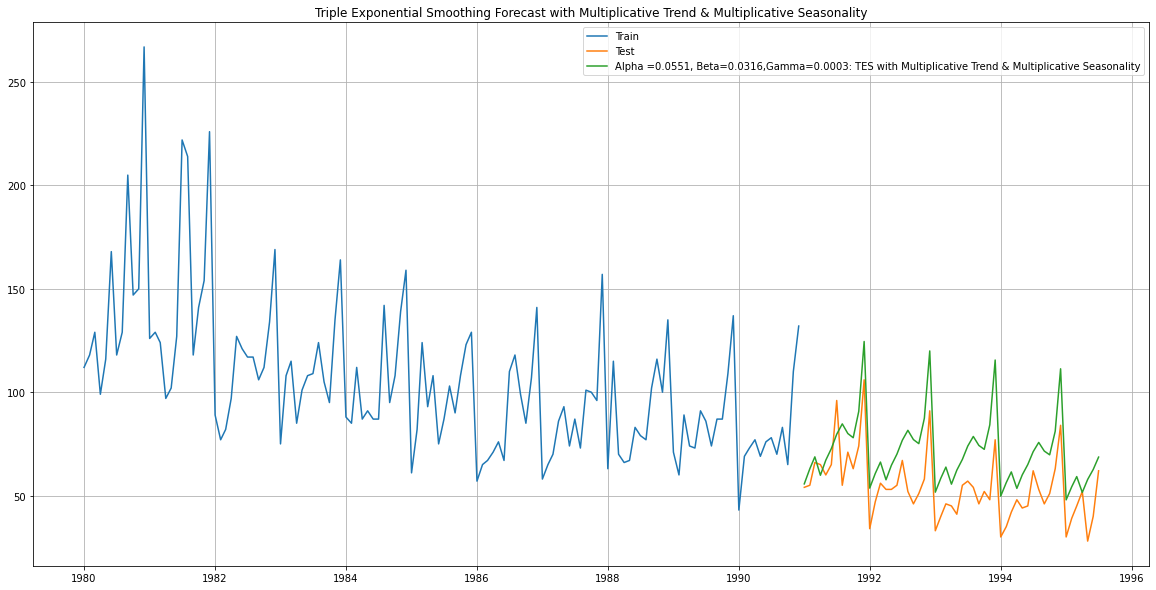

In [400]:
plt.plot(df_train.Rose, label='Train')
plt.plot(df_test.Rose, label='Test')
plt.plot(df_test.forecast_tes_mult_mult_optimized, 
         label='Alpha =0.0551, Beta=0.0316,Gamma=0.0003: TES with Multiplicative Trend & Multiplicative Seasonality')
plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing Forecast with Multiplicative Trend & Multiplicative Seasonality');

In [401]:
rmse_tes_mult_mult_optimized = mean_squared_error(df_test.Rose,df_test.forecast_tes_mult_mult_optimized,squared=False)
rmse_tes_mult_mult_optimized

19.54007445240637

### Optimizing Alpha, Beta and Gamma based on Test RMSE

In [402]:
results_tes_mult_mult = pd.DataFrame({'Alpha_Values':[],'Beta Values':[],'Gamma Values':[],'RMSE_Train':[],'RMSE_Test': []})
results_tes_mult_mult

Empty DataFrame
Columns: [Alpha_Values, Beta Values, Gamma Values, RMSE_Train, RMSE_Test]
Index: []

In [403]:
for i in np.arange(0.1,1,0.1):
    for j in np.arange(0.1,1,0.1):
        for k in np.arange(0.1,1,0.1):
            tes_mult_mult_iteration=ExponentialSmoothing(df_train.Rose,initialization_method='estimated',trend='multiplicative',
            seasonal='multiplicative').fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            rmse_train = mean_squared_error(df_train.Rose,tes_mult_mult_iteration.fittedvalues,squared=False)
            rmse_test = mean_squared_error(df_test.Rose,tes_mult_mult_iteration.forecast(steps=len(df_test)),squared=False)
            results_tes_mult_mult=results_tes_mult_mult.append({'Alpha_Values':i, 'Beta Values':j,'Gamma Values':k,'RMSE_Train':rmse_train 
                                      ,'RMSE_Test':rmse_test}, ignore_index=True)
results_tes_mult_mult

Alpha_Values  Beta Values  Gamma Values    RMSE_Train      RMSE_Test
0             0.1          0.1           0.1  1.952408e+01   1.354380e+01
1             0.1          0.1           0.2  2.007419e+01   1.339594e+01
2             0.1          0.1           0.3  2.073699e+01   1.356745e+01
3             0.1          0.1           0.4  2.149759e+01   1.394279e+01
4             0.1          0.1           0.5  2.236207e+01   1.446380e+01
..            ...          ...           ...           ...            ...
724           0.9          0.9           0.5  2.308936e+02   2.169365e+33
725           0.9          0.9           0.6  3.079798e+02   6.022883e+70
726           0.9          0.9           0.7  2.431277e+14   7.050911e+28
727           0.9          0.9           0.8  3.575037e+11  1.220062e+108
728           0.9          0.9           0.9  8.855529e+27   6.383171e+28

[729 rows x 5 columns]

In [404]:
results_tes_mult_mult.sort_values(by='RMSE_Test').head()

Alpha_Values  Beta Values  Gamma Values  RMSE_Train  RMSE_Test
136           0.2          0.7           0.2   24.042290   9.053203
176           0.3          0.2           0.6   26.940472  10.652112
9             0.1          0.2           0.1   19.647823  10.912264
10            0.1          0.2           0.2   20.172839  11.258336
11            0.1          0.2           0.3   20.828952  11.717807

### Final TES Model with Additive Multiplicative & Multiplicative Seasonality

In [405]:
tes_mult_mult= ExponentialSmoothing(df_train.Rose,initialization_method='estimated',trend='multiplicative',seasonal='multiplicative').fit(
    smoothing_level=0.2,smoothing_trend=0.7,smoothing_seasonal=0.2, optimized=False,use_brute=True)

In [406]:
tes_mult_mult.params_formatted

name       param  optimized
smoothing_level     alpha    0.200000      False
smoothing_trend      beta    0.700000      False
smoothing_seasonal  gamma    0.200000      False
initial_level         l.0  145.275000      False
initial_trend         b.0    1.005262      False
initial_seasons.0     s.0    0.755722      False
initial_seasons.1     s.1    0.804174      False
initial_seasons.2     s.2    0.890513      False
initial_seasons.3     s.3    0.759642      False
initial_seasons.4     s.4    0.880678      False
initial_seasons.5     s.5    0.925536      False
initial_seasons.6     s.6    1.089060      False
initial_seasons.7     s.7    1.135386      False
initial_seasons.8     s.8    1.030302      False
initial_seasons.9     s.9    0.965857      False
initial_seasons.10   s.10    1.137884      False
initial_seasons.11   s.11    1.625247      False

In [407]:
df_test['forecast_tes_mult_mult'] = tes_mult_mult.forecast(steps=len(df_test))

In [408]:
df_test[['Rose','forecast_tes_mult_mult_optimized','forecast_tes_mult_mult']].head(10).round(1)

Rose  forecast_tes_mult_mult_optimized  forecast_tes_mult_mult
YearMonth                                                                 
1991-01-01  54.0                              55.7                    49.0
1991-02-01  55.0                              63.0                    60.8
1991-03-01  66.0                              68.7                    64.5
1991-04-01  65.0                              59.8                    59.9
1991-05-01  60.0                              67.1                    60.0
1991-06-01  65.0                              72.7                    61.4
1991-07-01  96.0                              79.7                    66.4
1991-08-01  55.0                              84.7                    66.0
1991-09-01  71.0                              80.0                    72.7
1991-10-01  63.0                              78.0                    70.9

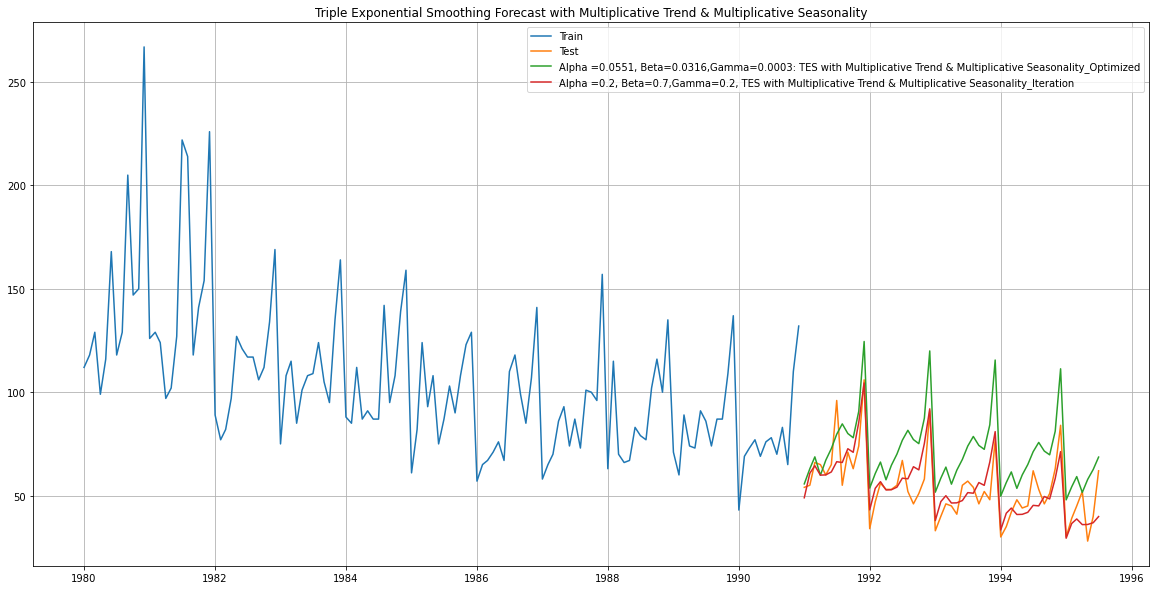

In [409]:
plt.figure(figsize=(20,10))
plt.plot(df_train.Rose, label='Train')
plt.plot(df_test.Rose, label='Test')
plt.plot(df_test.forecast_tes_mult_mult_optimized, 
         label='Alpha =0.0551, Beta=0.0316,Gamma=0.0003: TES with Multiplicative Trend & Multiplicative Seasonality_Optimized')
plt.plot(df_test.forecast_tes_mult_mult, 
         label='Alpha =0.2, Beta=0.7,Gamma=0.2, TES with Multiplicative Trend & Multiplicative Seasonality_Iteration')
plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing Forecast with Multiplicative Trend & Multiplicative Seasonality');

In [410]:
rmse_tes_mult_mult = mean_squared_error(df_test.Rose,df_test.forecast_tes_mult_mult,squared=False)
rmse_tes_mult_mult

9.053203182678818

## Model 9: Triple Exponential Smoothing with Multiplicative Trend & Additive Seasonality

In [411]:
tes_mult_add_optimized = ExponentialSmoothing(df_train.Rose,initialization_method='estimated',trend='multiplicative',
                                              seasonal='additive').fit(optimized=True)

In [412]:
tes_mult_add_optimized.params_formatted

name       param  optimized
smoothing_level     alpha    0.013450       True
smoothing_trend      beta    0.000060       True
smoothing_seasonal  gamma    0.000430       True
initial_level         l.0  110.764406       True
initial_trend         b.0    0.990915       True
initial_seasons.0     s.0    9.334313       True
initial_seasons.1     s.1   21.755324       True
initial_seasons.2     s.2   29.808739       True
initial_seasons.3     s.3   19.219947       True
initial_seasons.4     s.4   28.081337       True
initial_seasons.5     s.5   33.573078       True
initial_seasons.6     s.6   43.514921       True
initial_seasons.7     s.7   49.635305       True
initial_seasons.8     s.8   45.656155       True
initial_seasons.9     s.9   43.763027       True
initial_seasons.10   s.10   61.862909       True
initial_seasons.11   s.11  104.143772       True

In [413]:
df_test['forecast_tes_mult_add_optimized'] = tes_mult_add_optimized.forecast(steps=len(df_test))

In [414]:
df_test[['Rose','forecast_tes_mult_add_optimized']].head(10).round(1)

Rose  forecast_tes_mult_add_optimized
YearMonth                                        
1991-01-01  54.0                             43.0
1991-02-01  55.0                             55.1
1991-03-01  66.0                             62.9
1991-04-01  65.0                             52.0
1991-05-01  60.0                             60.6
1991-06-01  65.0                             65.8
1991-07-01  96.0                             75.4
1991-08-01  55.0                             81.2
1991-09-01  71.0                             77.0
1991-10-01  63.0                             74.8

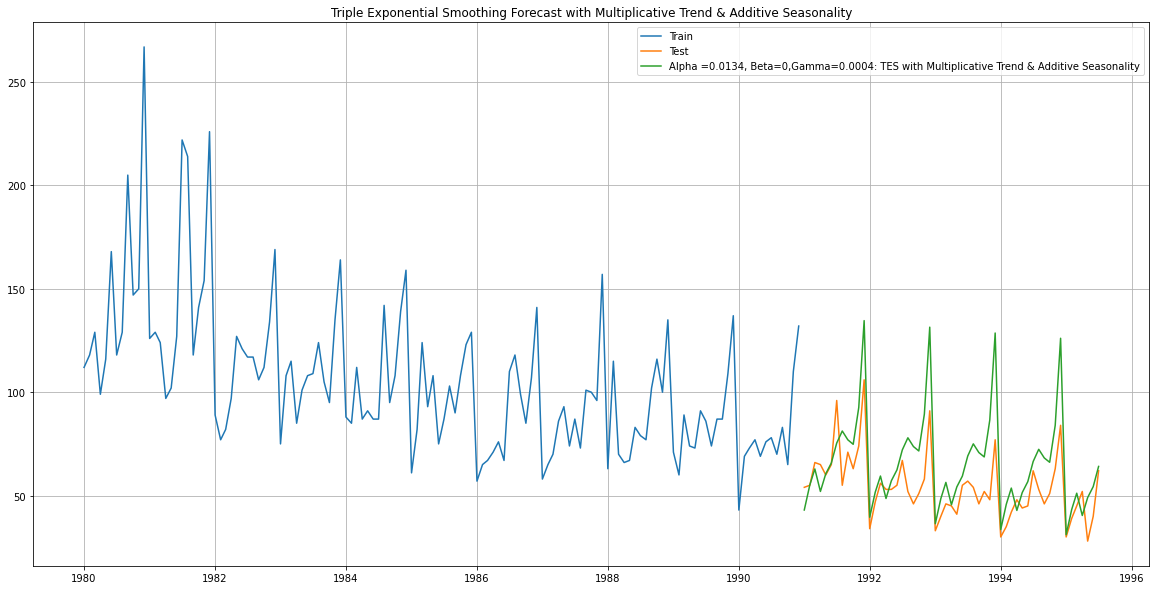

In [415]:
plt.plot(df_train.Rose, label='Train')
plt.plot(df_test.Rose, label='Test')
plt.plot(df_test.forecast_tes_mult_add_optimized, 
         label='Alpha =0.0134, Beta=0,Gamma=0.0004: TES with Multiplicative Trend & Additive Seasonality')
plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing Forecast with Multiplicative Trend & Additive Seasonality');

In [416]:
rmse_tes_mult_add_optimized = mean_squared_error(df_test.Rose,df_test.forecast_tes_mult_add_optimized,squared=False)
rmse_tes_mult_add_optimized

18.149305635912246

### Optimizing Alpha, Beta and Gamma based on Test RMSE

In [417]:
results_tes_mult_add = pd.DataFrame({'Alpha_Values':[],'Beta Values':[],'Gamma Values':[],'RMSE_Train':[],'RMSE_Test': []})
results_tes_mult_add

Empty DataFrame
Columns: [Alpha_Values, Beta Values, Gamma Values, RMSE_Train, RMSE_Test]
Index: []

In [418]:
for i in np.arange(0.1,1,0.1):
    for j in np.arange(0.1,1,0.1):
        for k in np.arange(0.1,1,0.1):
            tes_mult_add_iteration=ExponentialSmoothing(df_train.Rose,initialization_method='estimated',trend='multiplicative',
            seasonal='additive').fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            rmse_train = mean_squared_error(df_train.Rose,tes_mult_add_iteration.fittedvalues,squared=False)
            rmse_test = mean_squared_error(df_test.Rose,tes_mult_add_iteration.forecast(steps=len(df_test)),squared=False)
            results_tes_mult_add=results_tes_mult_add.append({'Alpha_Values':i, 'Beta Values':j,'Gamma Values':k,'RMSE_Train':rmse_train 
                                      ,'RMSE_Test':rmse_test}, ignore_index=True)
results_tes_mult_add

Alpha_Values  Beta Values  Gamma Values    RMSE_Train      RMSE_Test
0             0.1          0.1           0.1  2.128403e+01   1.494919e+01
1             0.1          0.1           0.2  2.133755e+01   1.427996e+01
2             0.1          0.1           0.3  2.168075e+01   1.452275e+01
3             0.1          0.1           0.4  2.219971e+01   1.491728e+01
4             0.1          0.1           0.5  2.285014e+01   1.533380e+01
..            ...          ...           ...           ...            ...
724           0.9          0.9           0.5  2.831110e+03   2.616841e+54
725           0.9          0.9           0.6  1.921504e+06   2.204551e+83
726           0.9          0.9           0.7  3.789742e+12  2.339879e+135
727           0.9          0.9           0.8  3.173399e+24   8.769175e+24
728           0.9          0.9           0.9  1.746928e+43   4.871306e+43

[729 rows x 5 columns]

In [419]:
results_tes_mult_add.sort_values(by='RMSE_Test').head()

Alpha_Values  Beta Values  Gamma Values  RMSE_Train  RMSE_Test
64           0.1          0.8           0.2   23.635989  12.157265
37           0.1          0.5           0.2   22.408154  12.223765
55           0.1          0.7           0.2   23.272614  12.255784
28           0.1          0.4           0.2   21.982924  12.270506
10           0.1          0.2           0.2   21.514299  12.426141

### Final TES Model with Additive Multiplicative & Additive Seasonality

In [420]:
tes_mult_add= ExponentialSmoothing(df_train.Rose,initialization_method='estimated',trend='multiplicative',seasonal='additive').fit(
    smoothing_level=0.1,smoothing_trend=0.8,smoothing_seasonal=0.2, optimized=False,use_brute=True)

In [421]:
tes_mult_add.params_formatted

name       param  optimized
smoothing_level     alpha    0.100000      False
smoothing_trend      beta    0.800000      False
smoothing_seasonal  gamma    0.200000      False
initial_level         l.0  145.275000      False
initial_trend         b.0    1.005262      False
initial_seasons.0     s.0  -30.484375      False
initial_seasons.1     s.1  -25.046875      False
initial_seasons.2     s.2  -15.536458      False
initial_seasons.3     s.3  -30.734375      False
initial_seasons.4     s.4  -16.463542      False
initial_seasons.5     s.5   -9.723958      False
initial_seasons.6     s.6   12.442708      False
initial_seasons.7     s.7   17.536458      False
initial_seasons.8     s.8    5.557292      False
initial_seasons.9     s.9   -3.890625      False
initial_seasons.10   s.10   15.994792      False
initial_seasons.11   s.11   80.348958      False

In [422]:
df_test['forecast_tes_mult_add'] = tes_mult_add.forecast(steps=len(df_test))

In [423]:
df_test[['Rose','forecast_tes_mult_add_optimized','forecast_tes_mult_add']].head(10).round(1)

Rose  forecast_tes_mult_add_optimized  forecast_tes_mult_add
YearMonth                                                               
1991-01-01  54.0                             43.0                   45.4
1991-02-01  55.0                             55.1                   60.1
1991-03-01  66.0                             62.9                   65.3
1991-04-01  65.0                             52.0                   57.6
1991-05-01  60.0                             60.6                   59.6
1991-06-01  65.0                             65.8                   61.9
1991-07-01  96.0                             75.4                   68.3
1991-08-01  55.0                             81.2                   68.4
1991-09-01  71.0                             77.0                   72.5
1991-10-01  63.0                             74.8                   69.7

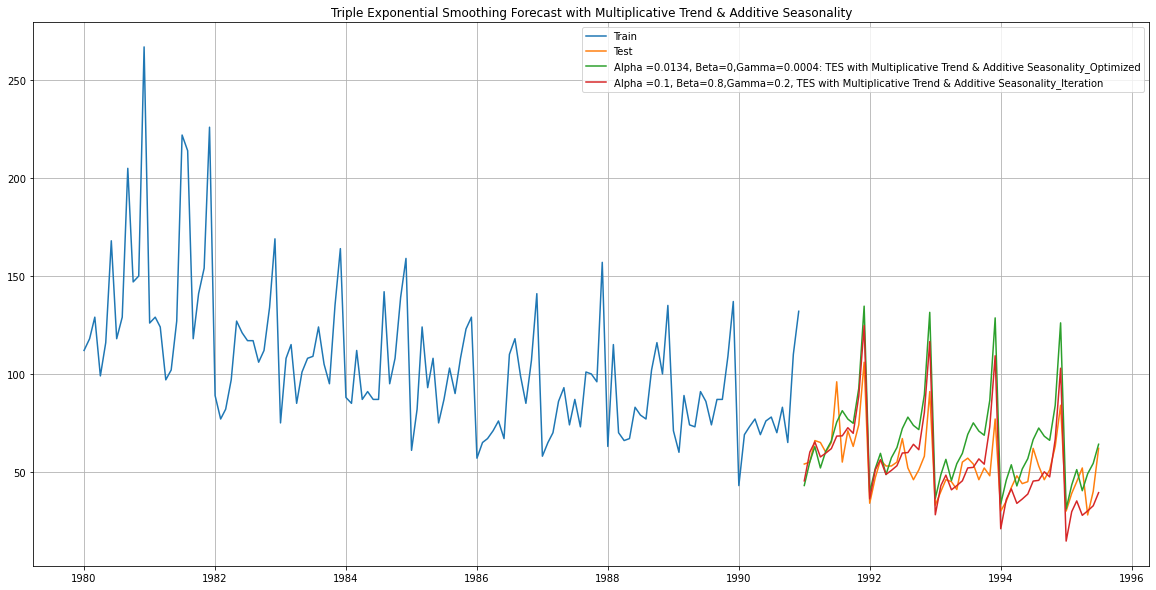

In [424]:
plt.figure(figsize=(20,10))
plt.plot(df_train.Rose, label='Train')
plt.plot(df_test.Rose, label='Test')
plt.plot(df_test.forecast_tes_mult_add_optimized, 
         label='Alpha =0.0134, Beta=0,Gamma=0.0004: TES with Multiplicative Trend & Additive Seasonality_Optimized')
plt.plot(df_test.forecast_tes_mult_add, 
         label='Alpha =0.1, Beta=0.8,Gamma=0.2, TES with Multiplicative Trend & Additive Seasonality_Iteration')
plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing Forecast with Multiplicative Trend & Additive Seasonality');

In [425]:
rmse_tes_mult_add = mean_squared_error(df_test.Rose,df_test.forecast_tes_mult_add,squared=False)
rmse_tes_mult_add

12.157264854831993

## Q5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

## Plot the Time Series to understand the behaviour of the data.

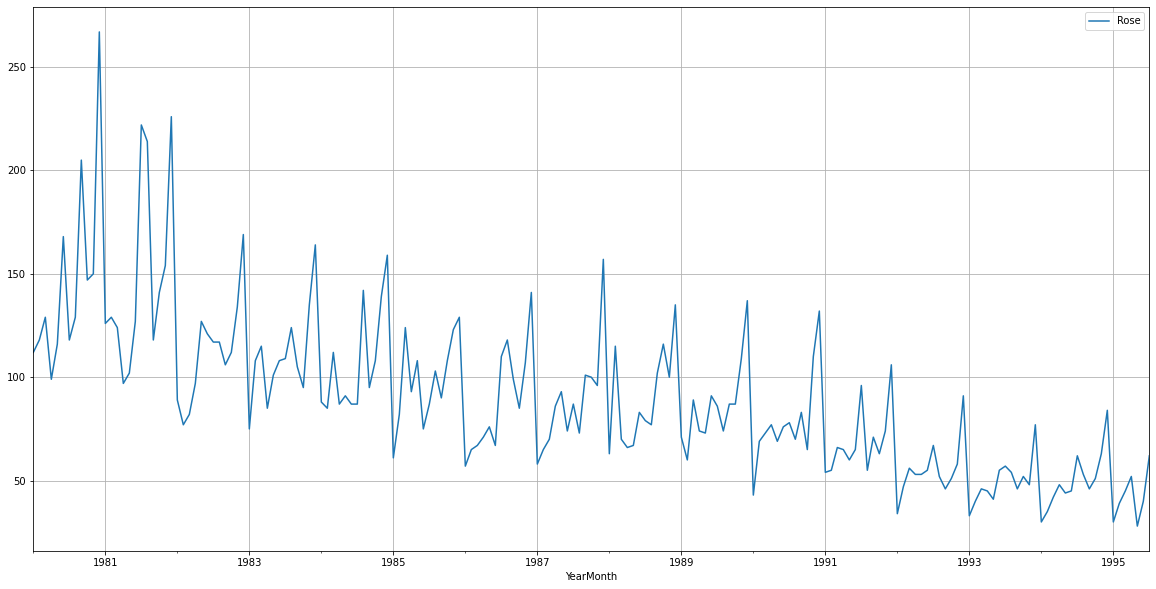

In [426]:
df.plot()
plt.grid()

### Check for Stationarity of Whole Time Series

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:
* $H_0$ : The Time Series has a unit root and is thus non-stationary.
* $H_1$ : The Time Series does not have a unit root and is thus stationary.

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the $\alpha$ value.

In [427]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

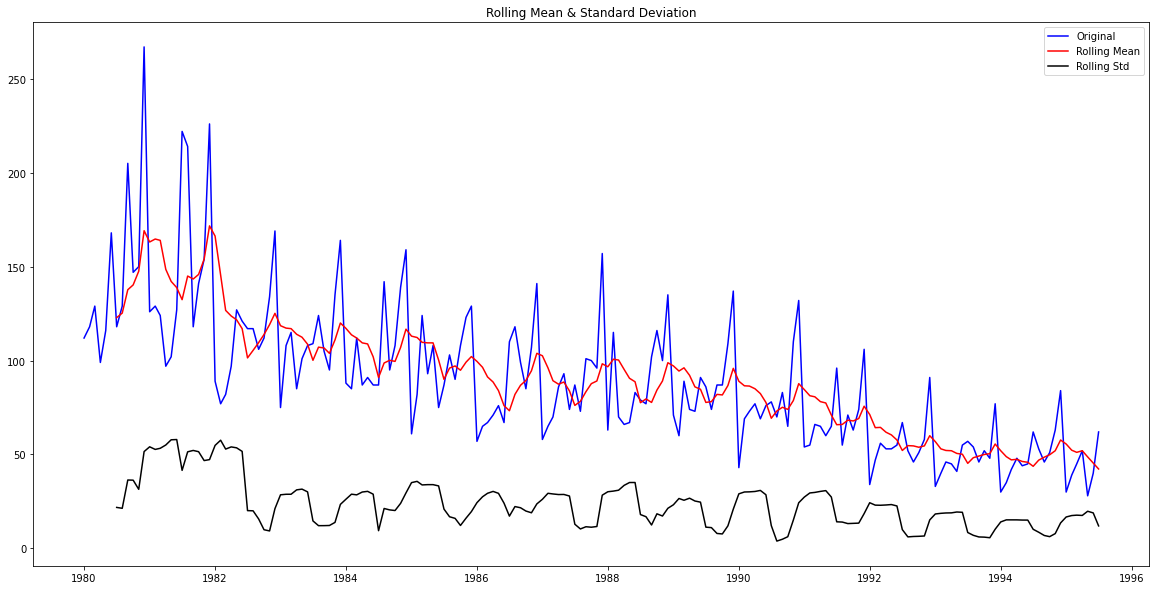

Results of Dickey-Fuller Test:
Test Statistic                  -1.887760
p-value                          0.337841
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [428]:
test_stationarity(df)

We see that at 5% significant level the Time Series is non-stationary.

Let us take one level of differencing to see whether the series becomes stationary.

#### On differencing Dataset

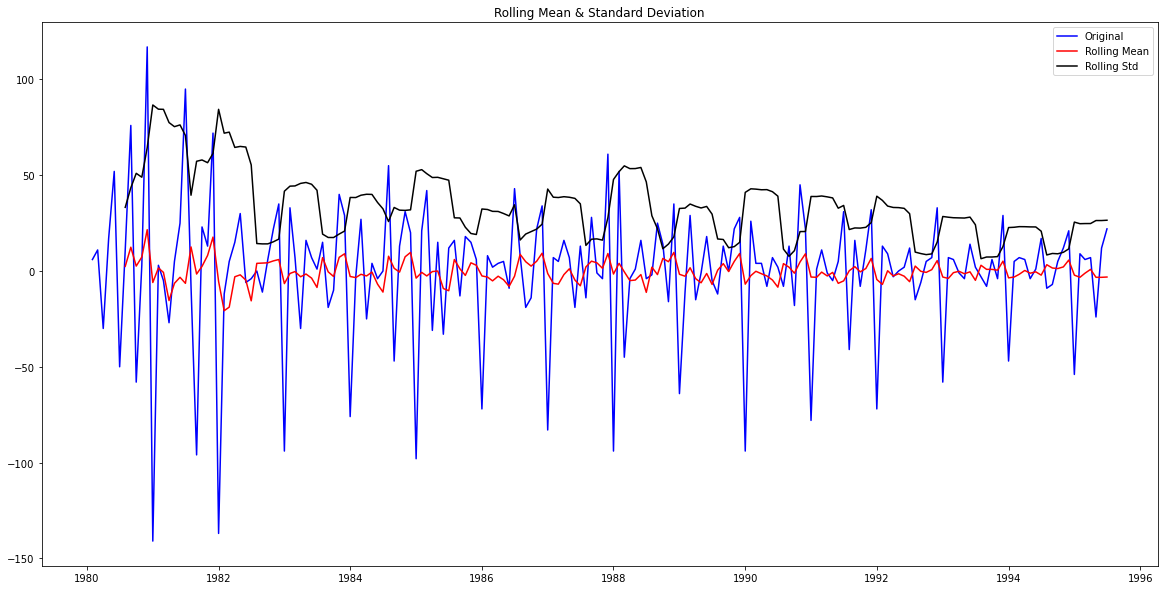

Results of Dickey-Fuller Test:
Test Statistic                -8.028518e+00
p-value                        1.987167e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [429]:
test_stationarity(df.diff().dropna())

Now, let us go ahead and plot the stationary series.

### Plotting Differenced Time Series

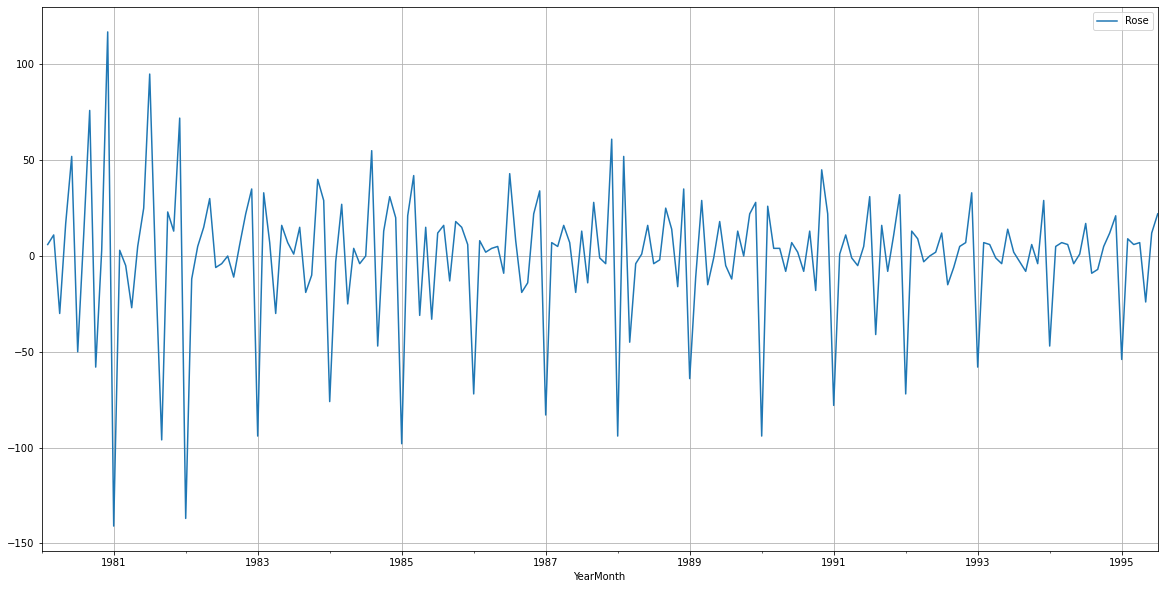

In [430]:
df.diff().plot()
plt.grid()

## Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

In [431]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

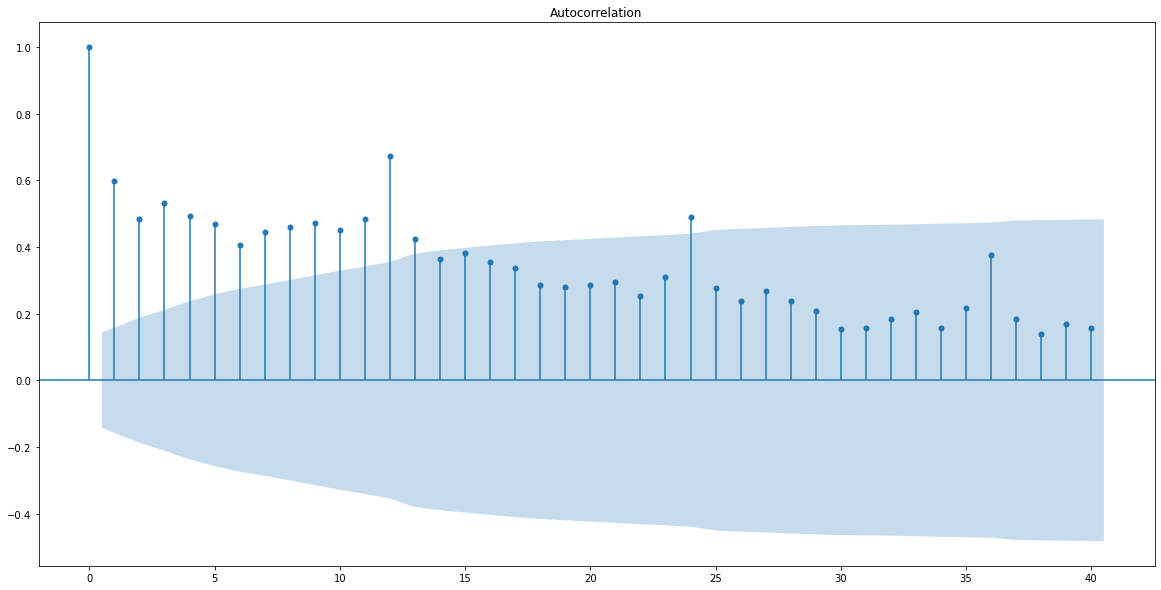

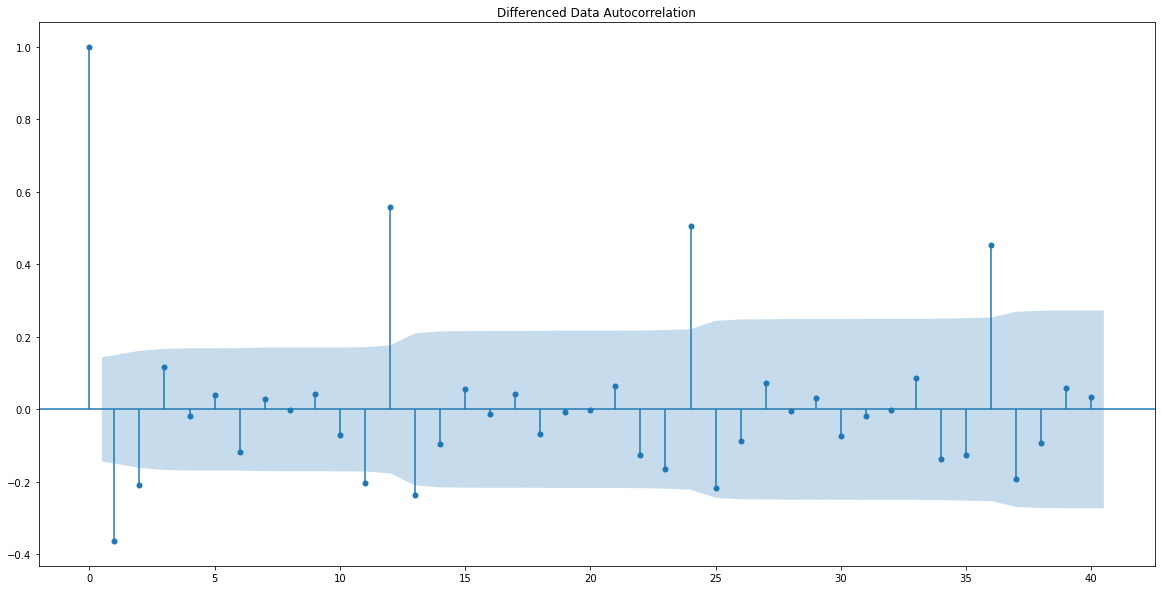

In [432]:
plot_acf(df,alpha=0.05,lags=40);
plot_acf(df.diff().dropna(),alpha=0.05,lags=40,title='Differenced Data Autocorrelation');

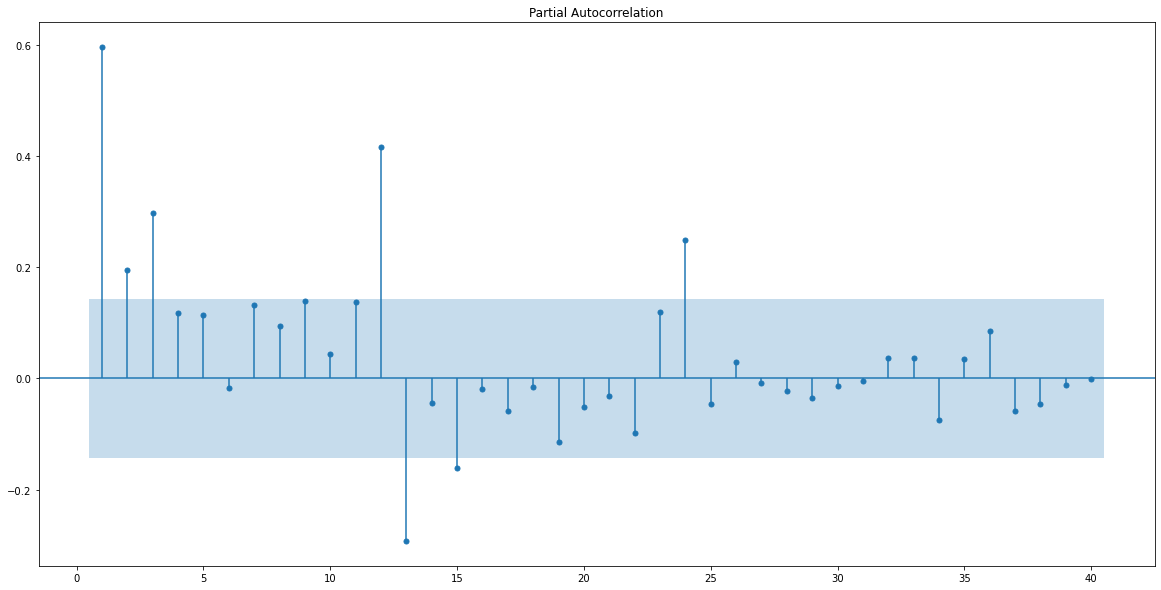

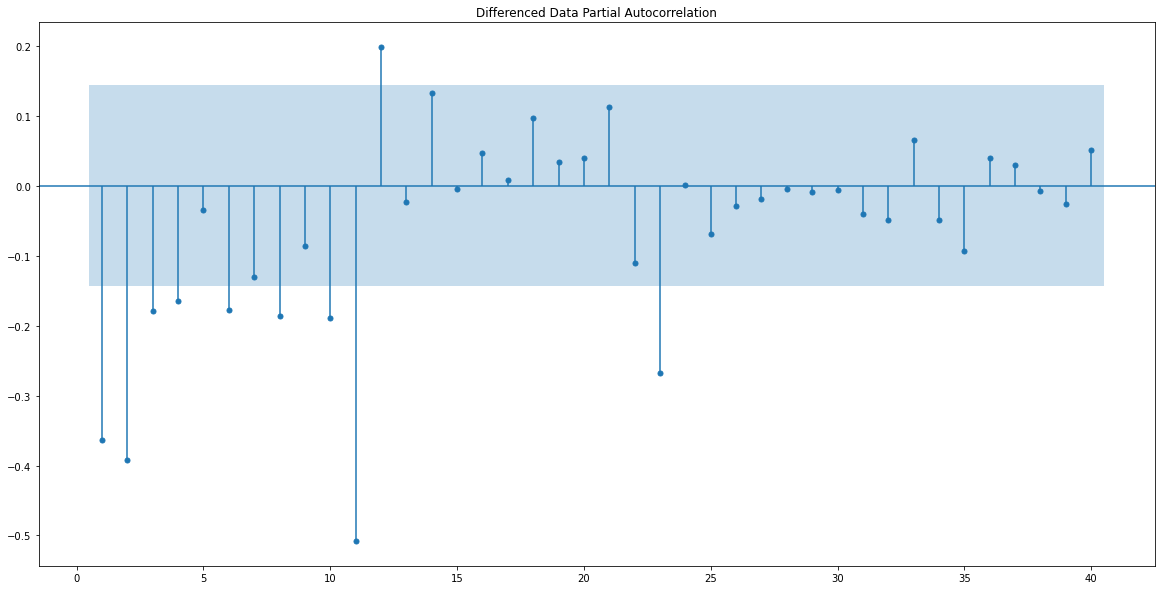

In [433]:
plot_pacf(df,zero=False,alpha=0.05,method='ywmle',lags=40);
plot_pacf(df.diff().dropna(),zero=False,alpha=0.05,method='ywmle',lags=40,
          title='Differenced Data Partial Autocorrelation');

### Check for Stationarity of Train Dataset

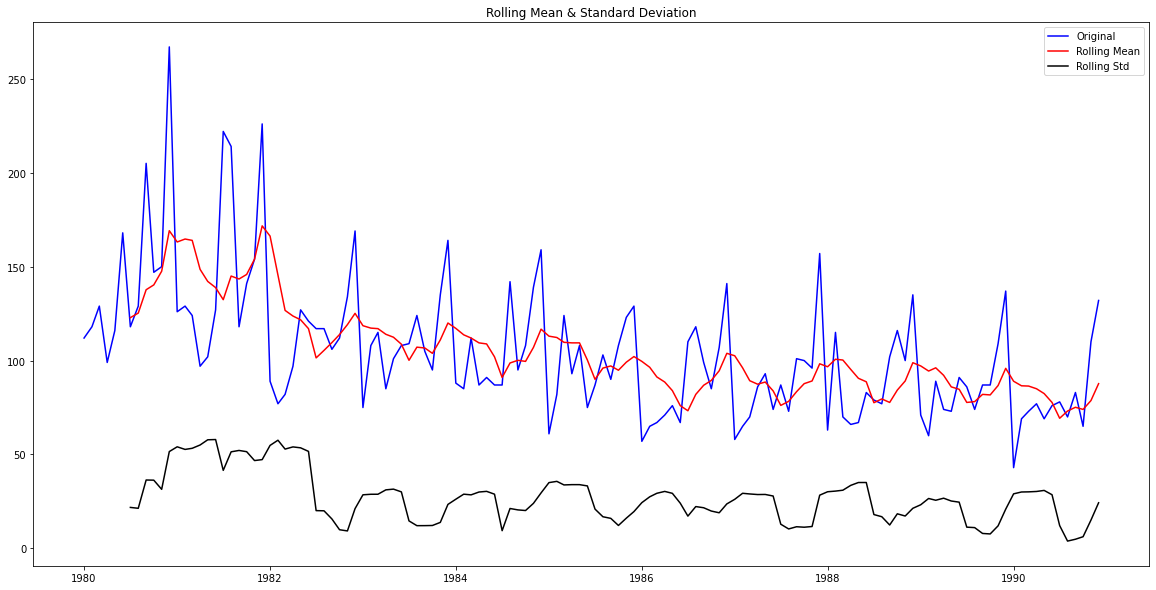

Results of Dickey-Fuller Test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [434]:
test_stationarity(df_train.Rose)

The training data is non-stationary at 95% confidence level. Let us take a first level of differencing to stationarize the Time Series.

#### On differencing Train Dataset

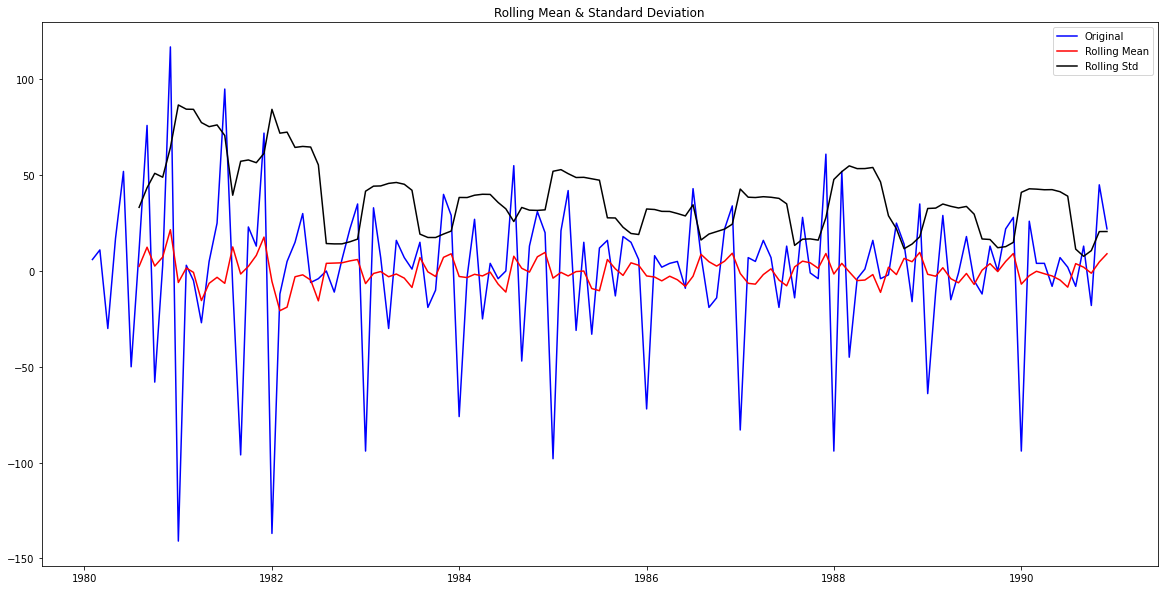

Results of Dickey-Fuller Test:
Test Statistic                -6.592372e+00
p-value                        7.061944e-09
#Lags Used                     1.200000e+01
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



In [435]:
test_stationarity(df_train.Rose.diff().dropna())

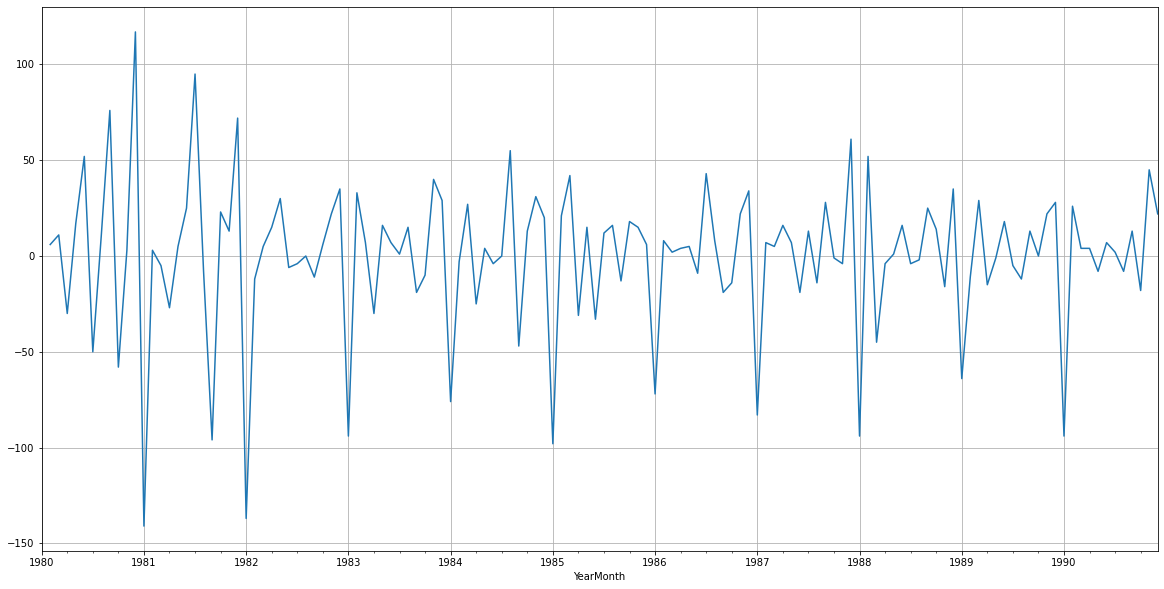

In [436]:
df_train.Rose.diff().plot()
plt.grid()

## Q6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

## ARIMA Automated Version

In [437]:
import itertools
p=q=range(0,4)
d=range(1,2)
pdq=list(itertools.product(p,d,q))
pdq

[(0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3)]

In [438]:
from statsmodels.tsa.arima.model import ARIMA

In [439]:
ARIMA_AIC=pd.DataFrame(columns=['param','AIC'])

In [440]:
for param in pdq:
    ARIMA_model=ARIMA(df_train.Rose,order=param).fit()
    ARIMA_AIC=ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
ARIMA_AIC

param          AIC
0   (0, 1, 0)  1333.154673
1   (0, 1, 1)  1282.309832
2   (0, 1, 2)  1279.671529
3   (0, 1, 3)  1280.545376
4   (1, 1, 0)  1317.350311
5   (1, 1, 1)  1280.574230
6   (1, 1, 2)  1279.870723
7   (1, 1, 3)  1281.870722
8   (2, 1, 0)  1298.611034
9   (2, 1, 1)  1281.507862
10  (2, 1, 2)  1281.870722
11  (2, 1, 3)  1274.695412
12  (3, 1, 0)  1297.481092
13  (3, 1, 1)  1282.419278
14  (3, 1, 2)  1283.720741
15  (3, 1, 3)  1278.667917

In [453]:
ARIMA_AIC.sort_values(by='AIC').head()

param          AIC
11  (2, 1, 3)  1274.695412
15  (3, 1, 3)  1278.667917
2   (0, 1, 2)  1279.671529
6   (1, 1, 2)  1279.870723
3   (0, 1, 3)  1280.545376

In [442]:
ARIMA_auto=ARIMA(df_train.Rose,order=(2, 1, 3)).fit()
ARIMA_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -631.348
Date:                Sun, 16 Jan 2022   AIC                           1274.695
Time:                        22:59:41   BIC                           1291.947
Sample:                    01-01-1980   HQIC                          1281.705
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6783      0.084    -19.999      0.000      -1.843      -1.514
ar.L2         -0.7291      0.084     -8.687      0.000      -0.894      -0.565
ma.L1          1.0446      0.618      1.691      0.091      -0.166       2.255
ma.L2         -0.7720      0.132     -5.858      0.000      -1.030      -0.514
ma.L3         -0.9045      0.560     -1.616      0.106      -2.002       0.192
sigma2       860.3101    519.823      1.655      0.098    -158.525    1879.145
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                24.51
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               0.40   Skew:                             0.71
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

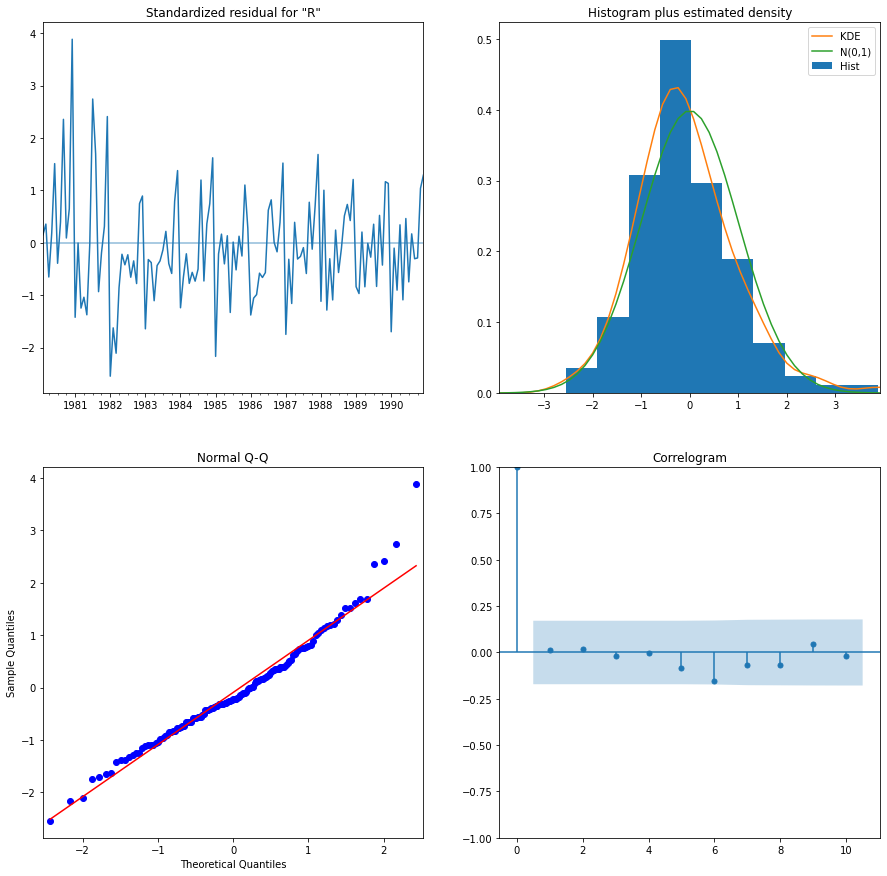

In [443]:
ARIMA_auto.plot_diagnostics(figsize=(15,15));

### Forecast on Test Dataset

In [444]:
df_test['forecast_ARIMA_auto']=ARIMA_auto.forecast(len(df_test))

In [445]:
df_test[['Rose','forecast_ARIMA_auto']].head(10).round(1)

Rose  forecast_ARIMA_auto
YearMonth                            
1991-01-01  54.0                 85.6
1991-02-01  55.0                 90.5
1991-03-01  66.0                 82.0
1991-04-01  65.0                 92.7
1991-05-01  60.0                 80.9
1991-06-01  65.0                 92.9
1991-07-01  96.0                 81.4
1991-08-01  55.0                 92.0
1991-09-01  71.0                 82.6
1991-10-01  63.0                 90.6

In [446]:
from sklearn.metrics import mean_squared_error

In [447]:
rmse_ARIMA_auto=mean_squared_error(df_test.Rose,df_test.forecast_ARIMA_auto,squared=False)
rmse_ARIMA_auto

36.400389385948856

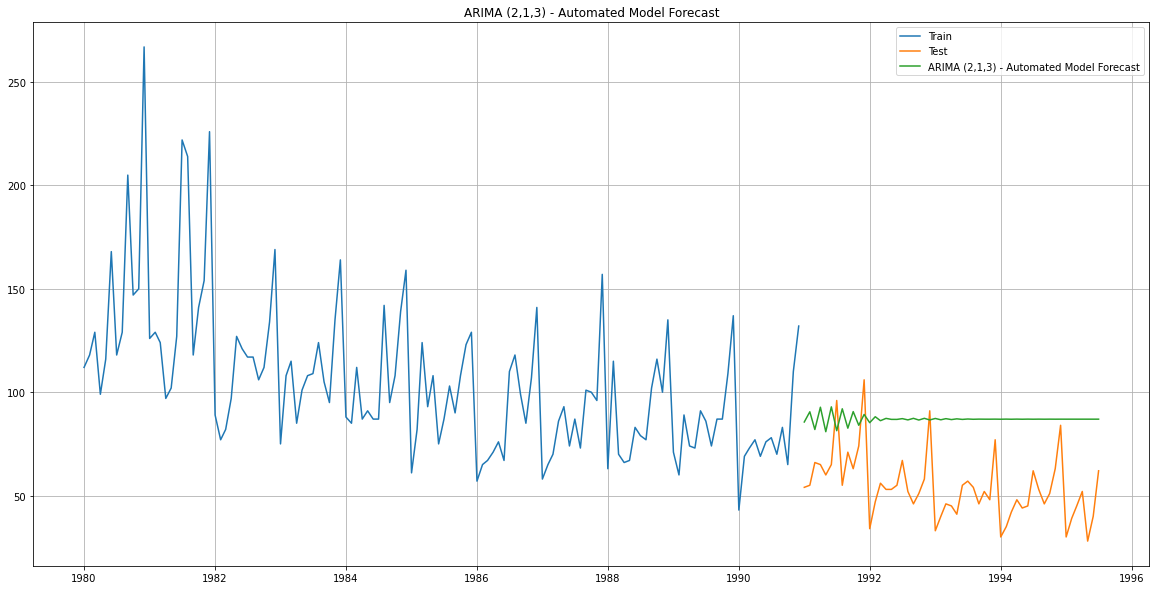

In [448]:
plt.figure(figsize=(20,10))
plt.plot(df_train.Rose, label='Train')
plt.plot(df_test.Rose, label='Test')
plt.plot(df_test.forecast_ARIMA_auto, 
         label='ARIMA (2,1,3) - Automated Model Forecast')
plt.legend(loc='best')
plt.grid()
plt.title('ARIMA (2,1,3) - Automated Model Forecast');

## SARIMA - Automated Version

In [196]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,2)
pdq=list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
display(pdq)
display(PDQ)

[(0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3)]

[(0, 0, 0, 6),
 (0, 0, 1, 6),
 (0, 0, 2, 6),
 (0, 0, 3, 6),
 (0, 1, 0, 6),
 (0, 1, 1, 6),
 (0, 1, 2, 6),
 (0, 1, 3, 6),
 (1, 0, 0, 6),
 (1, 0, 1, 6),
 (1, 0, 2, 6),
 (1, 0, 3, 6),
 (1, 1, 0, 6),
 (1, 1, 1, 6),
 (1, 1, 2, 6),
 (1, 1, 3, 6),
 (2, 0, 0, 6),
 (2, 0, 1, 6),
 (2, 0, 2, 6),
 (2, 0, 3, 6),
 (2, 1, 0, 6),
 (2, 1, 1, 6),
 (2, 1, 2, 6),
 (2, 1, 3, 6),
 (3, 0, 0, 6),
 (3, 0, 1, 6),
 (3, 0, 2, 6),
 (3, 0, 3, 6),
 (3, 1, 0, 6),
 (3, 1, 1, 6),
 (3, 1, 2, 6),
 (3, 1, 3, 6)]

In [197]:
SARIMA_AIC = pd.DataFrame(columns=['param','param_seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, param_seasonal, AIC]
Index: []

In [198]:
import statsmodels.api as sm

In [199]:
for i in pdq:
    for j in PDQ:
        SARIMA_model=sm.tsa.statespace.SARIMAX(df_train.Rose,order=i,seasonal_order=j,
                                              enforce_stationarity=False,enforce_invertibility=False).fit(maxiter=1000)
        SARIMA_AIC = SARIMA_AIC.append({'param':i,'param_seasonal':j ,'AIC': SARIMA_model.aic}, 
                                       ignore_index=True)
SARIMA_AIC       

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

param param_seasonal          AIC
0    (0, 1, 0)   (0, 0, 0, 6)  1323.965788
1    (0, 1, 0)   (0, 0, 1, 6)  1264.499626
2    (0, 1, 0)   (0, 0, 2, 6)  1144.707747
3    (0, 1, 0)   (0, 0, 3, 6)  1081.271383
4    (0, 1, 0)   (0, 1, 0, 6)  1362.652526
..         ...            ...          ...
507  (3, 1, 3)   (3, 0, 3, 6)   954.466564
508  (3, 1, 3)   (3, 1, 0, 6)   896.092157
509  (3, 1, 3)   (3, 1, 1, 6)   897.929692
510  (3, 1, 3)   (3, 1, 2, 6)   899.706492
511  (3, 1, 3)   (3, 1, 3, 6)   893.125640

[512 rows x 3 columns]

In [454]:
SARIMA_AIC.sort_values(by='AIC').head()

param param_seasonal         AIC
375  (2, 1, 3)   (2, 1, 3, 6)  889.189817
503  (3, 1, 3)   (2, 1, 3, 6)  891.125985
511  (3, 1, 3)   (3, 1, 3, 6)  893.125640
367  (2, 1, 3)   (1, 1, 3, 6)  894.757072
127  (0, 1, 3)   (3, 1, 3, 6)  894.905687

In [201]:
SARIMA_auto=sm.tsa.statespace.SARIMAX(df_train.Rose,order=(2,1,3),seasonal_order=(2,1,3,6),
                                              enforce_stationarity=False,enforce_invertibility=False).fit(maxiter=1000)

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [202]:
SARIMA_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                              Rose   No. Observations:                  132
Model:             SARIMAX(2, 1, 3)x(2, 1, 3, 6)   Log Likelihood                -433.595
Date:                           Sun, 16 Jan 2022   AIC                            889.190
Time:                                   22:37:46   BIC                            918.172
Sample:                               01-01-1980   HQIC                           900.929
                                    - 12-01-1990                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5746      0.023     25.067      0.000       0.530       0.620
ar.L2         -0.9162      0.021    -43.468      0.000      -0.958      -0.875
ma.L1         -1.4571     31.539     -0.046      0.963     -63.273      60.359
ma.L2          1.5182    128.954      0.012      0.991    -251.228     254.264
ma.L3         -0.8409     86.128     -0.010      0.992    -169.648     167.966
ar.S.L6       -0.4347      0.106     -4.087      0.000      -0.643      -0.226
ar.S.L12       0.4834      0.102      4.734      0.000       0.283       0.684
ma.S.L6       -1.6588      3.472     -0.478      0.633      -8.464       5.147
ma.S.L12      -1.0800      9.161     -0.118      0.906     -19.036      16.876
ma.S.L18       1.5946      5.609      0.284      0.776      -9.398      12.588
sigma2        68.3643   7026.947      0.010      0.992   -1.37e+04    1.38e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 5.80
Prob(Q):                              0.86   Prob(JB):                         0.05
Heteroskedasticity (H):               0.45   Skew:                             0.56
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

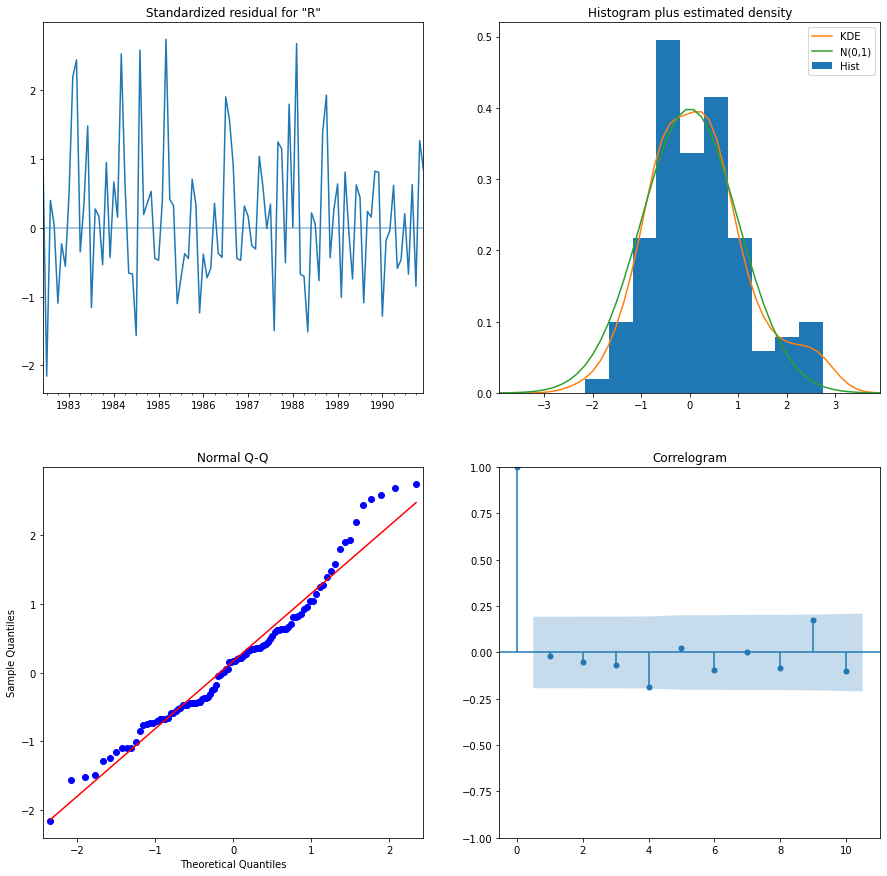

In [203]:
SARIMA_auto.plot_diagnostics(figsize=(15,15));

### Prediction on Test Dataset

In [204]:
df_test['forecast_SARIMA_auto']=SARIMA_auto.forecast(steps=len(df_test))

In [205]:
df_test[['Rose','forecast_ARIMA_auto','forecast_SARIMA_auto']].head(10).round(1)

Rose  forecast_ARIMA_auto  forecast_SARIMA_auto
YearMonth                                                  
1991-01-01  54.0                 85.6                  54.9
1991-02-01  55.0                 90.5                  64.0
1991-03-01  66.0                 82.0                  71.8
1991-04-01  65.0                 92.7                  69.1
1991-05-01  60.0                 80.9                  77.0
1991-06-01  65.0                 92.9                  80.3
1991-07-01  96.0                 81.4                  68.5
1991-08-01  55.0                 92.0                  77.2
1991-09-01  71.0                 82.6                  76.5
1991-10-01  63.0                 90.6                  76.5

In [206]:
rmse_SARIMA_auto=mean_squared_error(df_test.Rose,df_test.forecast_SARIMA_auto,squared=False)
rmse_SARIMA_auto

16.683947310873535

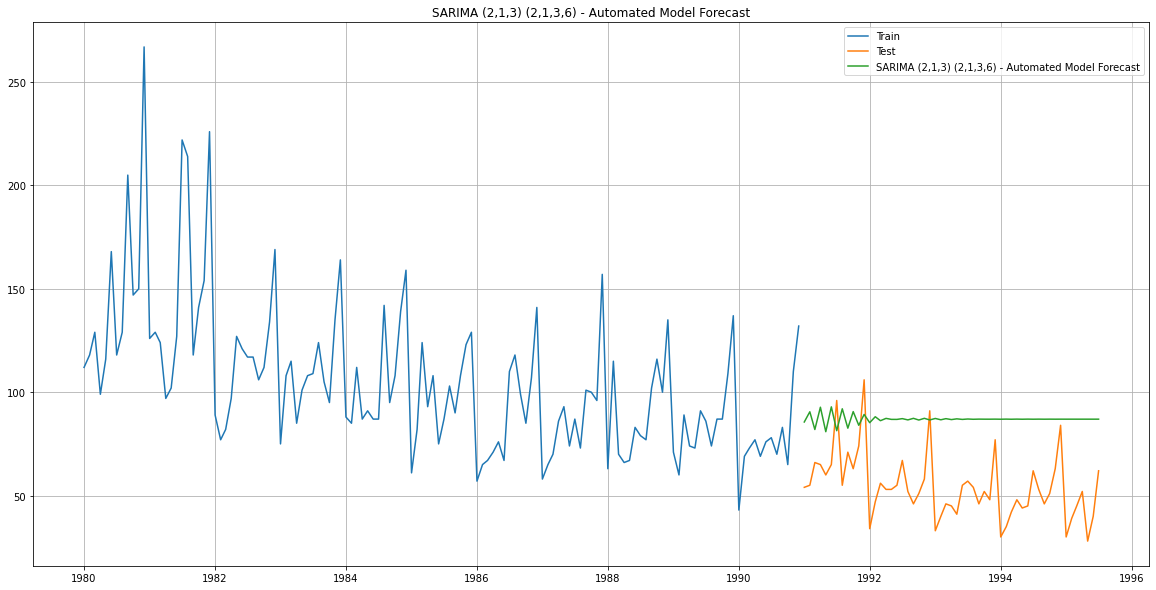

In [207]:
plt.figure(figsize=(20,10))
plt.plot(df_train.Rose, label='Train')
plt.plot(df_test.Rose, label='Test')
plt.plot(df_test.forecast_ARIMA_auto, 
         label='SARIMA (2,1,3) (2,1,3,6) - Automated Model Forecast')
plt.legend(loc='best')
plt.grid()
plt.title('SARIMA (2,1,3) (2,1,3,6) - Automated Model Forecast');

## Q7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

## ARIMA - ACF and PACF Plots Method

In [208]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

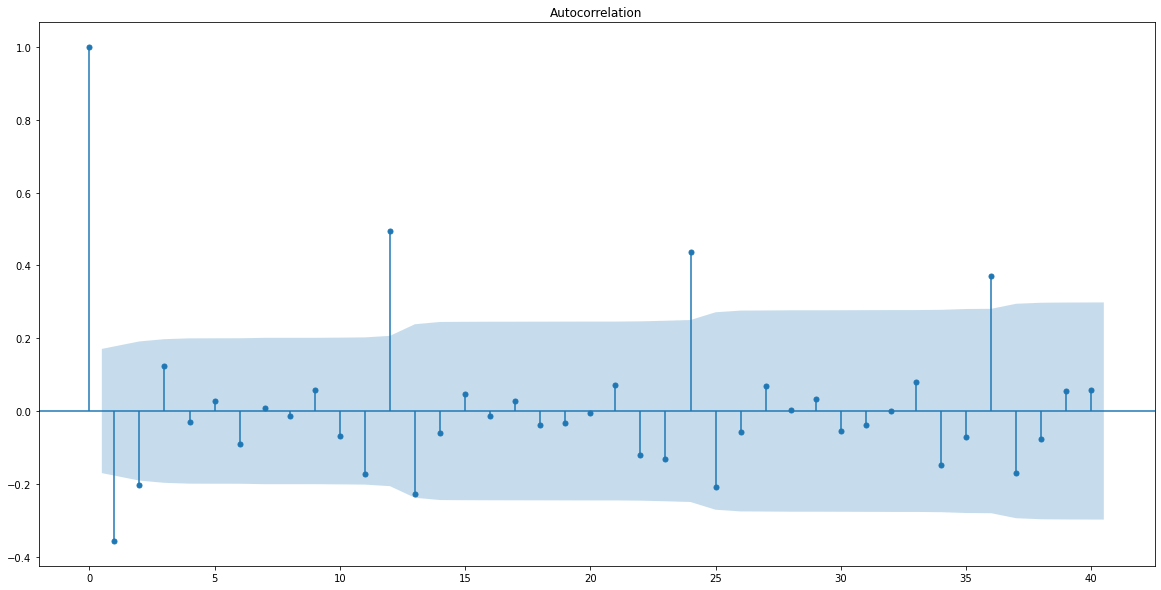

In [209]:
plot_acf(df_train.Rose.diff(),missing='drop',lags=40)
plt.show()

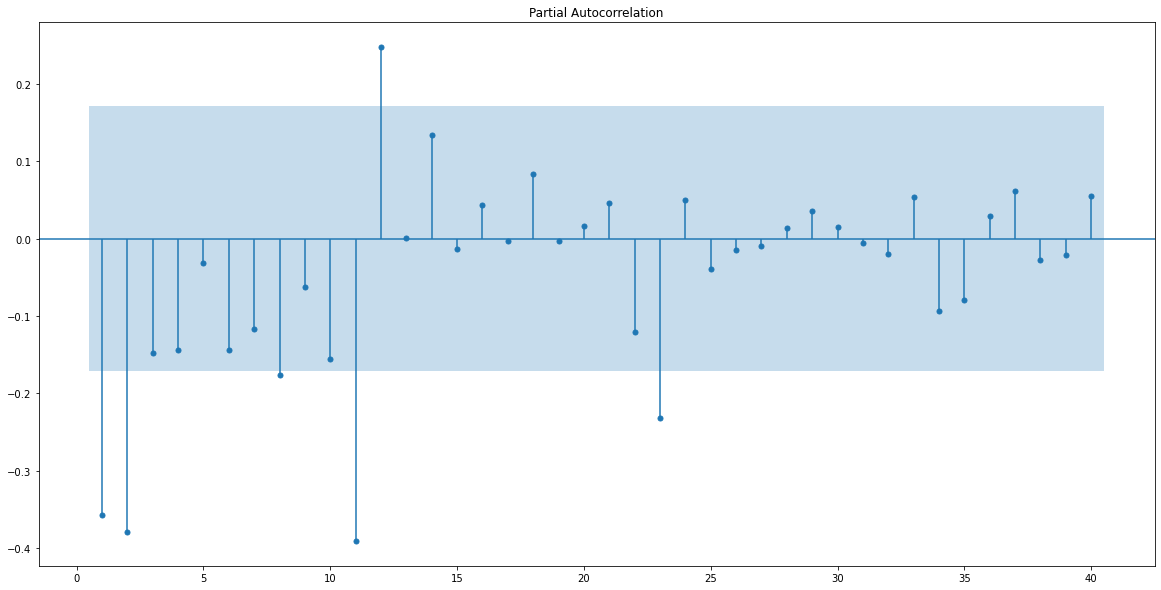

In [210]:
plot_pacf(df_train.Rose.diff().dropna(),zero=False,alpha=0.05,method='ywmle',lags=40)
plt.show()

In [211]:
ARIMA_manual=ARIMA(df_train.Rose,order=(2, 1, 2)).fit()
ARIMA_manual.summary()

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -635.935
Date:                Sun, 16 Jan 2022   AIC                           1281.871
Time:                        22:37:49   BIC                           1296.247
Sample:                    01-01-1980   HQIC                          1287.712
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4540      0.469     -0.969      0.333      -1.372       0.464
ar.L2          0.0001      0.170      0.001      0.999      -0.334       0.334
ma.L1         -0.2541      0.459     -0.554      0.580      -1.154       0.646
ma.L2         -0.5984      0.430     -1.390      0.164      -1.442       0.245
sigma2       952.1601     91.424     10.415      0.000     772.973    1131.347
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                34.16
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               0.37   Skew:                             0.79
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

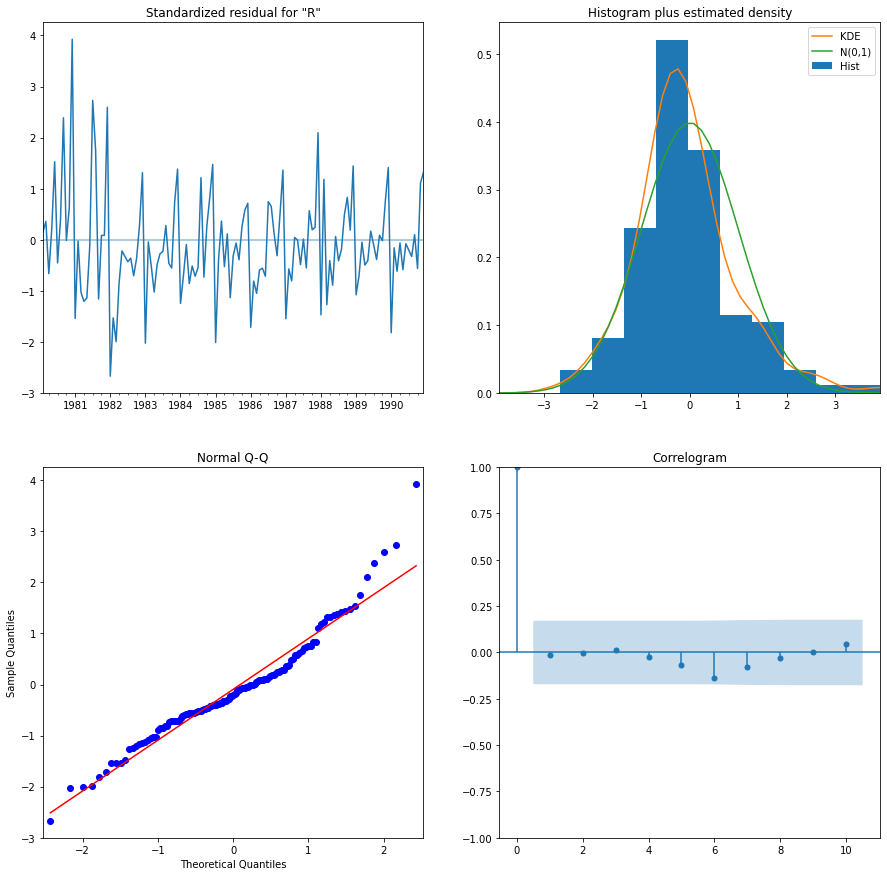

In [212]:
ARIMA_manual.plot_diagnostics(figsize=(15,15));

### Forecast on Test Dataset

In [213]:
df_test['forecast_ARIMA_manual']=ARIMA_manual.forecast(len(df_test))

In [214]:
df_test[['Rose','forecast_ARIMA_manual']].head(10).round(1)

Rose  forecast_ARIMA_manual
YearMonth                              
1991-01-01  54.0                   91.2
1991-02-01  55.0                   85.3
1991-03-01  66.0                   88.0
1991-04-01  65.0                   86.8
1991-05-01  60.0                   87.3
1991-06-01  65.0                   87.1
1991-07-01  96.0                   87.2
1991-08-01  55.0                   87.1
1991-09-01  71.0                   87.1
1991-10-01  63.0                   87.1

In [215]:
rmse_ARIMA_manual=mean_squared_error(df_test.Rose,df_test.forecast_ARIMA_manual,squared=False)
rmse_ARIMA_manual

36.457105892171214

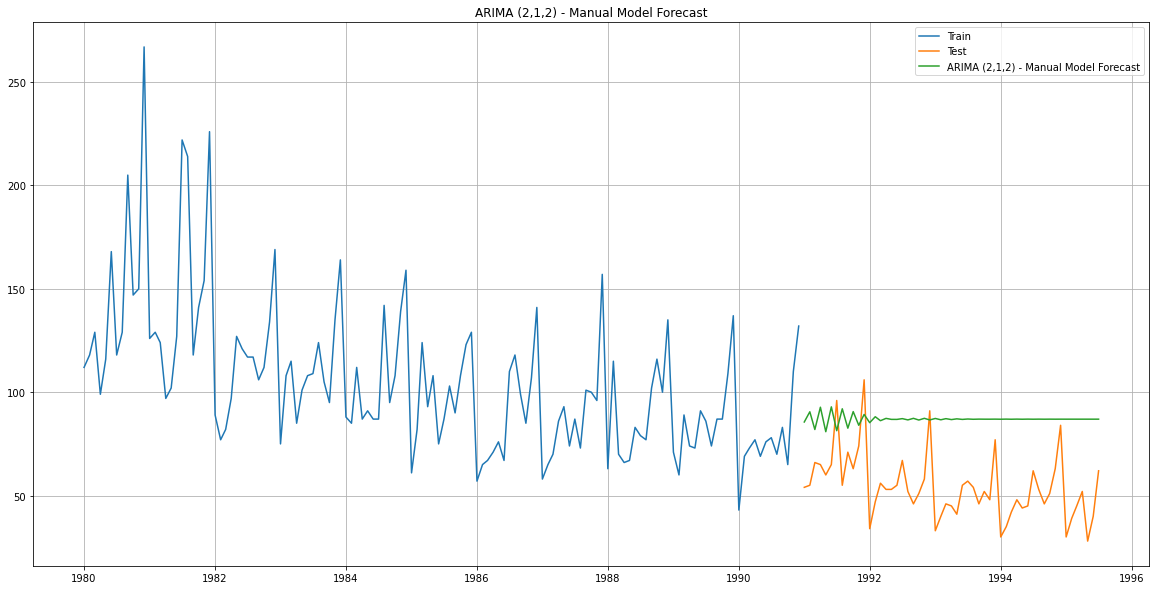

In [217]:
plt.figure(figsize=(20,10))
plt.plot(df_train.Rose, label='Train')
plt.plot(df_test.Rose, label='Test')
plt.plot(df_test.forecast_ARIMA_auto, 
         label='ARIMA (2,1,2) - Manual Model Forecast')
plt.legend(loc='best')
plt.grid()
plt.title('ARIMA (2,1,2) - Manual Model Forecast');

## SARIMA - ACF and PACF Plots Method

In [218]:
df_train.Rose.diff(6).dropna()

YearMonth
1980-07-01     6.0
1980-08-01    11.0
1980-09-01    76.0
1980-10-01    48.0
1980-11-01    34.0
              ... 
1990-08-01     1.0
1990-09-01    10.0
1990-10-01   -12.0
1990-11-01    41.0
1990-12-01    56.0
Name: Rose, Length: 126, dtype: float64

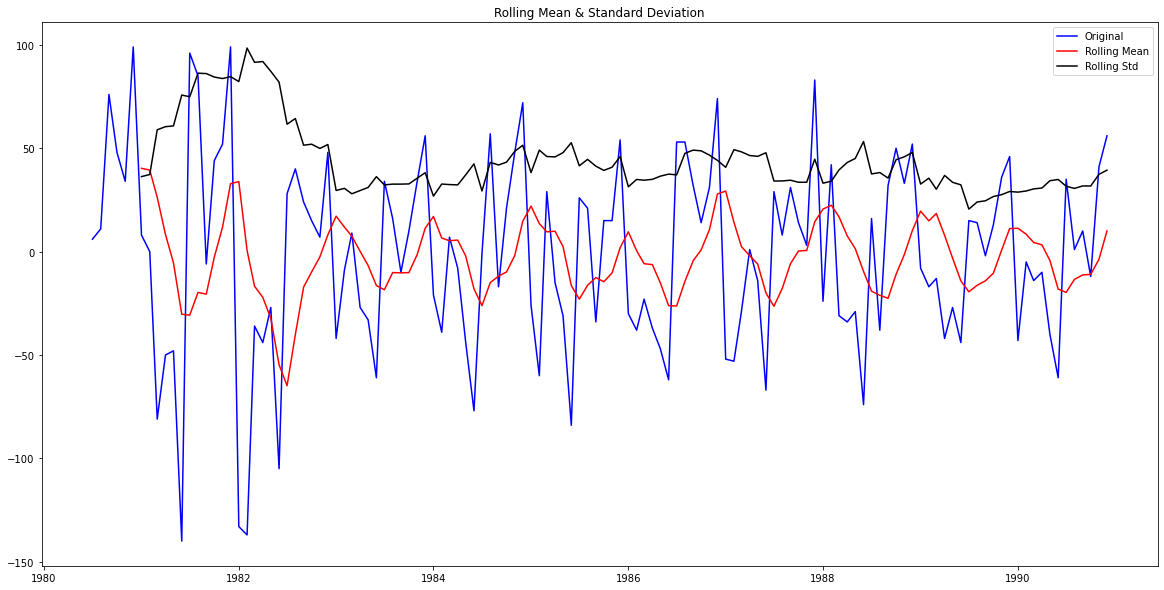

Results of Dickey-Fuller Test:
Test Statistic                -7.442449e+00
p-value                        5.956534e-11
#Lags Used                     7.000000e+00
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



In [219]:
test_stationarity(df_train.Rose.diff(6).dropna())

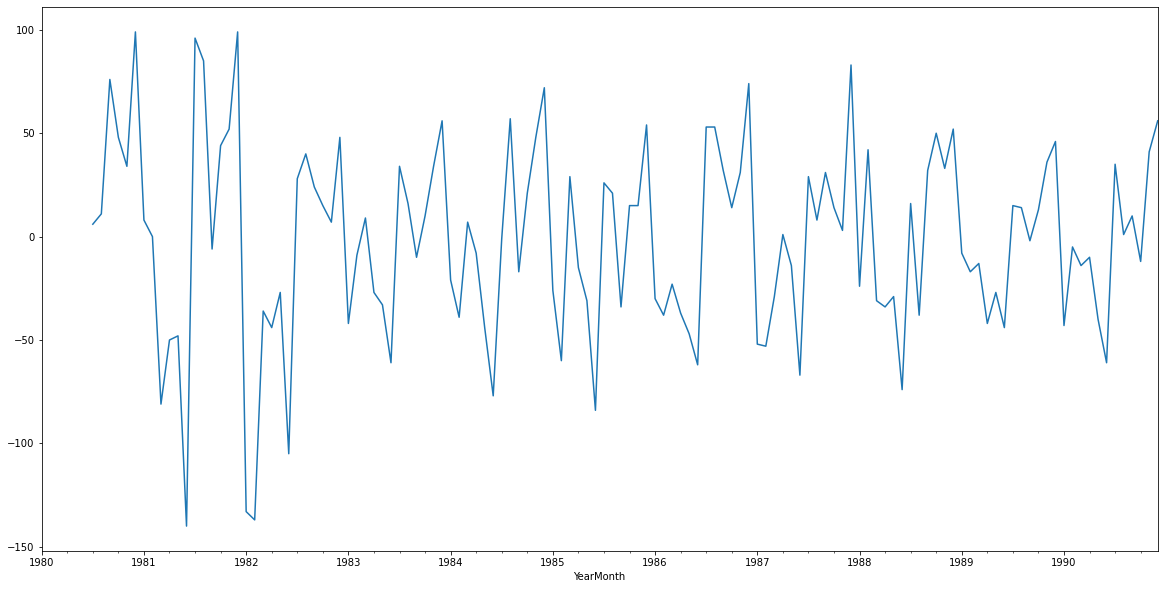

In [456]:
df_train.Rose.diff(6).plot();

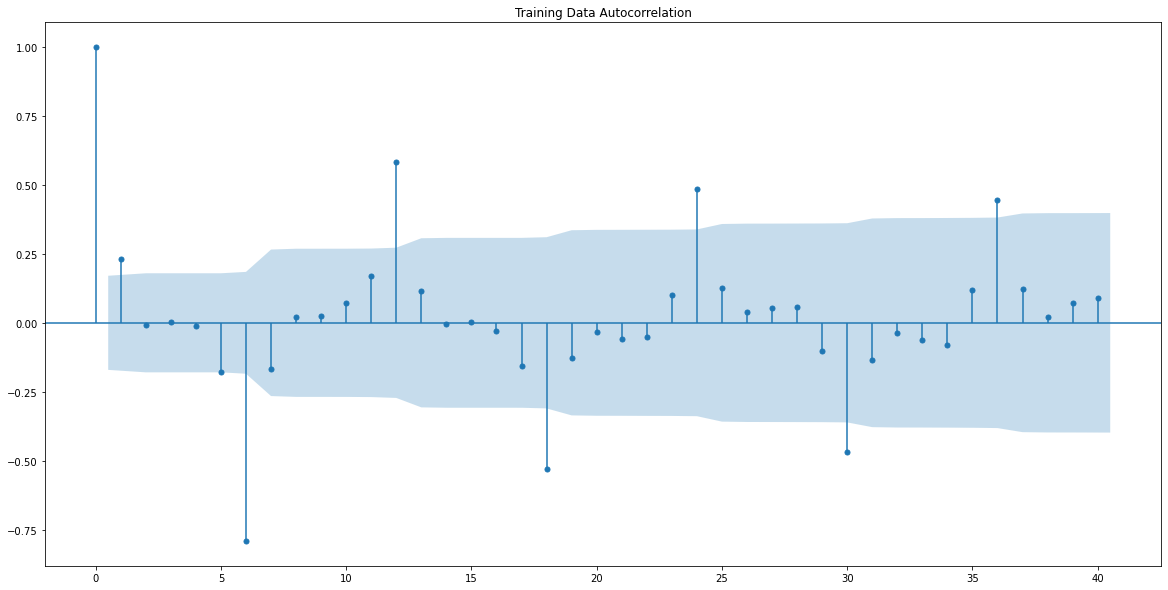

In [220]:
plot_acf(df_train.Rose.diff(6),title='Training Data Autocorrelation',missing='drop',lags=40);

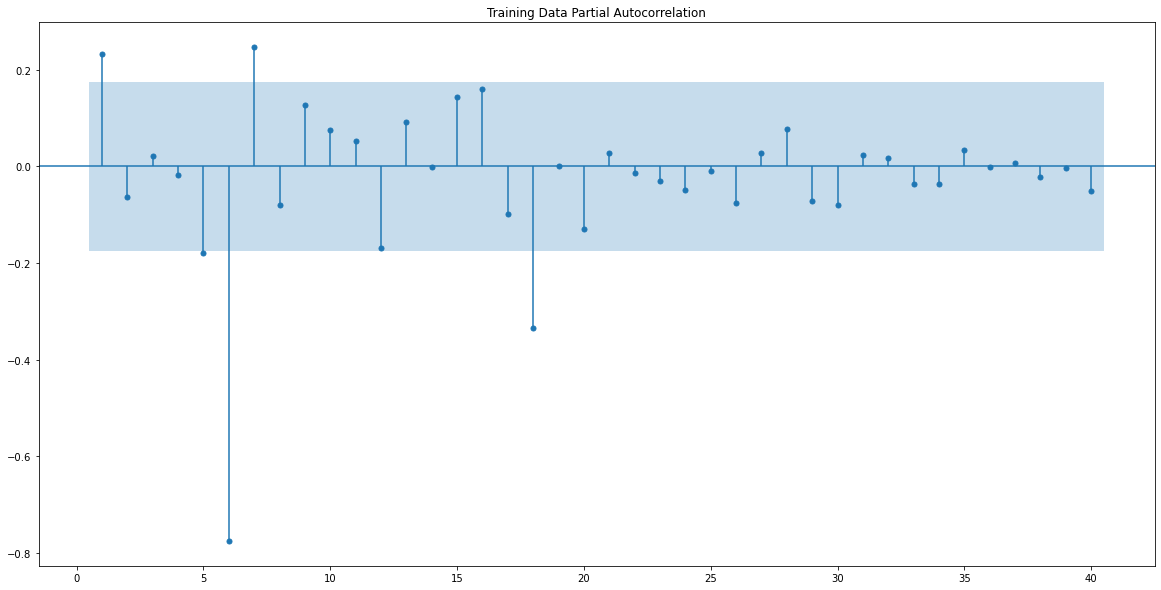

In [221]:
plot_pacf(df_train.Rose.diff(6).dropna(),title='Training Data Partial Autocorrelation',zero=False,
          method='ywmle',lags=40);

In [222]:
SARIMA_manual=sm.tsa.statespace.SARIMAX(df_train.Rose,order=(2,1,2),seasonal_order=(1,0,1,6),
                                              enforce_stationarity=False,enforce_invertibility=False).fit(maxiter=1000)

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [223]:
SARIMA_manual.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                Rose   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(1, 0, [1], 6)   Log Likelihood                -568.364
Date:                             Sun, 16 Jan 2022   AIC                           1150.728
Time:                                     22:37:52   BIC                           1170.356
Sample:                                 01-01-1980   HQIC                          1158.701
                                      - 12-01-1990                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0205      0.076     13.370      0.000       0.871       1.170
ar.L2         -0.0423      0.077     -0.546      0.585      -0.194       0.109
ma.L1         -1.9988    967.983     -0.002      0.998   -1899.210    1895.213
ma.L2          1.0000    968.541      0.001      0.999   -1897.306    1899.306
ar.S.L6       -0.9492      0.020    -48.632      0.000      -0.987      -0.911
ma.S.L6        1.0000    968.540      0.001      0.999   -1897.304    1899.304
sigma2       516.6778      1.257    410.959      0.000     514.214     519.142
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 6.37
Prob(Q):                              0.94   Prob(JB):                         0.04
Heteroskedasticity (H):               0.35   Skew:                             0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.01e+22. Standard errors may be unstable.
"""

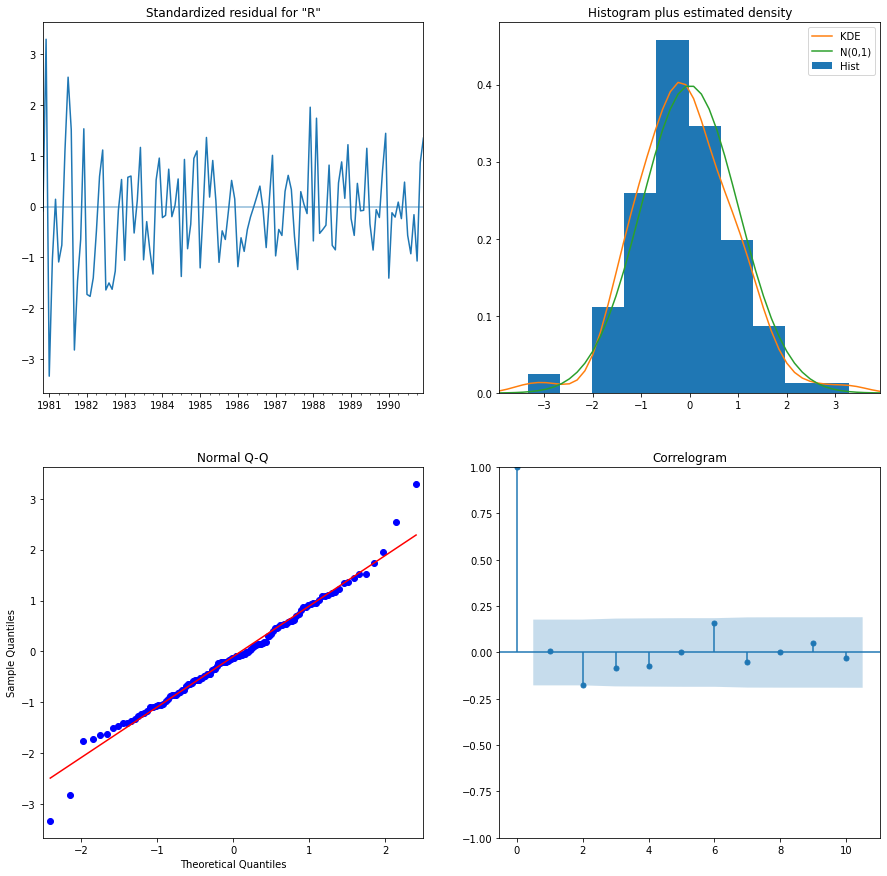

In [224]:
SARIMA_manual.plot_diagnostics(figsize=(15,15));

### Prediction on Test Dataset

In [225]:
df_test['forecast_SARIMA_manual']=SARIMA_manual.forecast(steps=len(df_test))

In [226]:
df_test[['Rose','forecast_ARIMA_manual','forecast_SARIMA_manual']].head(10).round(1)

Rose  forecast_ARIMA_manual  forecast_SARIMA_manual
YearMonth                                                      
1991-01-01  54.0                   91.2                    75.8
1991-02-01  55.0                   85.3                    72.9
1991-03-01  66.0                   88.0                    77.3
1991-04-01  65.0                   86.8                    74.5
1991-05-01  60.0                   87.3                    74.2
1991-06-01  65.0                   87.1                    65.6
1991-07-01  96.0                   87.2                    88.9
1991-08-01  55.0                   87.1                    90.3
1991-09-01  71.0                   87.1                    85.9
1991-10-01  63.0                   87.1                    88.4

In [227]:
rmse_SARIMA_manual=mean_squared_error(df_test.Rose,df_test.forecast_SARIMA_manual,squared=False)
rmse_SARIMA_manual

28.457506333166137

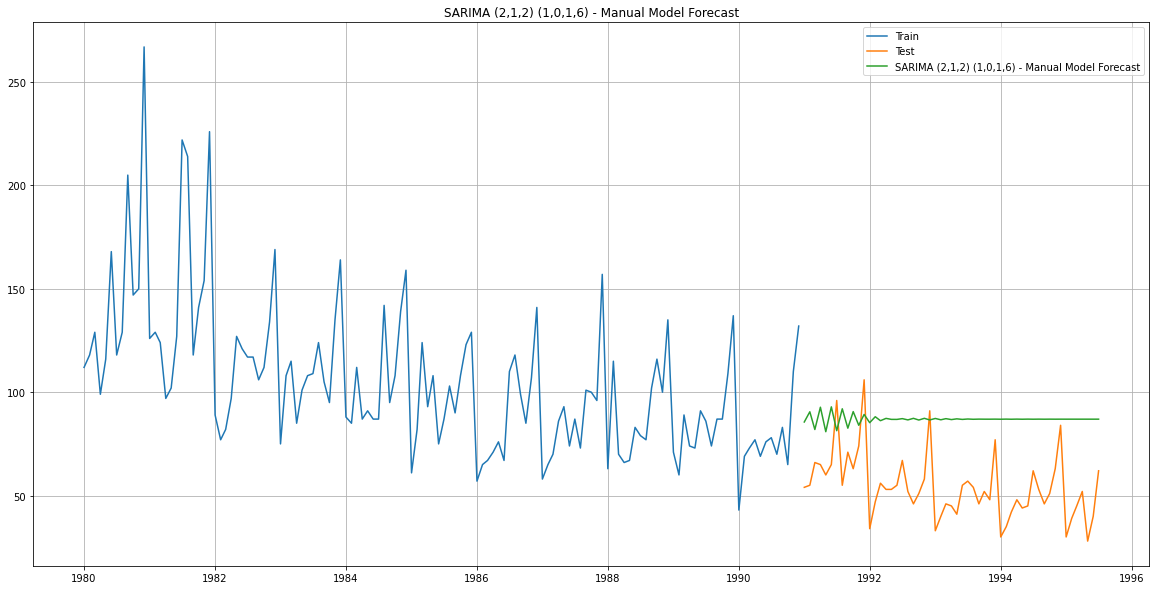

In [228]:
plt.figure(figsize=(20,10))
plt.plot(df_train.Rose, label='Train')
plt.plot(df_test.Rose, label='Test')
plt.plot(df_test.forecast_ARIMA_auto, 
         label='SARIMA (2,1,2) (1,0,1,6) - Manual Model Forecast')
plt.legend(loc='best')
plt.grid()
plt.title('SARIMA (2,1,2) (1,0,1,6) - Manual Model Forecast');

## Q8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [457]:
rmse=pd.DataFrame({'Model':['Linear_Regression','Naive_Forecast','Simple_Average',
'Simple_Exponential_Smoothing_optimized, Alpha =0.0987,','Simple_Exponential_Smoothing_iteration, Alpha =0.07',
'Double_Exponential_Smoothing_optimized, Alpha=0, Beta=0','Double_Exponential_Smoothing_iteration, Alpha=0.1, Beta=0.1',
'Triple Exponential_Smoothing_with additive trend & additive seasonality_optimized, Alpha=0.0895, Beta=0.0002, Gamma=0.0035',
'Triple Exponential_Smoothing_with additive trend & additive seasonality_iteration, Alpha=0.1, Beta=0.4, Gamma=0.3',
'Triple Exponential_Smoothing_with additive trend & multiplicative seasonality_optimized, Alpha=0.0715, Beta=0.0453, Gamma=0',
'Triple Exponential_Smoothing_with additive trend & multiplicative seasonality_iteration, Alpha=0.1, Beta=0.2, Gamma=0.1',
'Triple Exponential_Smoothing_with multiplicative trend & multiplicative seasonality_optimized, Alpha=0.0551, Beta=0.0316, Gamma=0.0003',
'Triple Exponential_Smoothing_with multiplicative trend & multiplicative seasonality_iteration, Alpha=0.2, Beta=0.7, Gamma=0.2',
'Triple Exponential_Smoothing_with multiplicative trend & additive seasonality_optimized, Alpha=0.0134, Beta=0, Gamma=0.0004',
'Triple Exponential_Smoothing_with multiplicative trend & additive seasonality_iteration, Alpha=0.1, Beta=0.8, Gamma=0.2',
'ARIMA_Automated (2,1,3)','ARIMA_ACF Plot (2,1,2)','SARIMA_Automated (2,1,3)(2,1,3,6)','SARIMA_ACF Plot (2,1,2)(1,0,1,6)'],
'RMSE':[rmse_lr,rmse_naive,rmse_sa,rmse_ses_optimized,rmse_ses,rmse_des_optimized,rmse_des,rmse_tes_add_add_optimized,
     rmse_tes_add_add,rmse_tes_add_mult_optimized,rmse_tes_add_mult,rmse_tes_mult_mult_optimized,rmse_tes_mult_mult,rmse_tes_mult_add_optimized,rmse_tes_mult_add,rmse_ARIMA_auto,rmse_ARIMA_manual,
        rmse_SARIMA_auto,rmse_SARIMA_manual]})
rmse.set_index('Model',inplace=True)
rmse.round(1)

RMSE
Model                                                   
Linear_Regression                                   15.3
Naive_Forecast                                      79.3
Simple_Average                                      53.0
Simple_Exponential_Smoothing_optimized, Alpha =...  36.4
Simple_Exponential_Smoothing_iteration, Alpha =...  36.4
Double_Exponential_Smoothing_optimized, Alpha=0...  15.3
Double_Exponential_Smoothing_iteration, Alpha=0...  36.4
Triple Exponential_Smoothing_with additive tren...  14.2
Triple Exponential_Smoothing_with additive tren...  12.3
Triple Exponential_Smoothing_with additive tren...  19.7
Triple Exponential_Smoothing_with additive tren...   9.3
Triple Exponential_Smoothing_with multiplicativ...  19.5
Triple Exponential_Smoothing_with multiplicativ...   9.1
Triple Exponential_Smoothing_with multiplicativ...  18.1
Triple Exponential_Smoothing_with multiplicativ...  12.2
ARIMA_Automated (2,1,3)                             36.4
ARIMA_ACF Plot (2,1,2)                              36.5
SARIMA_Automated (2,1,3)(2,1,3,6)                   16.7
SARIMA_ACF Plot (2,1,2)(1,0,1,6)                    28.5

In [230]:
rmse.sort_values(by='RMSE').round(1)

RMSE
Model                                                   
Triple Exponential_Smoothing_with multiplicativ...   9.1
Triple Exponential_Smoothing_with additive tren...   9.3
Triple Exponential_Smoothing_with multiplicativ...  12.2
Triple Exponential_Smoothing_with additive tren...  12.3
Triple Exponential_Smoothing_with additive tren...  14.2
Double_Exponential_Smoothing_optimized, Alpha=0...  15.3
Linear_Regression                                   15.3
SARIMA_Automated (2,1,3)(2,1,3,6)                   16.7
Triple Exponential_Smoothing_with multiplicativ...  18.1
Triple Exponential_Smoothing_with multiplicativ...  19.5
Triple Exponential_Smoothing_with additive tren...  19.7
SARIMA_ACF Plot (2,1,2)(1,0,1,6)                    28.5
Simple_Exponential_Smoothing_optimized, Alpha =...  36.4
ARIMA_Automated (2,1,3)                             36.4
Simple_Exponential_Smoothing_iteration, Alpha =...  36.4
Double_Exponential_Smoothing_iteration, Alpha=0...  36.4
ARIMA_ACF Plot (2,1,2)                              36.5
Simple_Average                                      53.0
Naive_Forecast                                      79.3

#### We see that the best model is the Triple Exponential Smoothing with Multiplicative Trend & Multiplicative Seasonality with the Parameters $\alpha$ = 0.2, $\beta$ = 0.7 and $\gamma$ = 0.2.

## Q9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

### Full Model - Triple Exponential Smoothing with Multiplicative Trend and Multiplicative Seasonality with Parameters as Alpha=0.2,Beta=0.7 and Gamma=0.2.

In [231]:
fullmodel = ExponentialSmoothing(df.Rose,trend='multiplicative',seasonal='multiplicative').fit(smoothing_level=0.2,
                                                                 smoothing_trend=0.7,
                                                                 smoothing_seasonal=0.2)

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [232]:
rmse_fullmodel = mean_squared_error(df.Rose,fullmodel.fittedvalues,squared=False)
rmse_fullmodel

20.732175713323084

In [233]:
# Getting the predictions for the same number of times stamps that are present in the test data
forecast_fullmodel = fullmodel.forecast(steps=12)

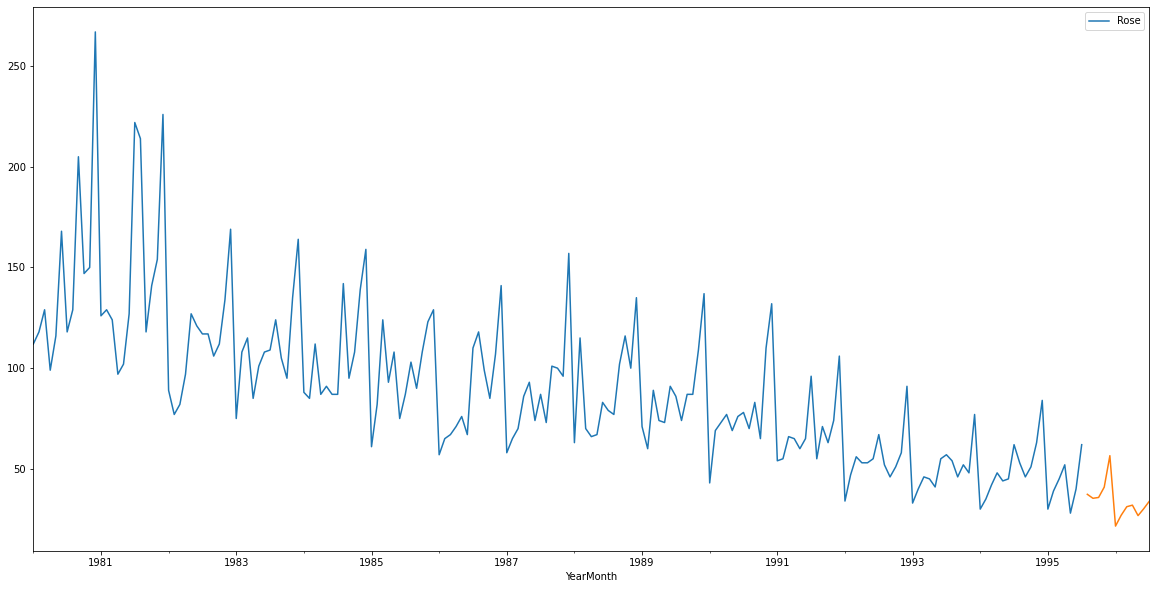

In [234]:
df.plot();
forecast_fullmodel.plot();

One assumption that we have made over here while calculating the confidence bands is that the standard deviation of the forecast distribution is almost equal to the residual standard deviation.

In [235]:
fullmodel.resid

YearMonth
1980-01-01    -1.890626
1980-02-01    -2.482203
1980-03-01     0.505119
1980-04-01     1.549013
1980-05-01     3.140272
                ...    
1995-03-01    -5.562059
1995-04-01     4.781623
1995-05-01   -15.717047
1995-06-01     0.349593
1995-07-01    20.065173
Length: 187, dtype: float64

In [236]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
forecast_df = pd.DataFrame({'lower_CI':forecast_fullmodel - 1.96*np.std(fullmodel.resid,ddof=1),
                          'Forecast':forecast_fullmodel,
                          'upper_ci': forecast_fullmodel + 1.96*np.std(fullmodel.resid,ddof=1)})
forecast_df.round(1)

lower_CI  Forecast  upper_ci
1995-08-01      -3.3      37.3      78.0
1995-09-01      -5.2      35.4      76.0
1995-10-01      -4.8      35.8      76.4
1995-11-01       0.3      40.9      81.5
1995-12-01      15.9      56.5      97.2
1996-01-01     -19.0      21.6      62.2
1996-02-01     -13.7      26.9      67.5
1996-03-01      -9.4      31.2      71.8
1996-04-01      -8.6      32.0      72.6
1996-05-01     -13.8      26.8      67.4
1996-06-01     -10.4      30.2      70.8
1996-07-01      -6.7      33.9      74.5

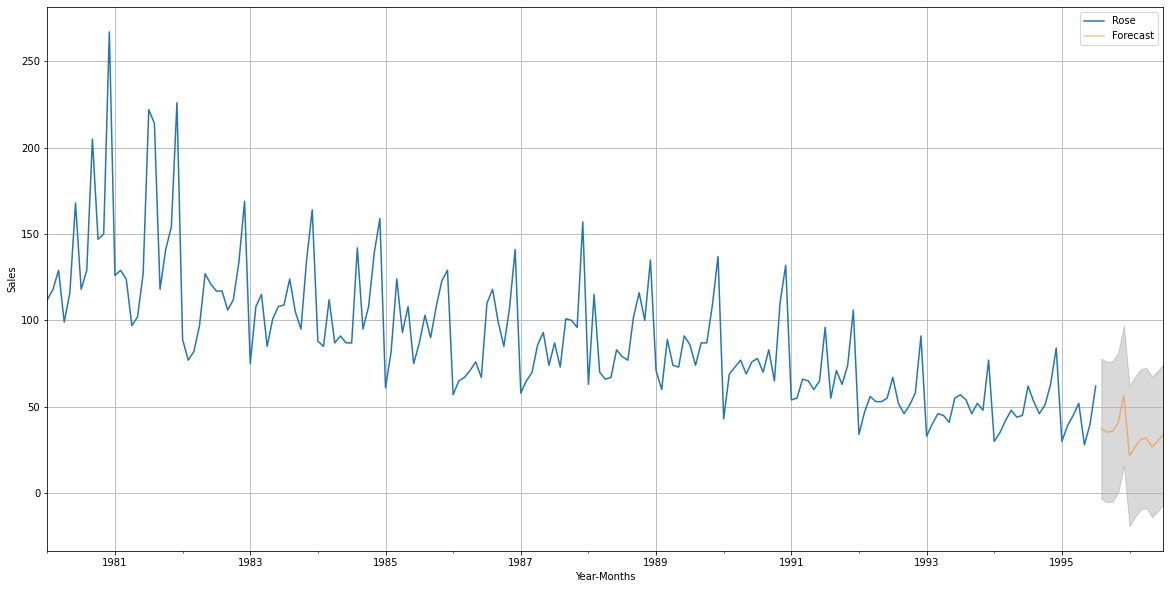

In [237]:
# plot the forecast along with the confidence band
axis = df.plot(label='Actual', figsize=(20,10))
forecast_df['Forecast'].plot(ax=axis,label='Forecast',alpha=0.5)
axis.fill_between(forecast_df.index, forecast_df['lower_CI'], forecast_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.grid()
plt.show()

## Q10. Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales. Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.